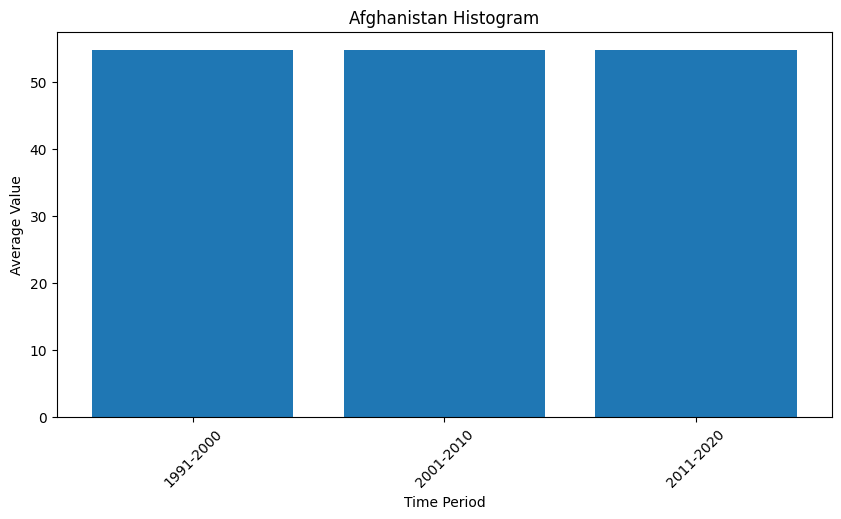

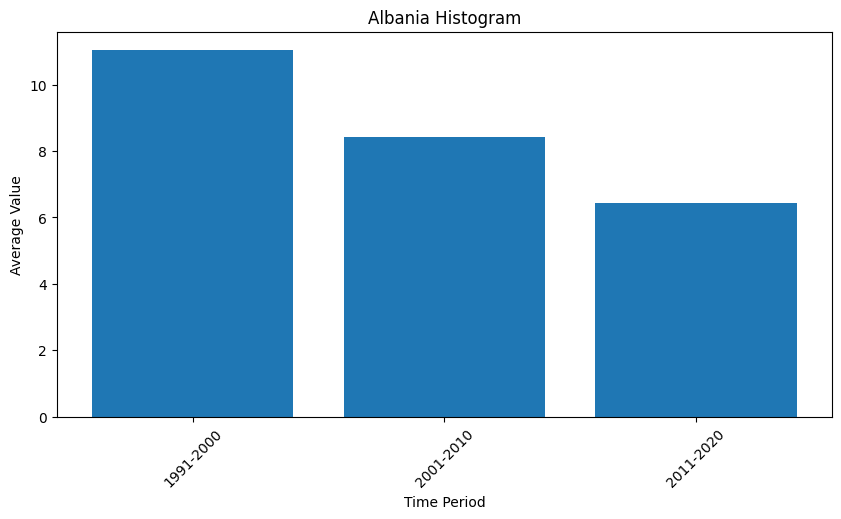

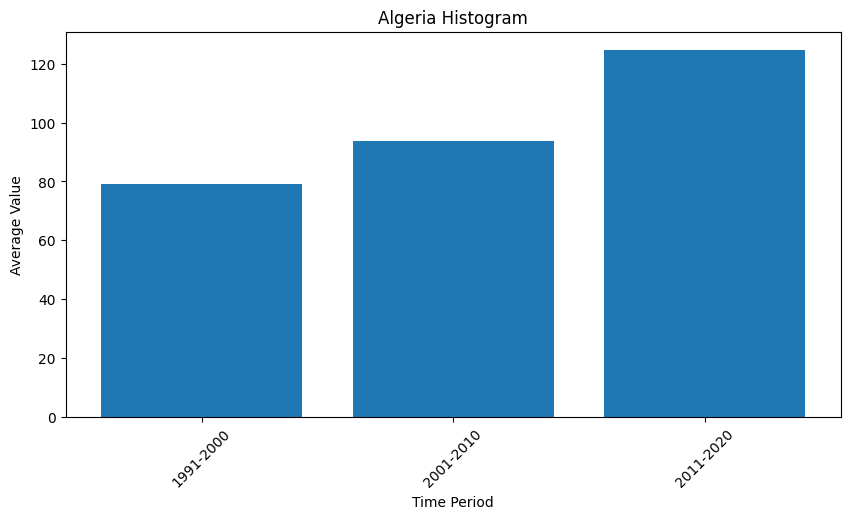

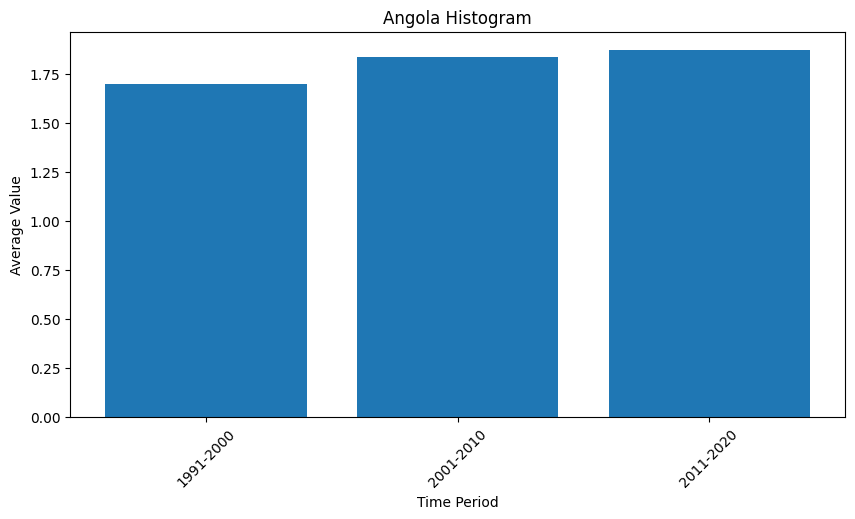

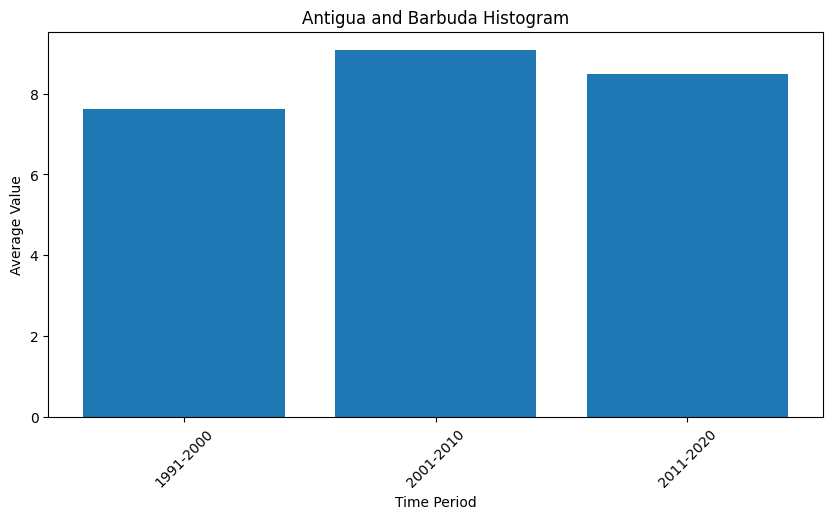

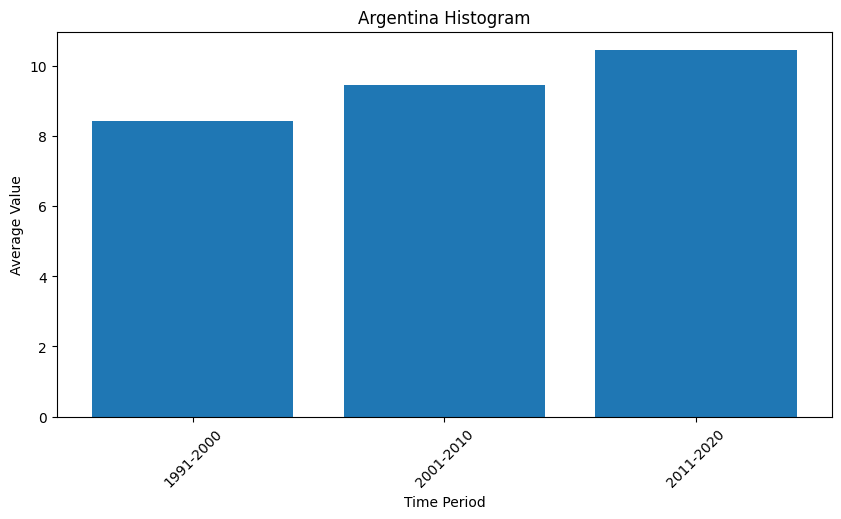

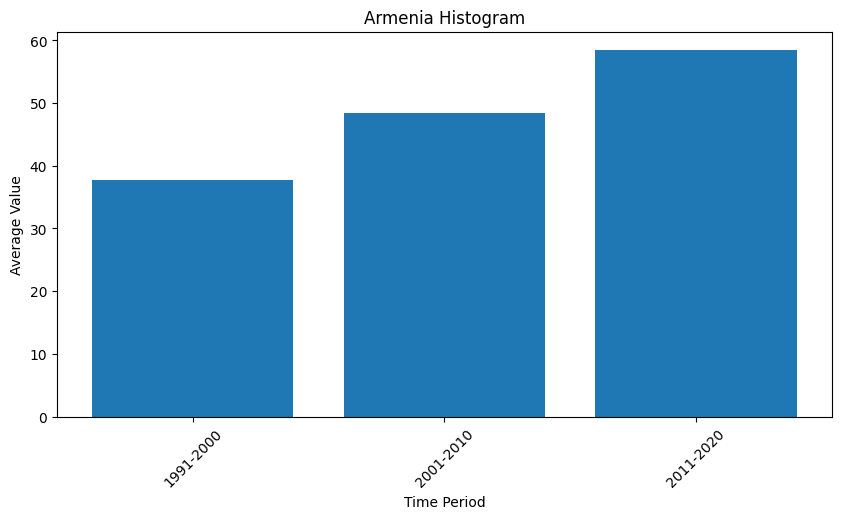

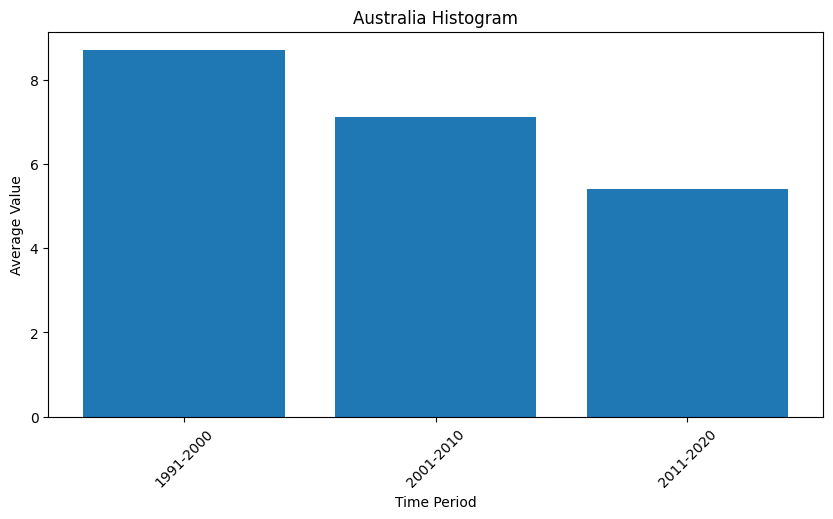

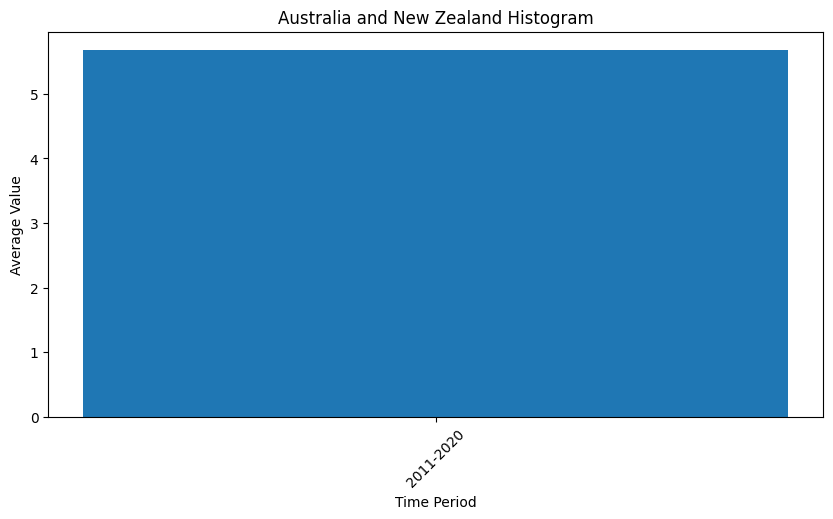

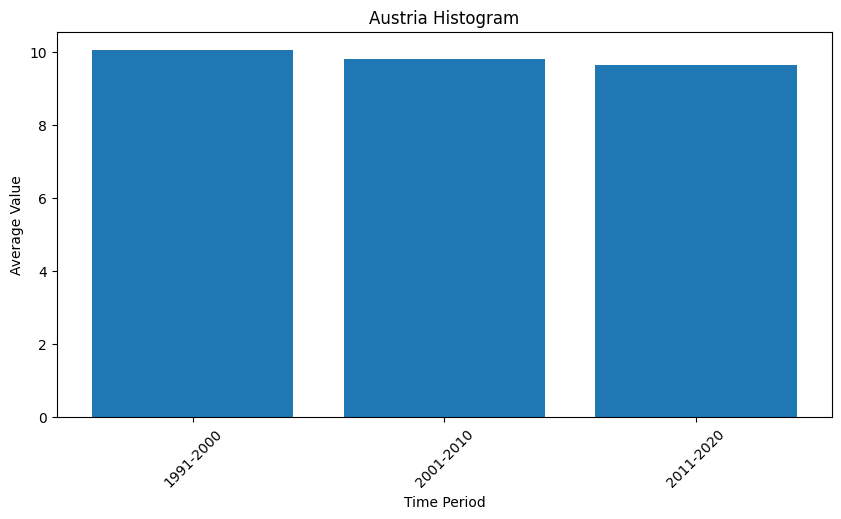

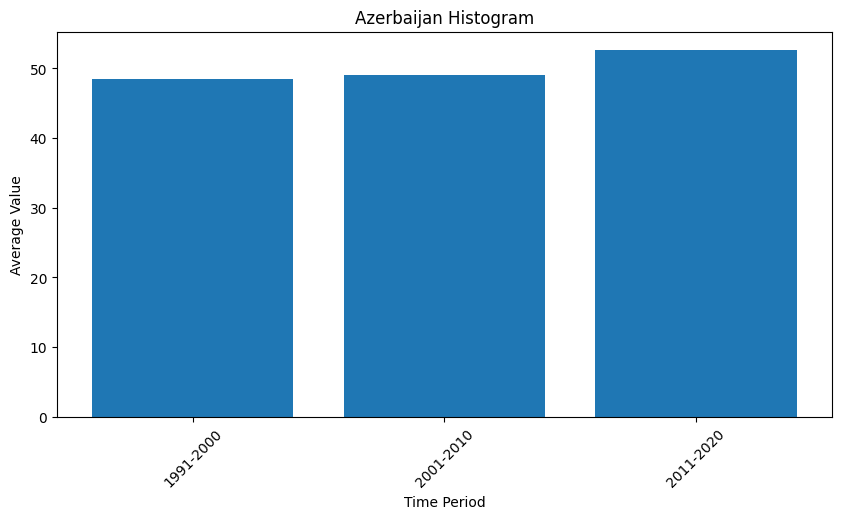

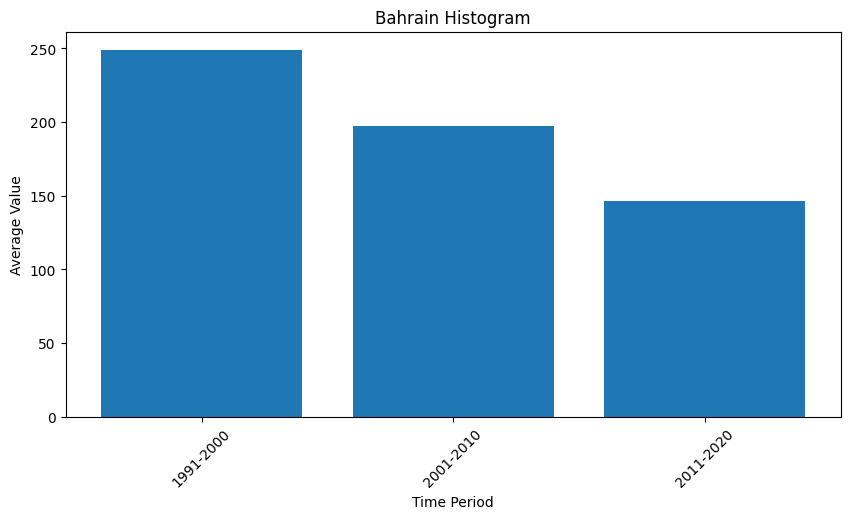

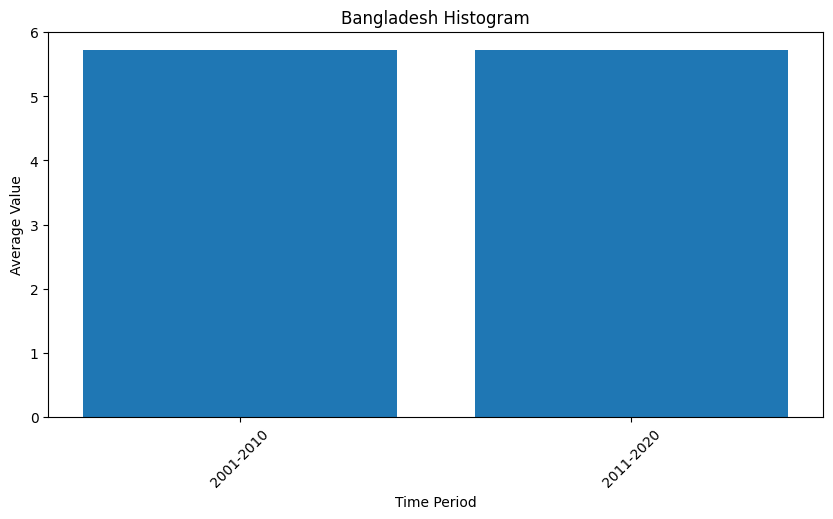

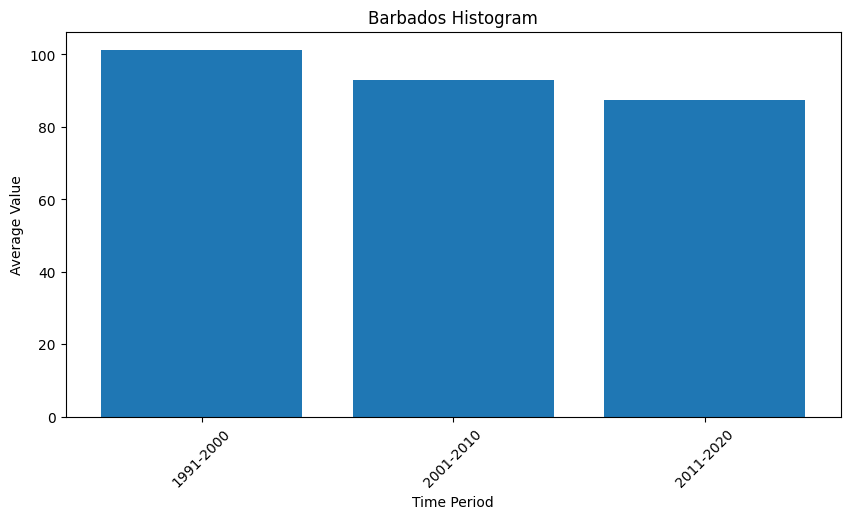

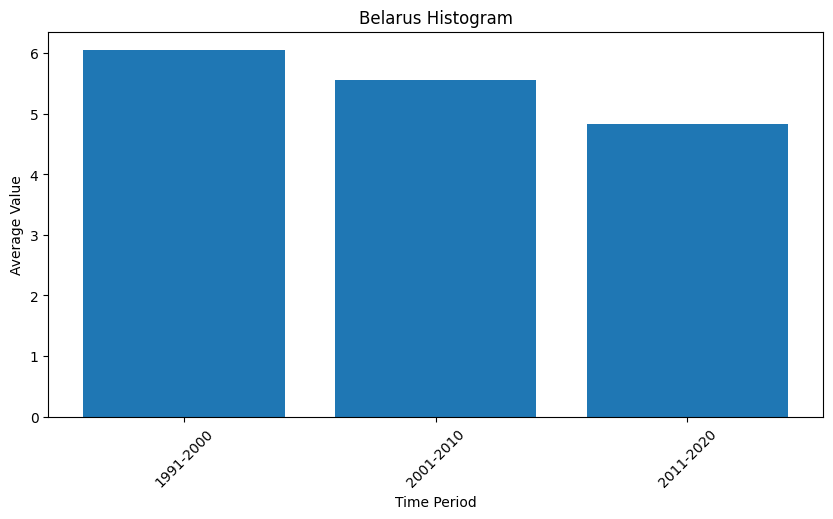

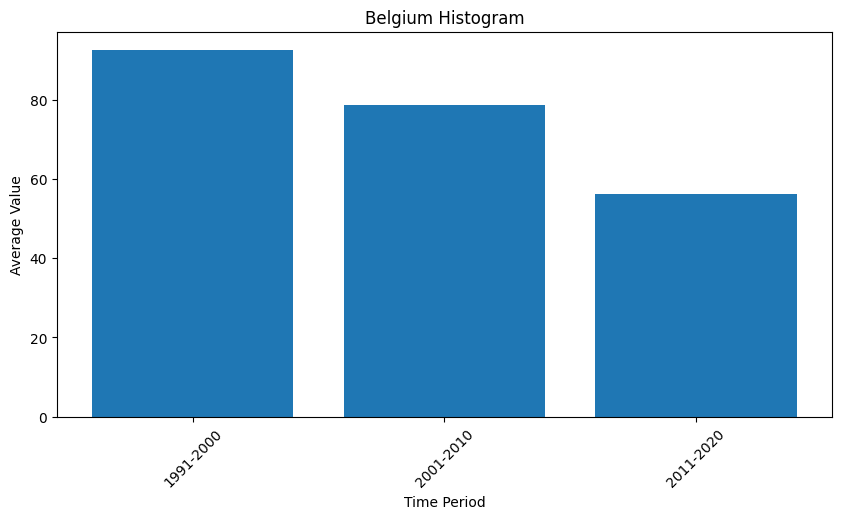

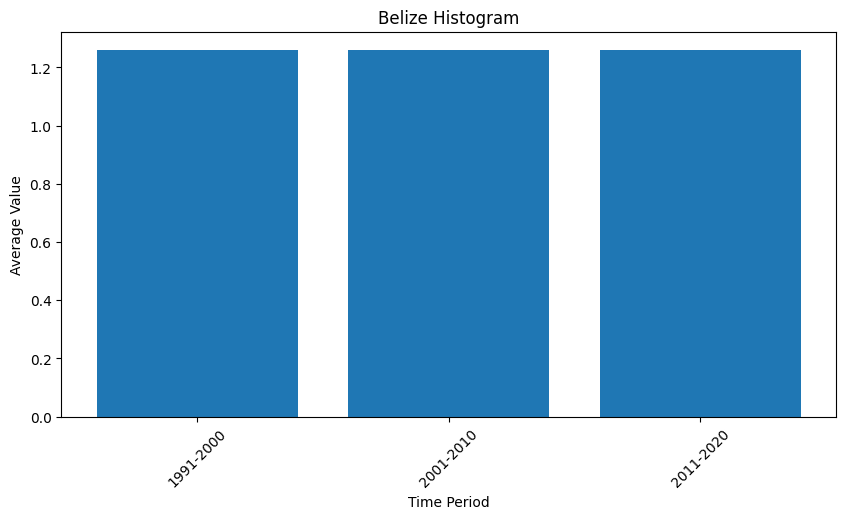

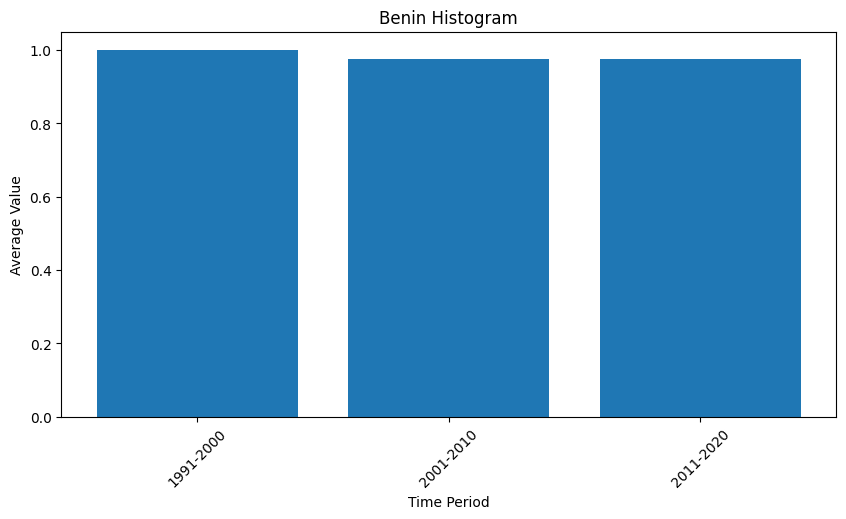

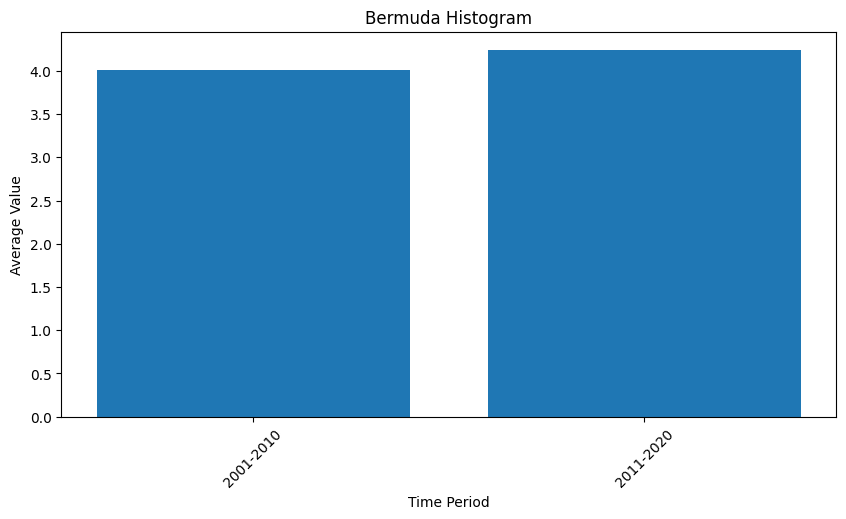

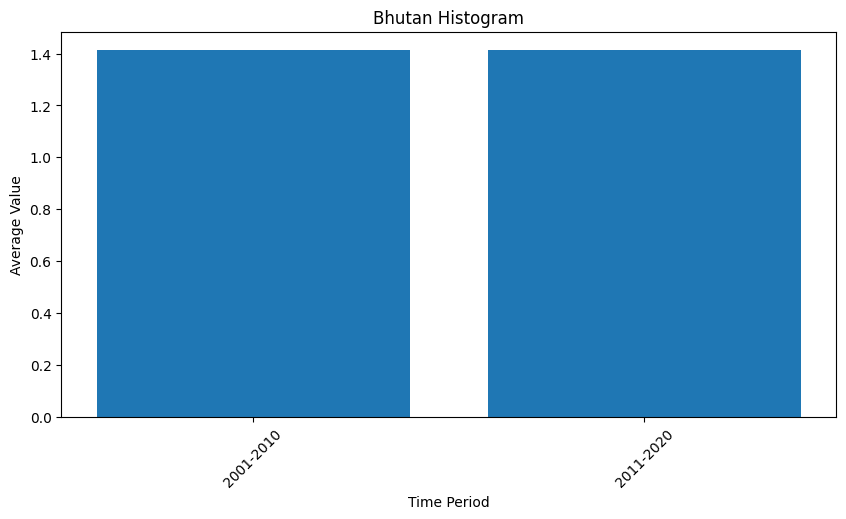

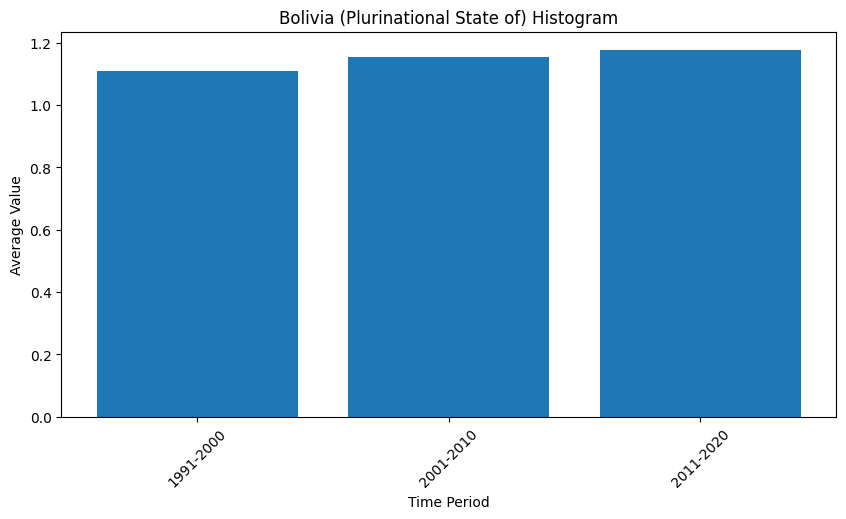

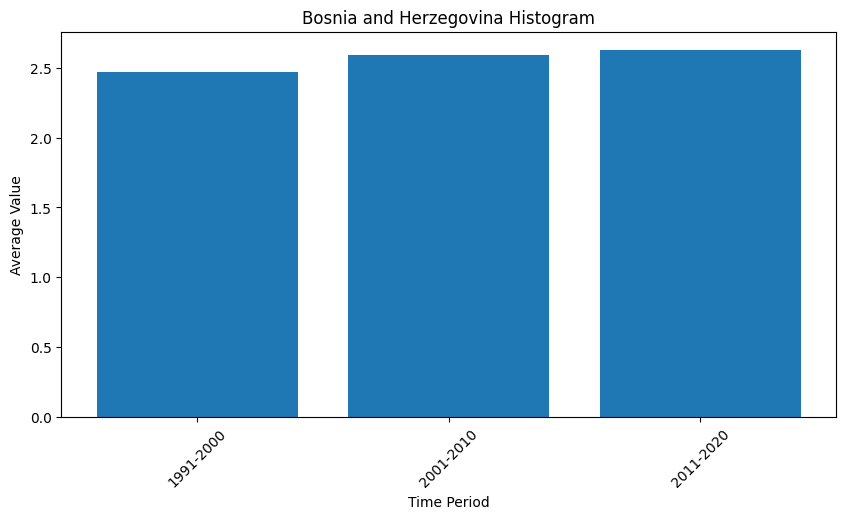

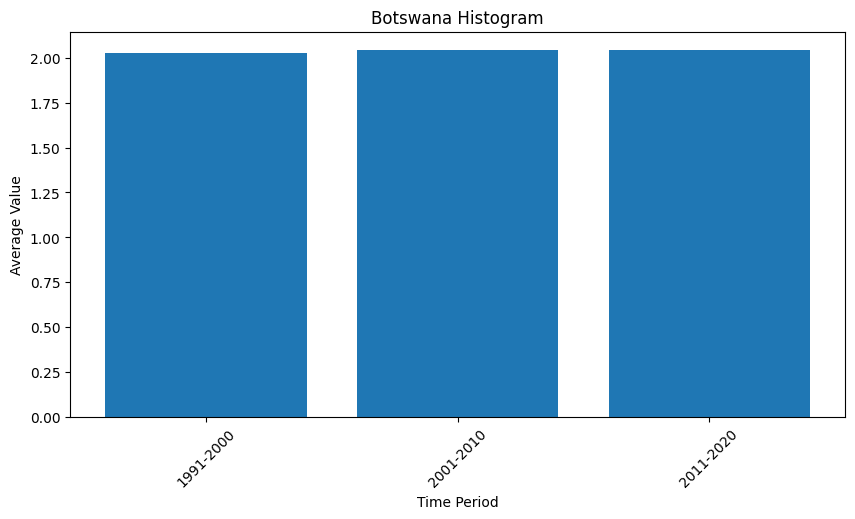

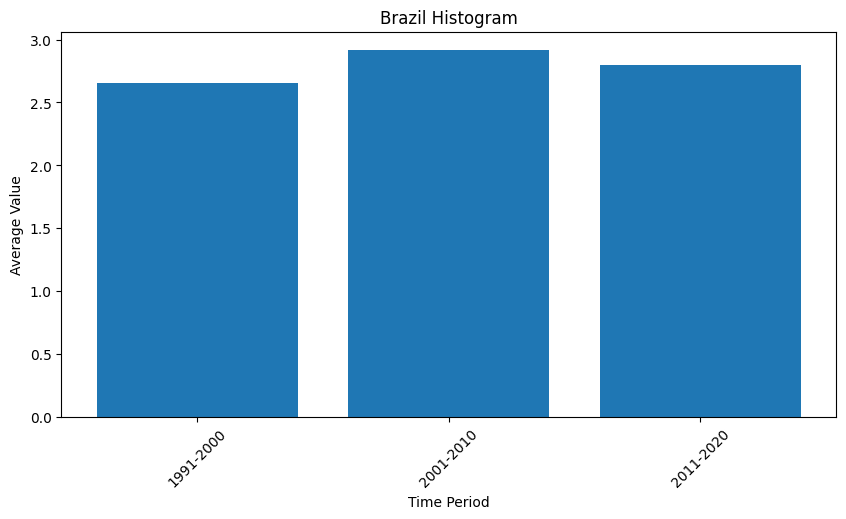

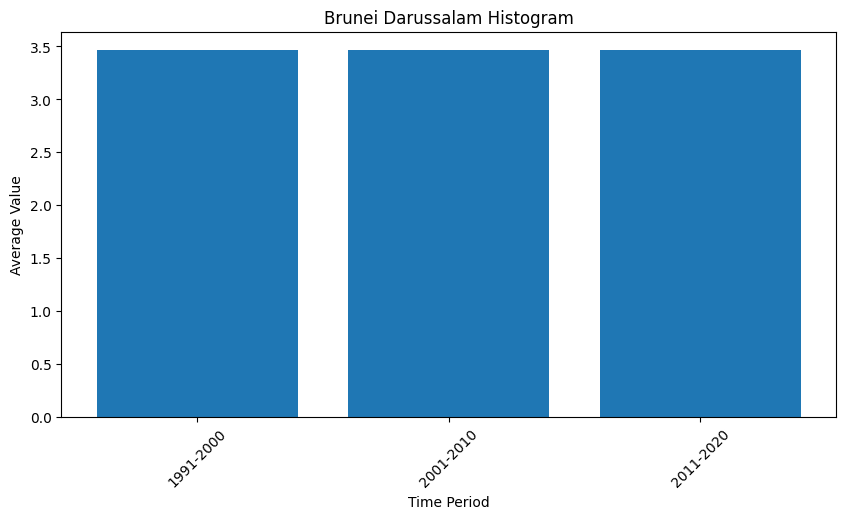

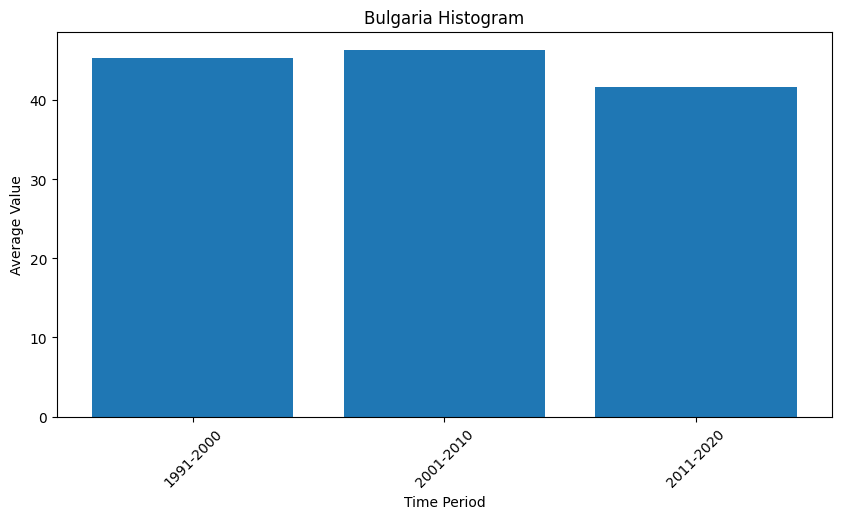

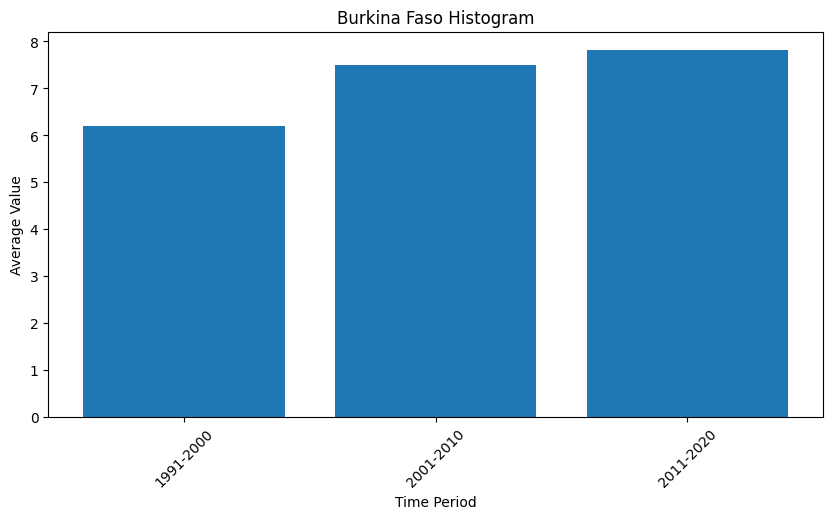

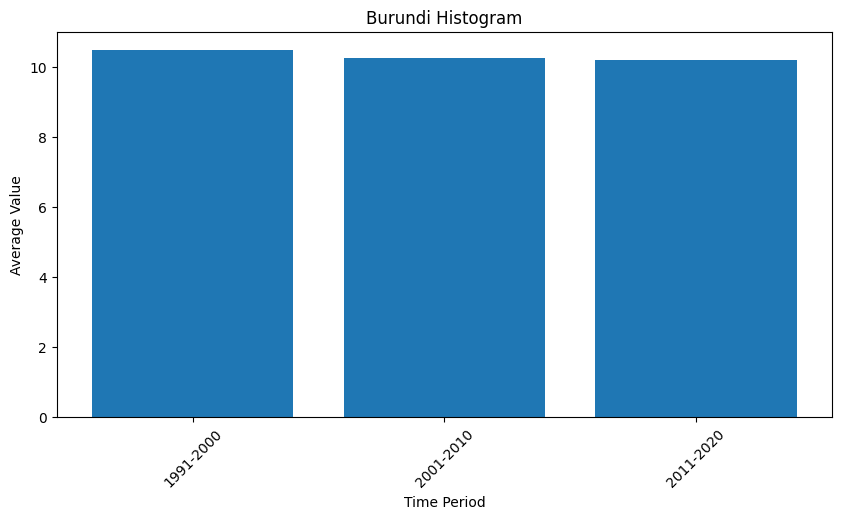

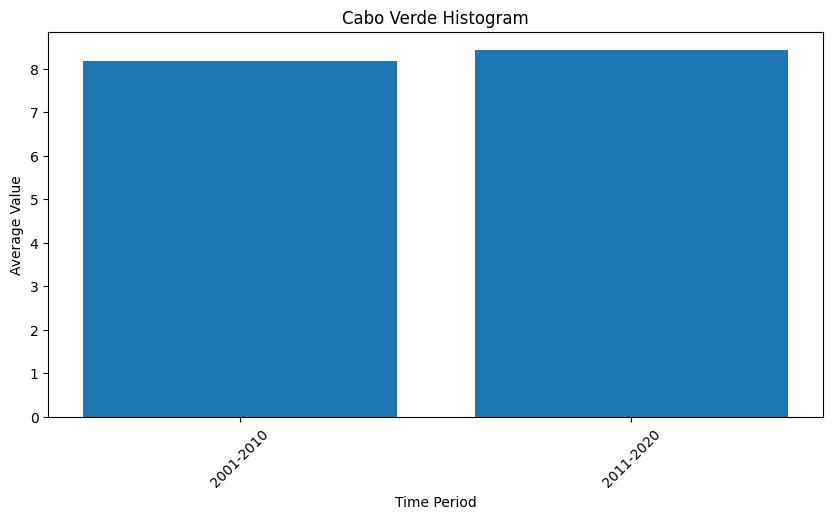

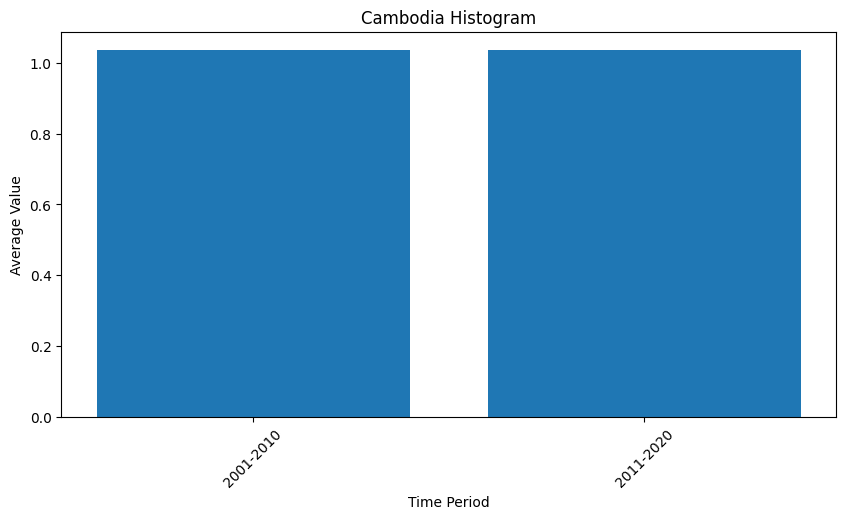

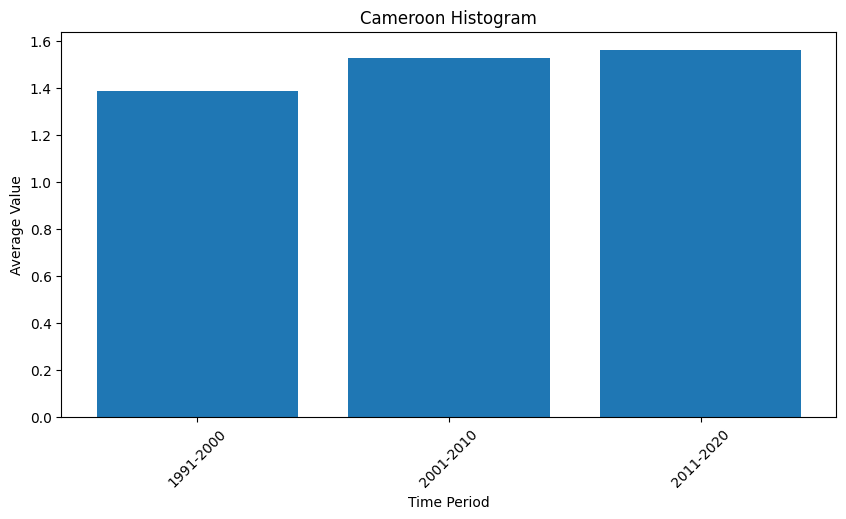

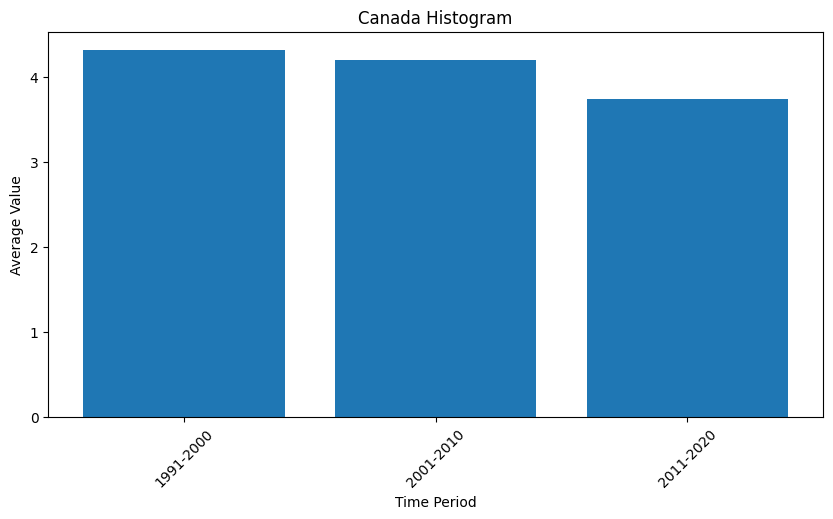

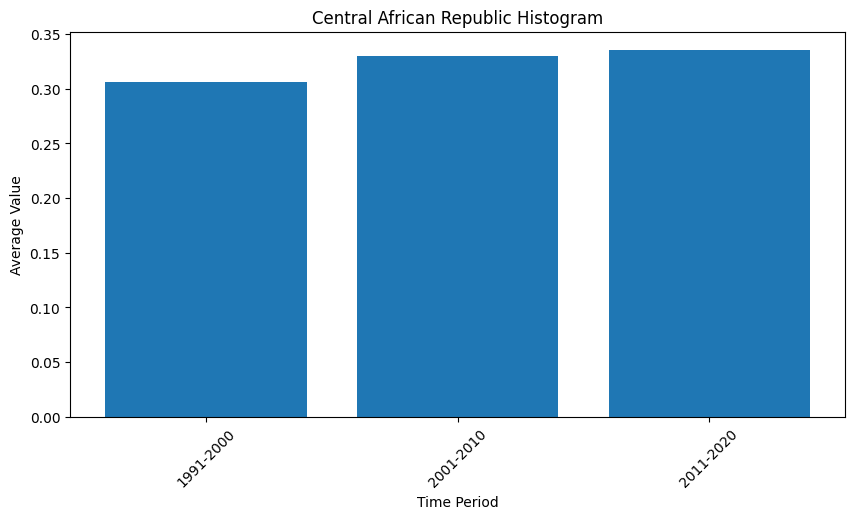

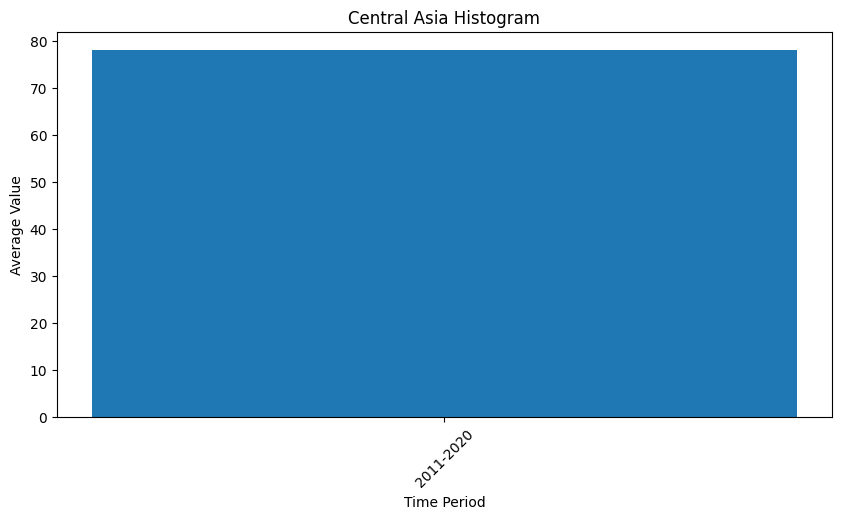

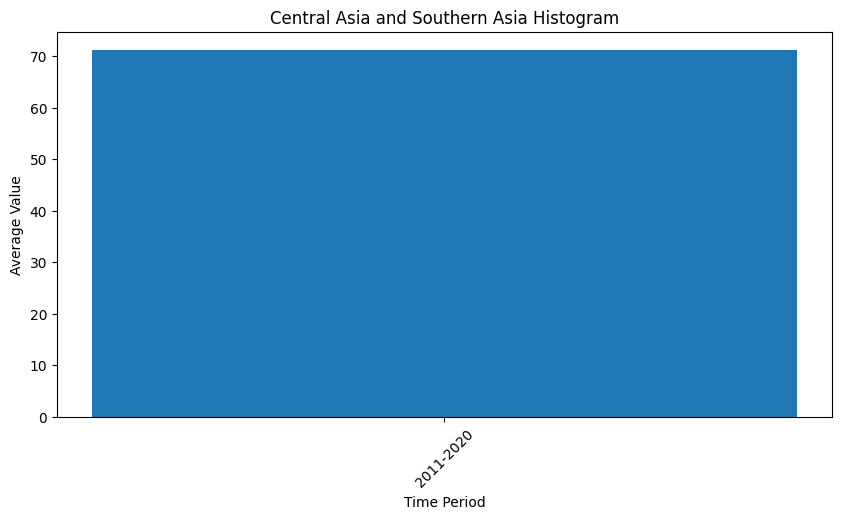

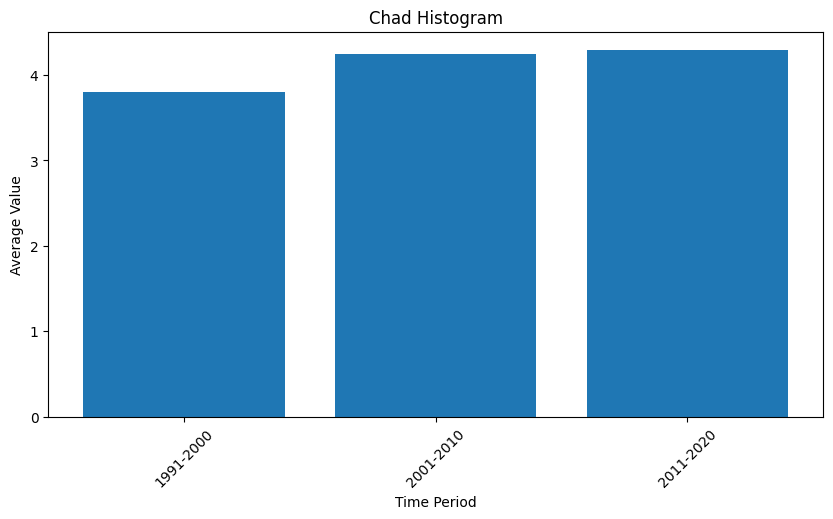

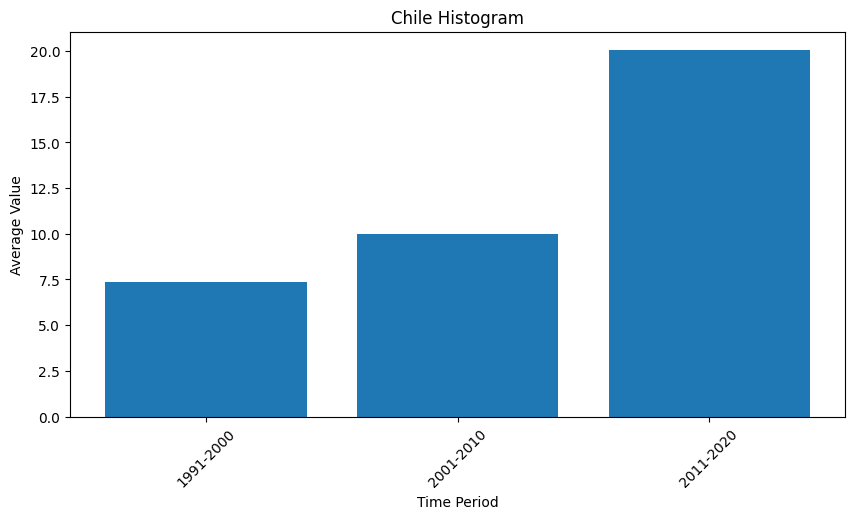

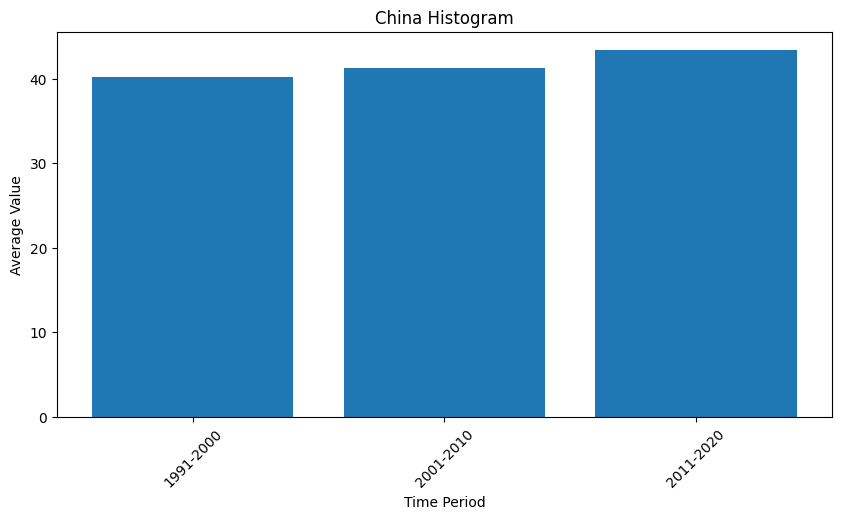

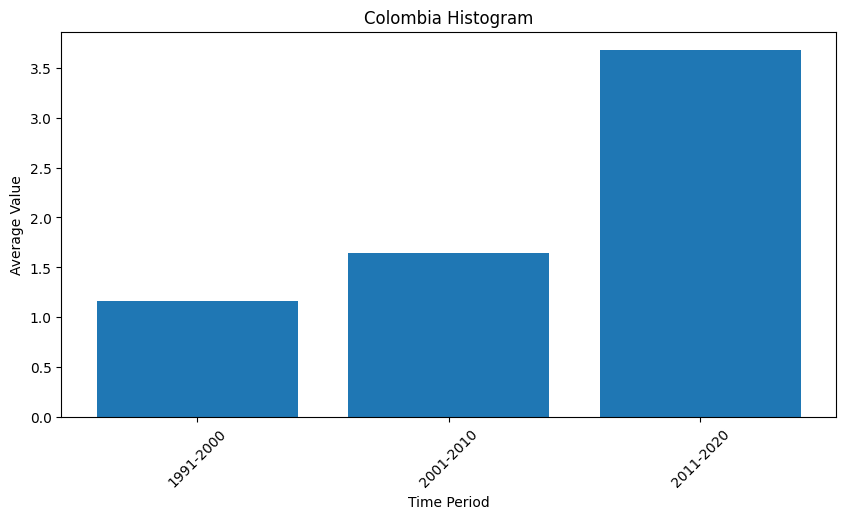

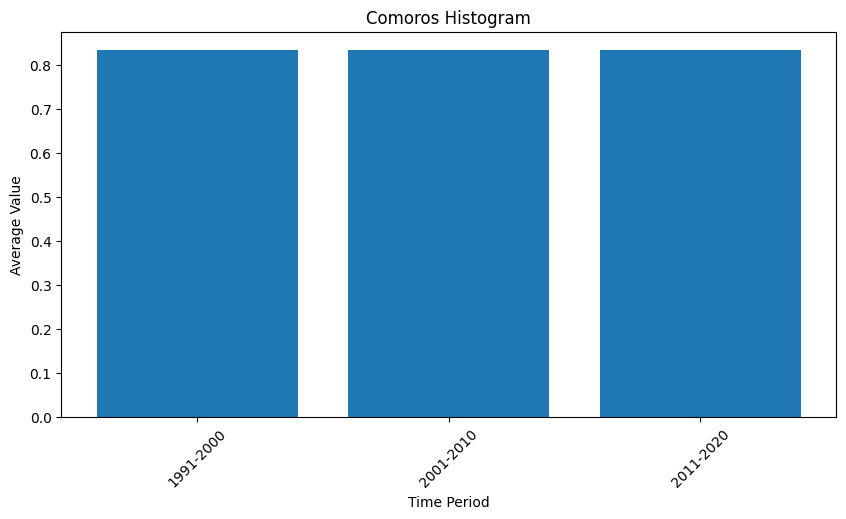

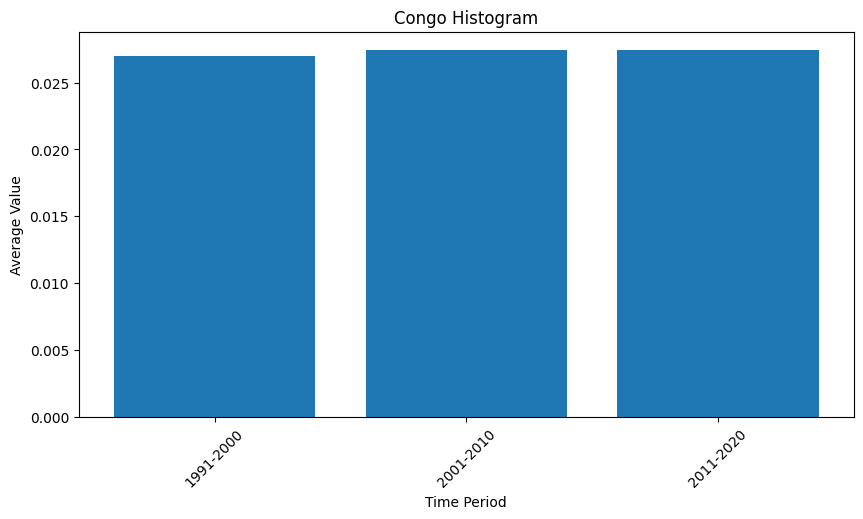

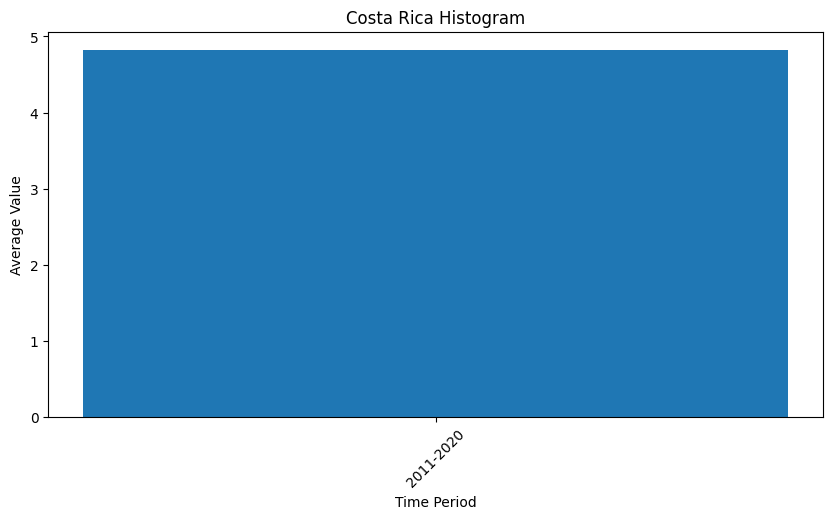

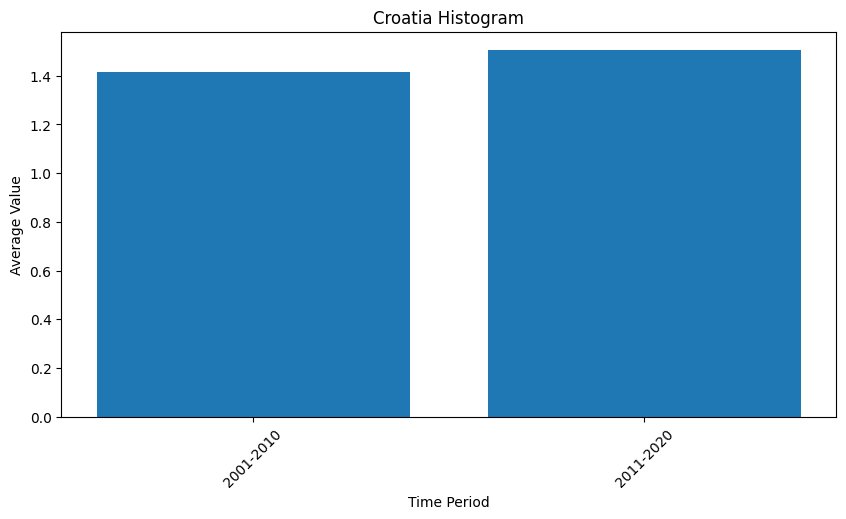

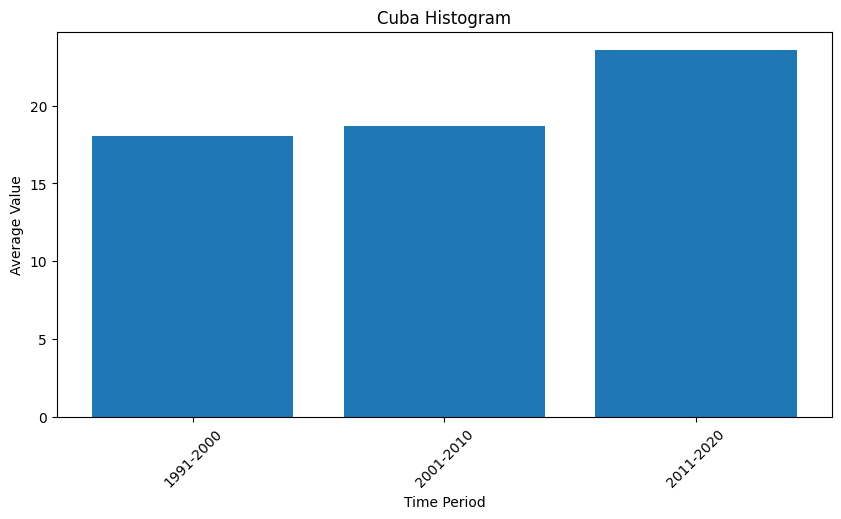

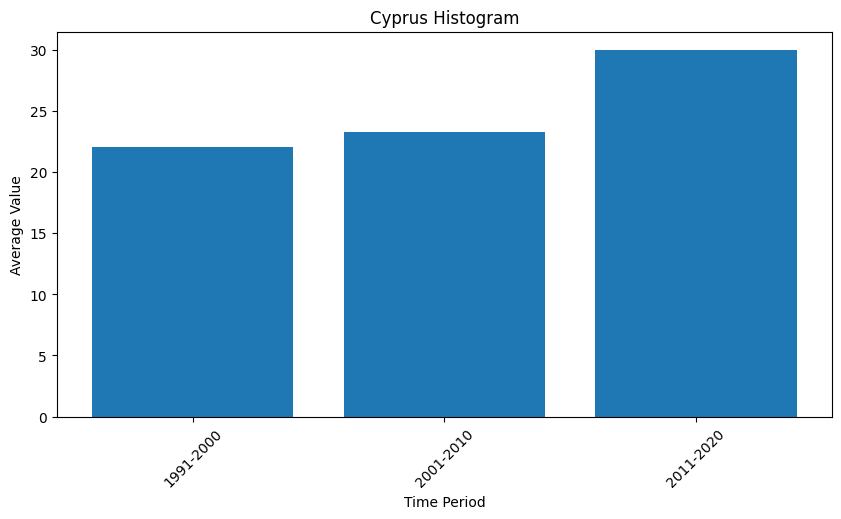

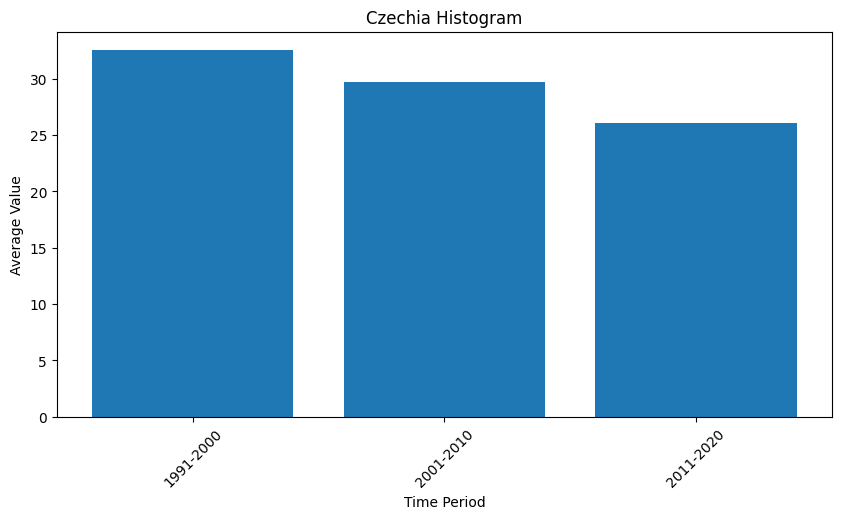

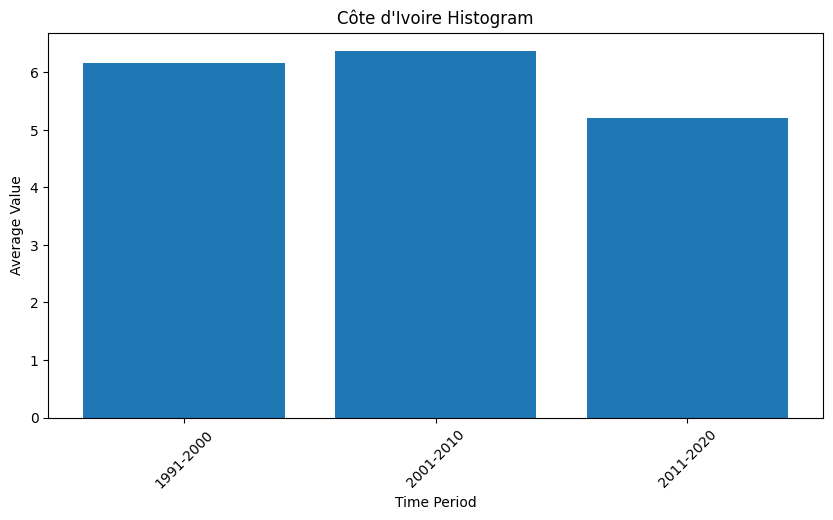

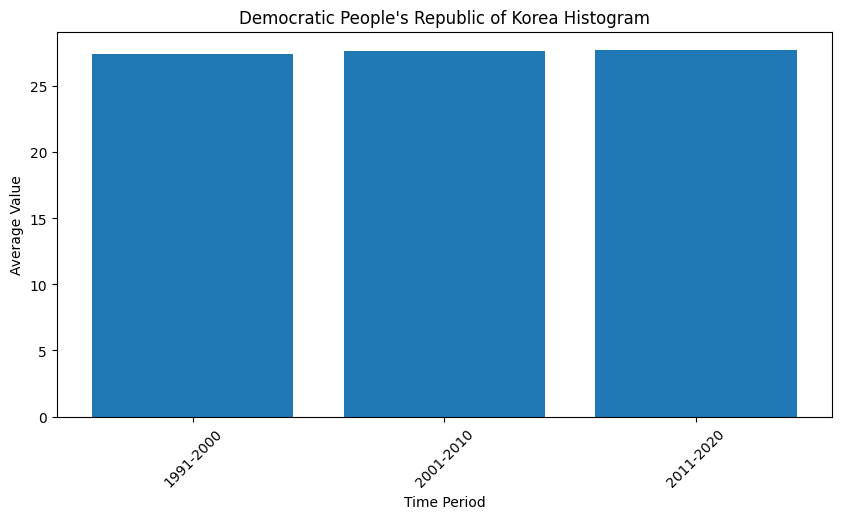

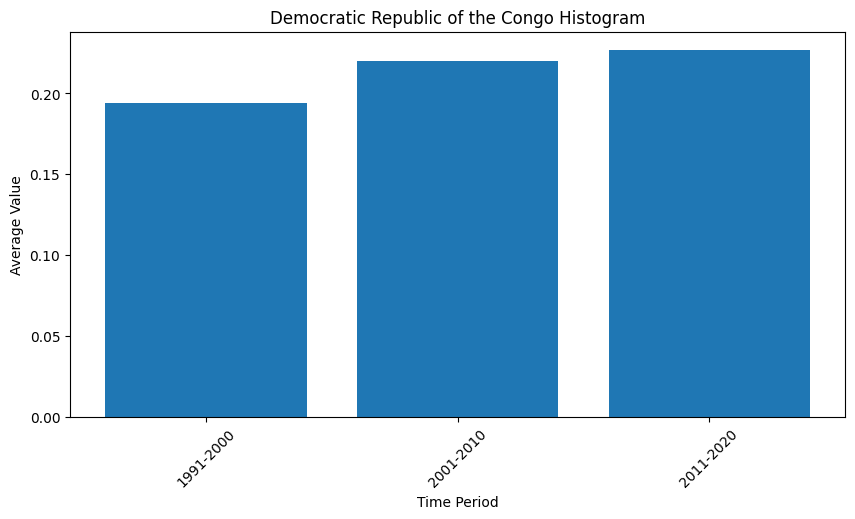

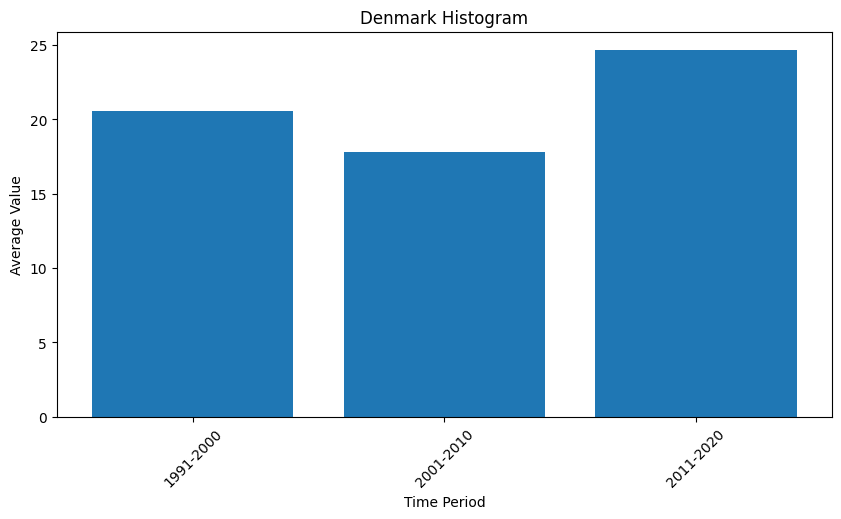

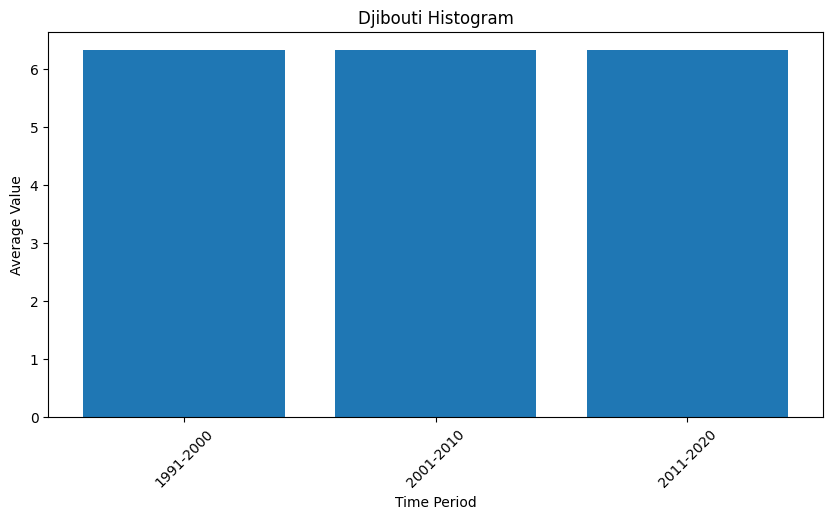

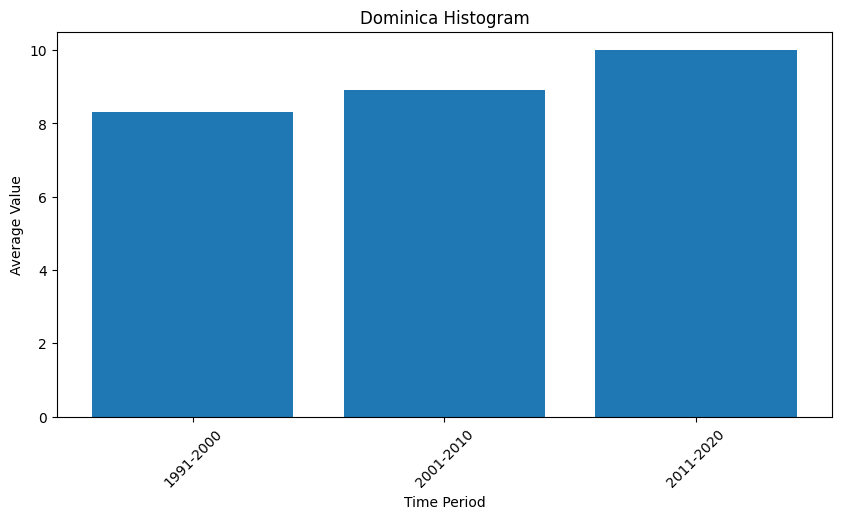

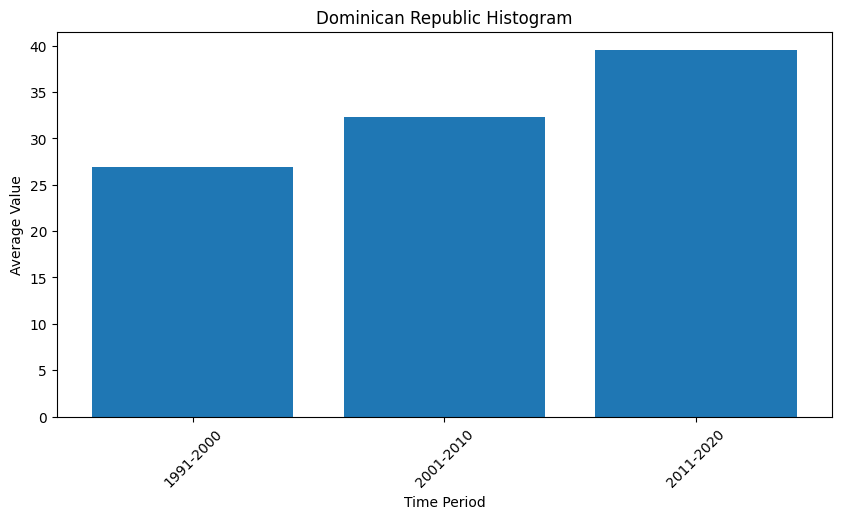

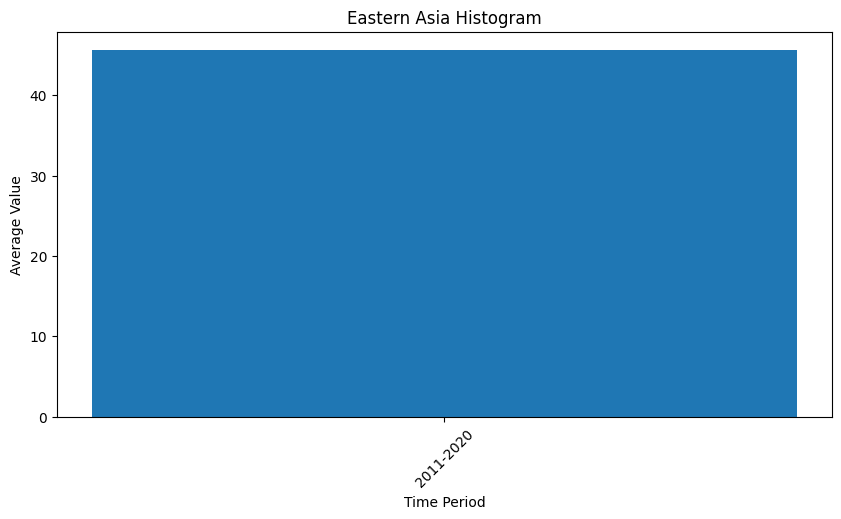

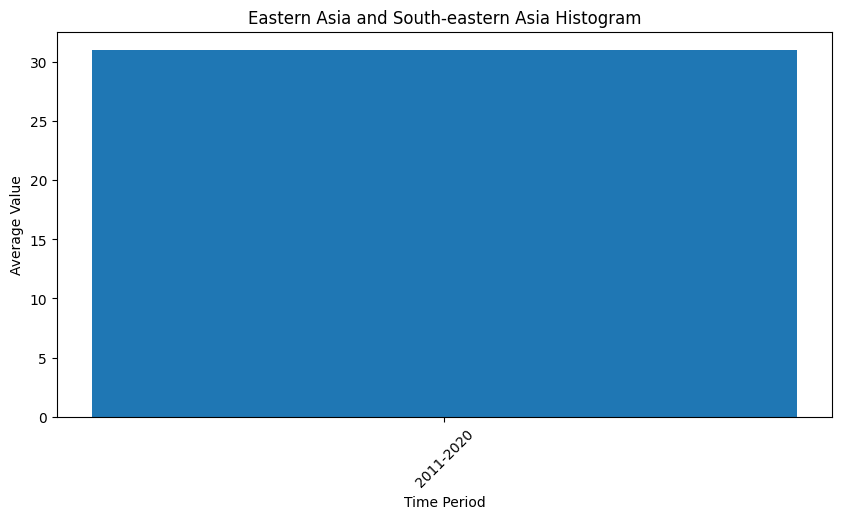

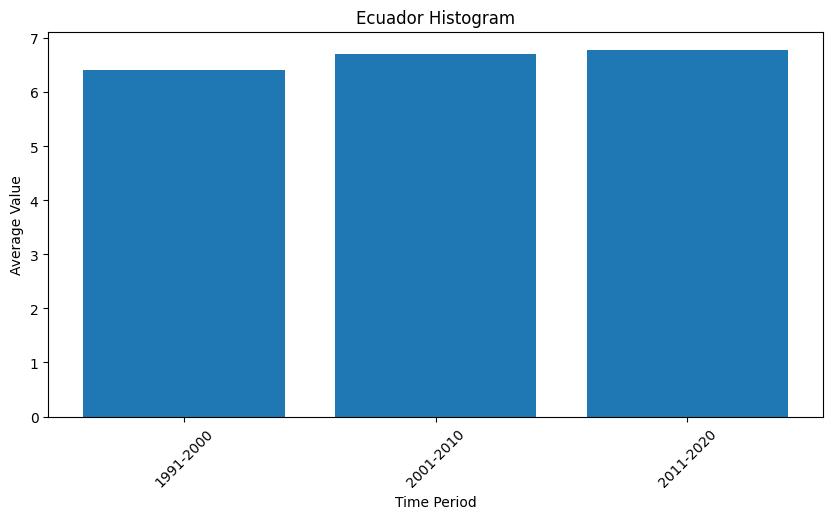

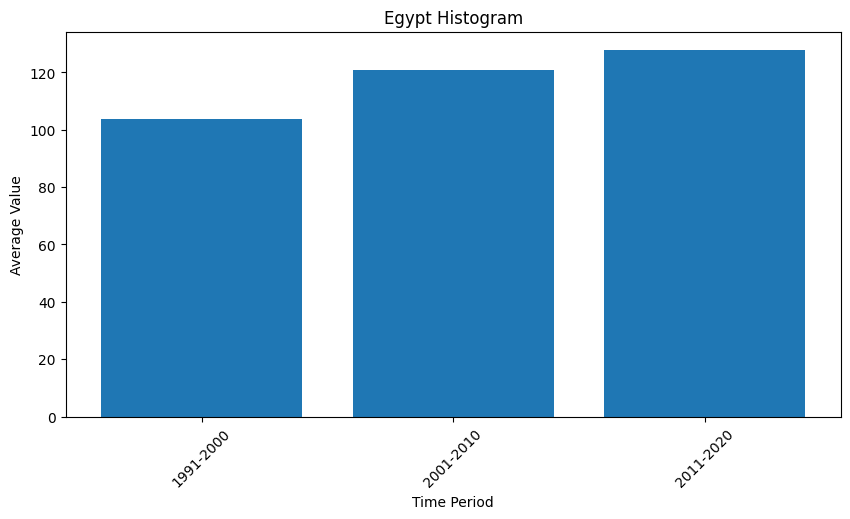

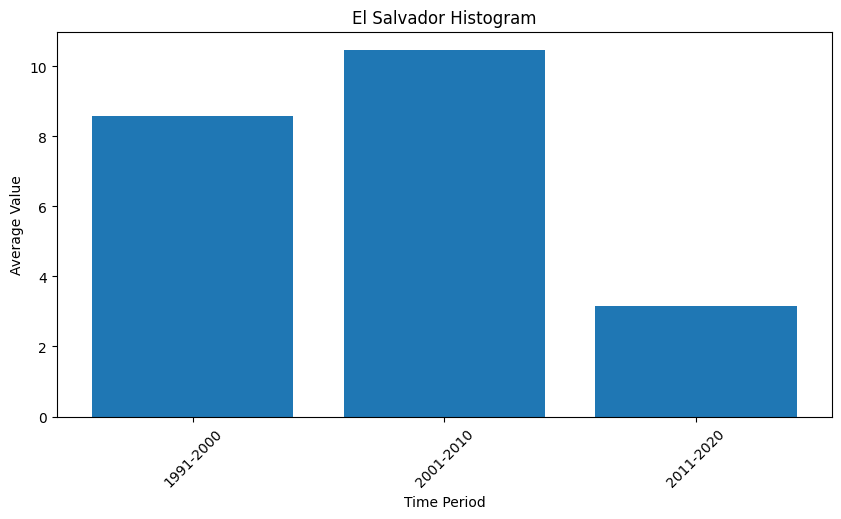

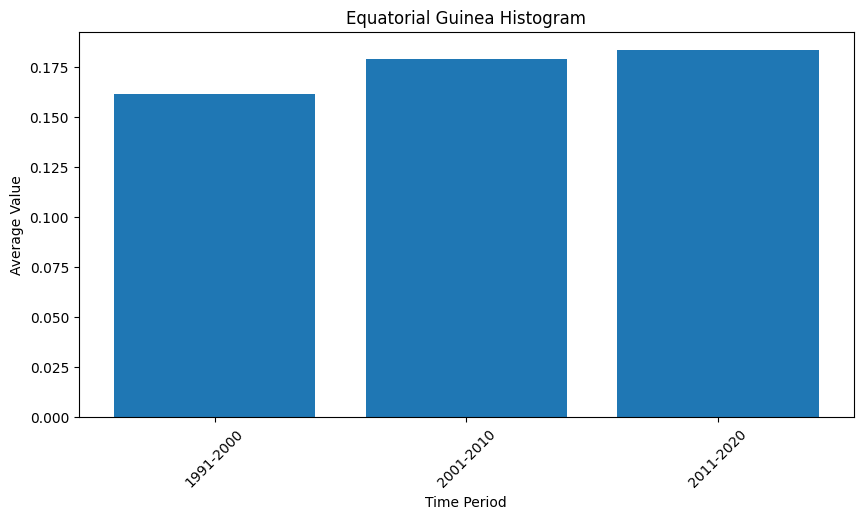

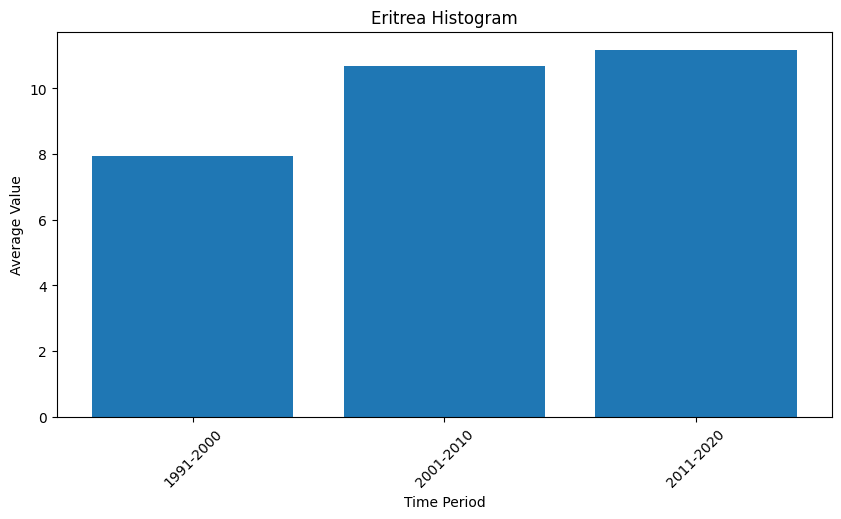

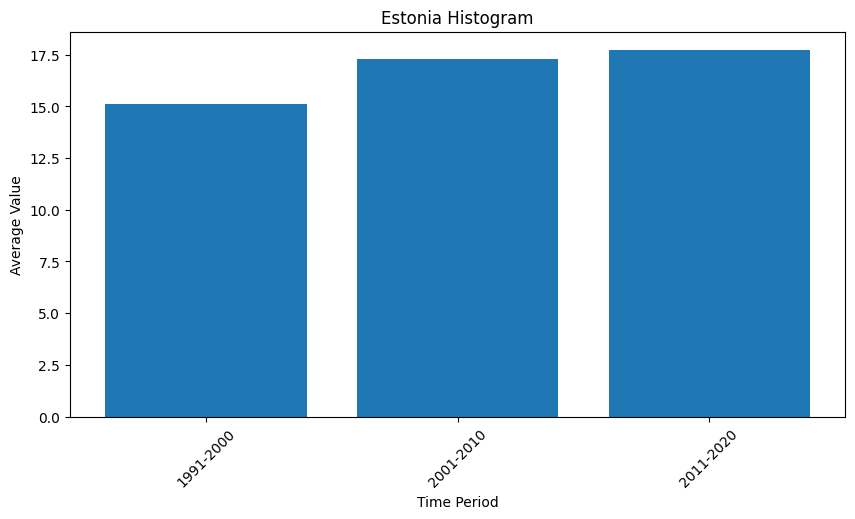

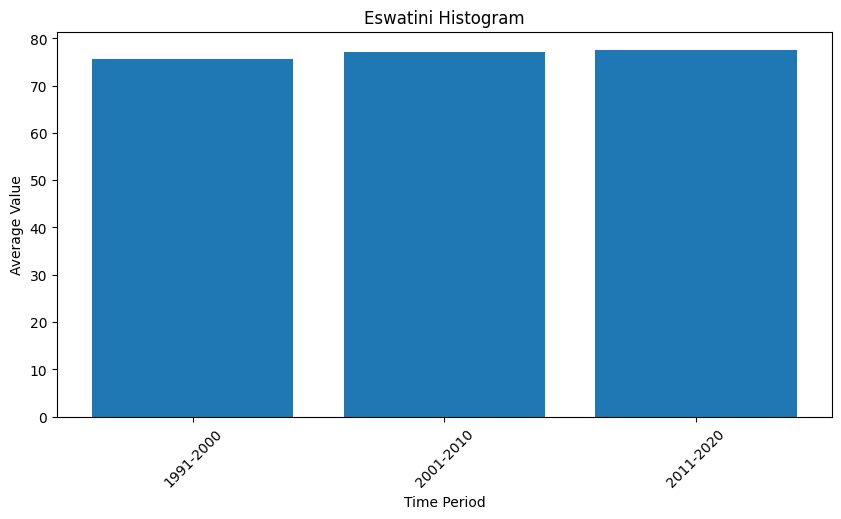

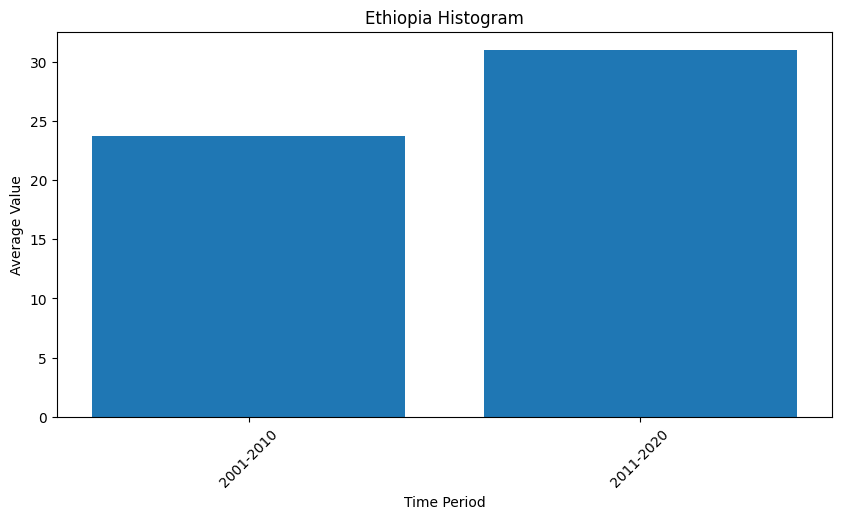

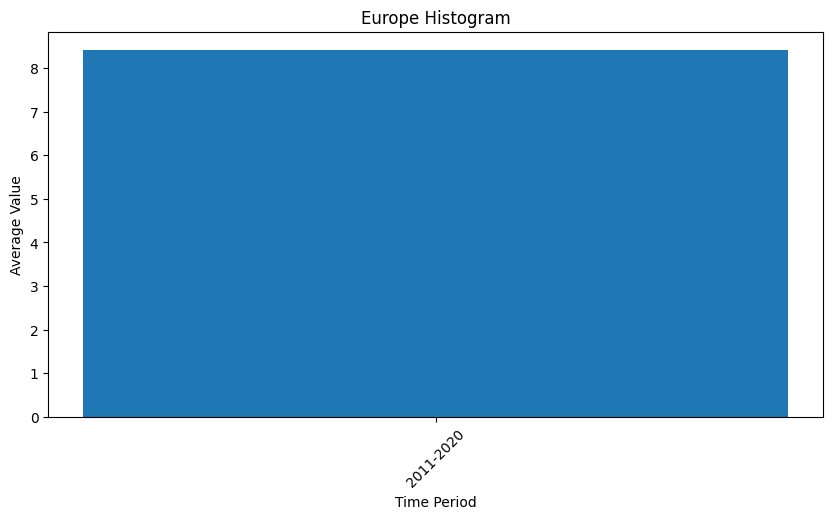

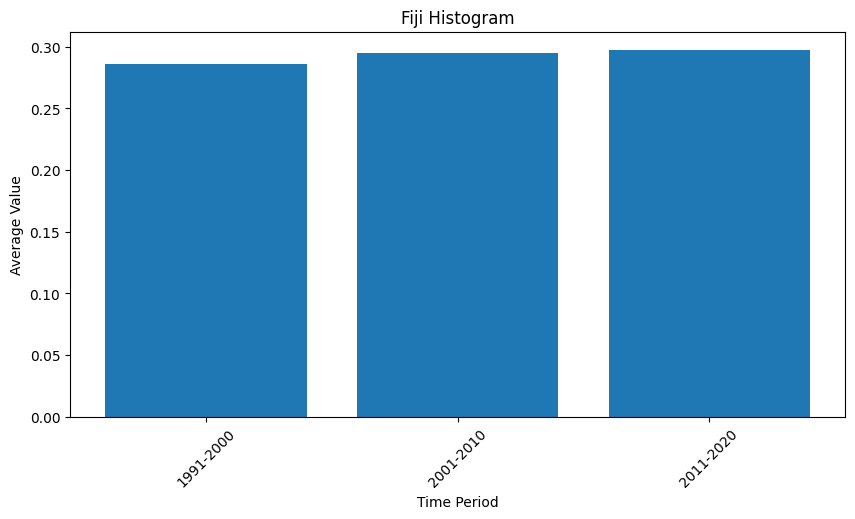

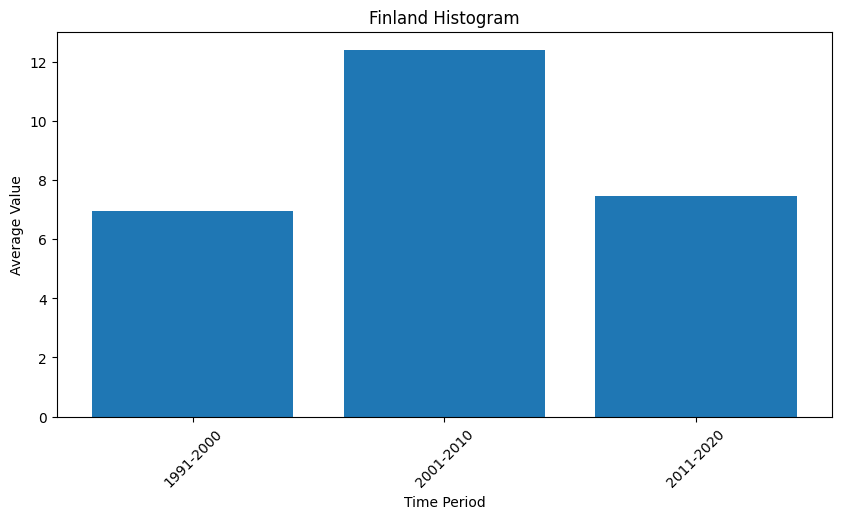

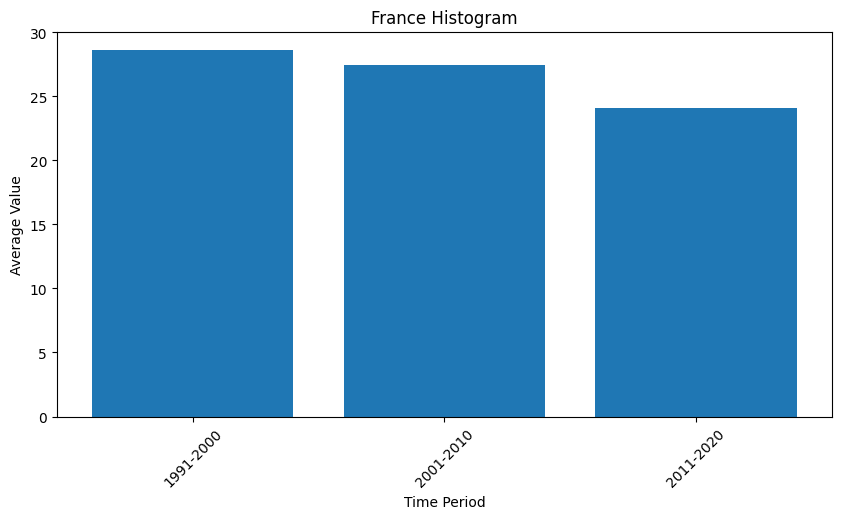

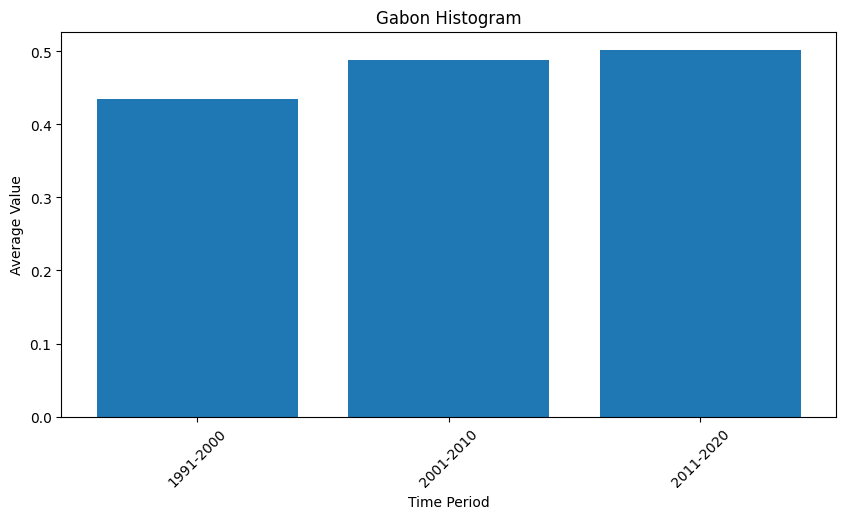

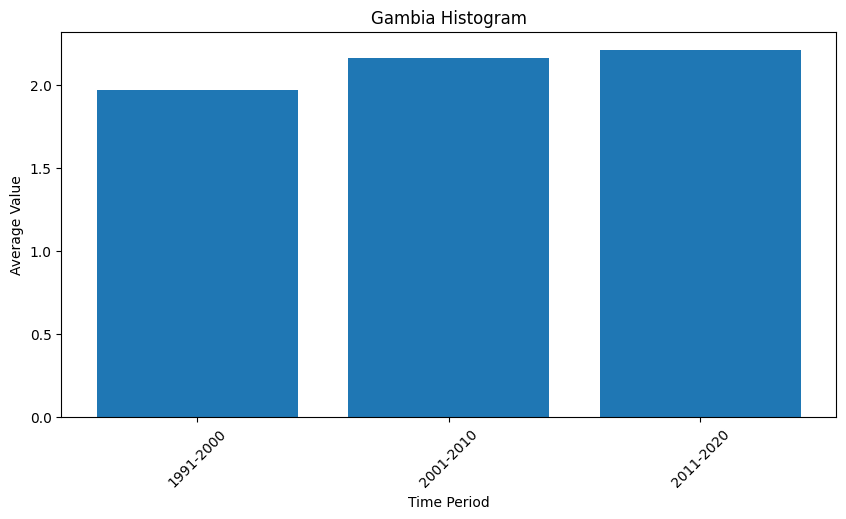

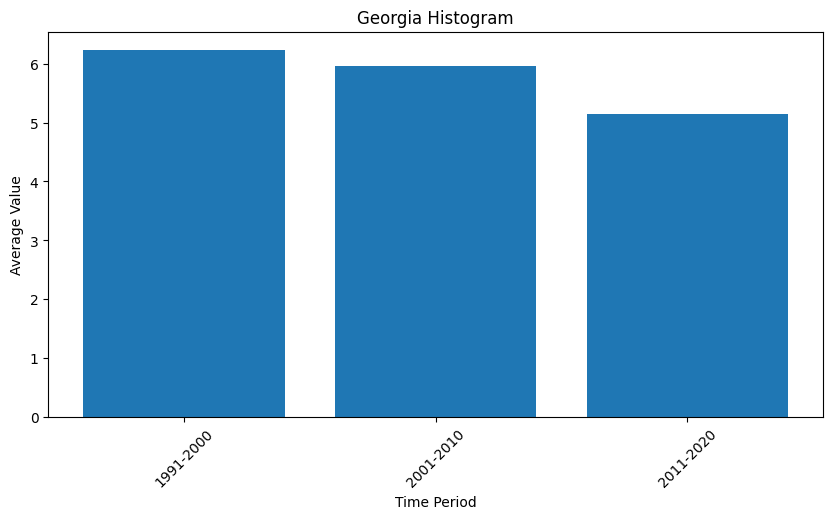

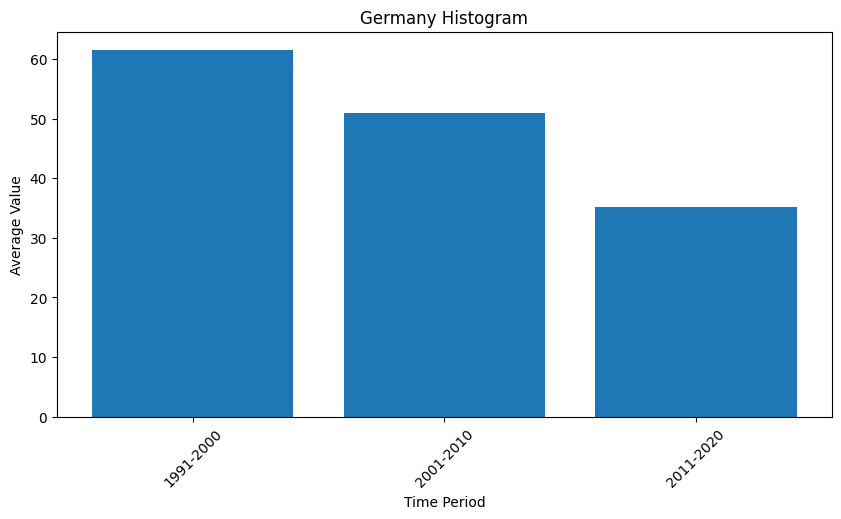

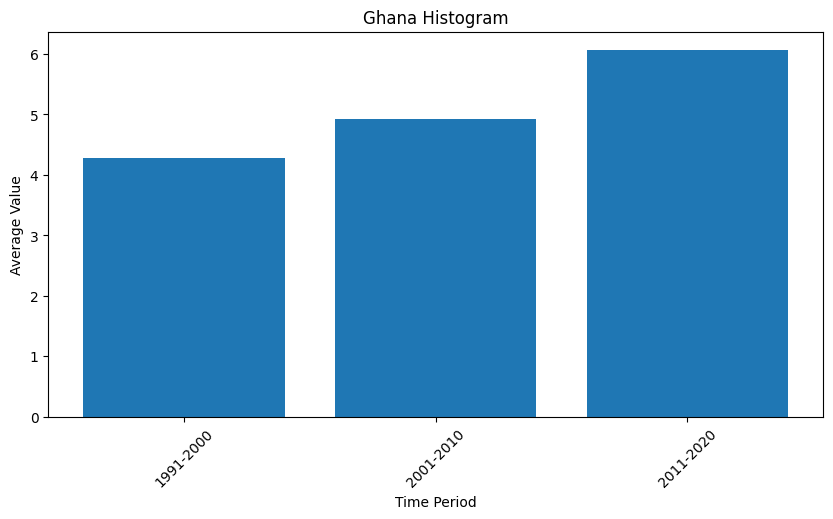

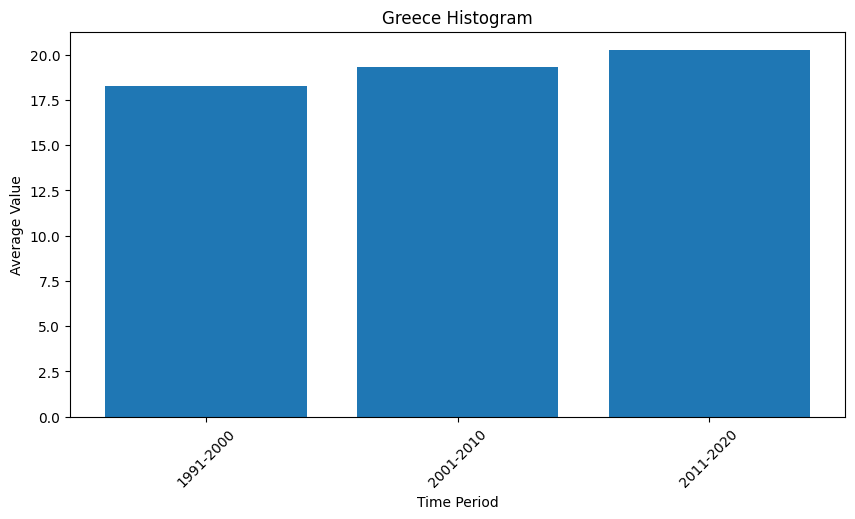

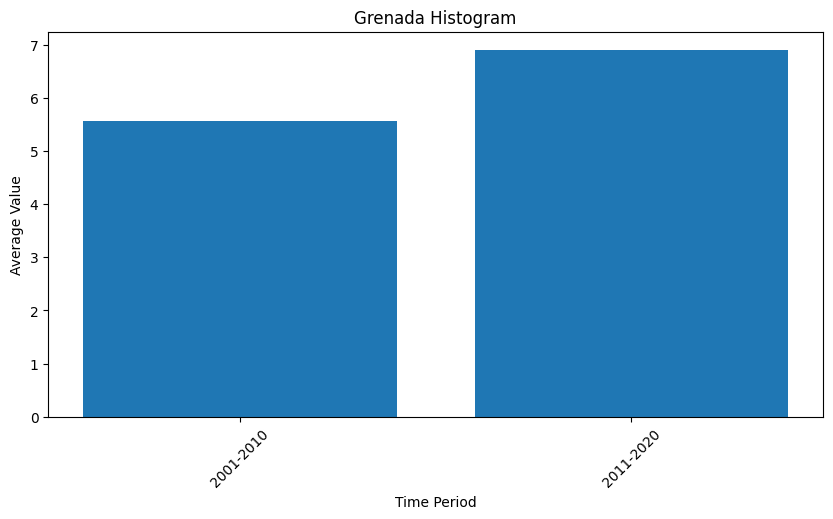

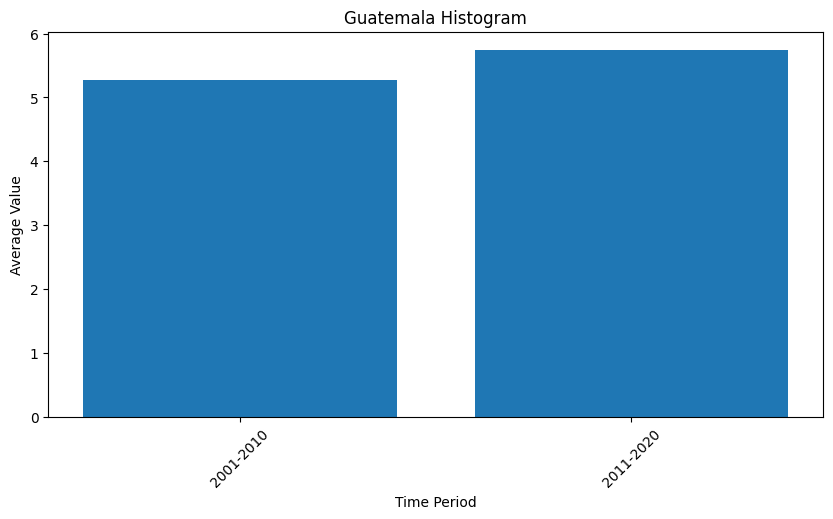

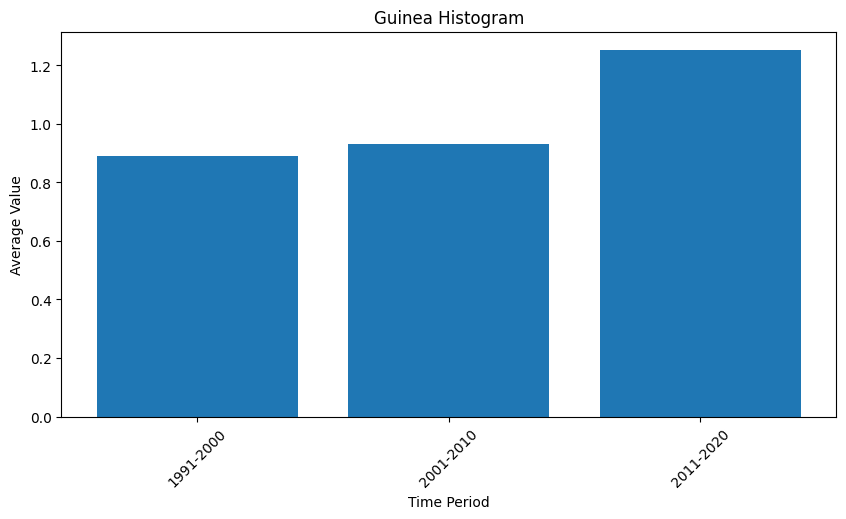

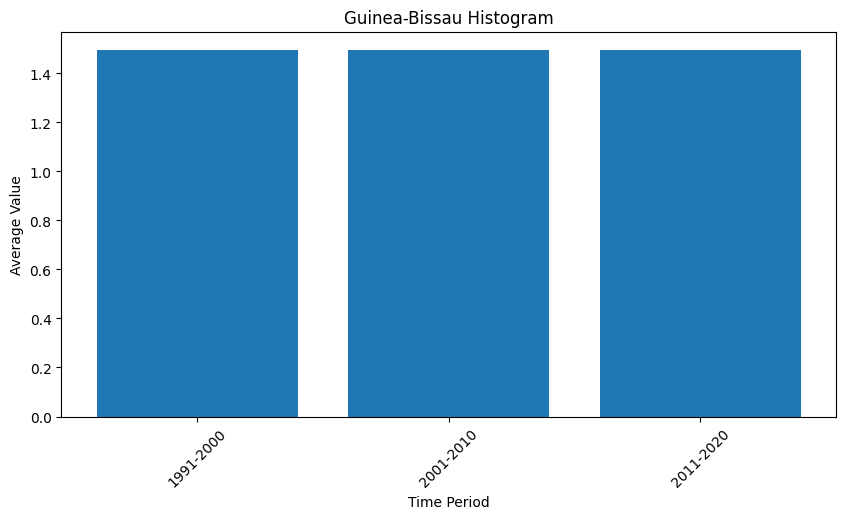

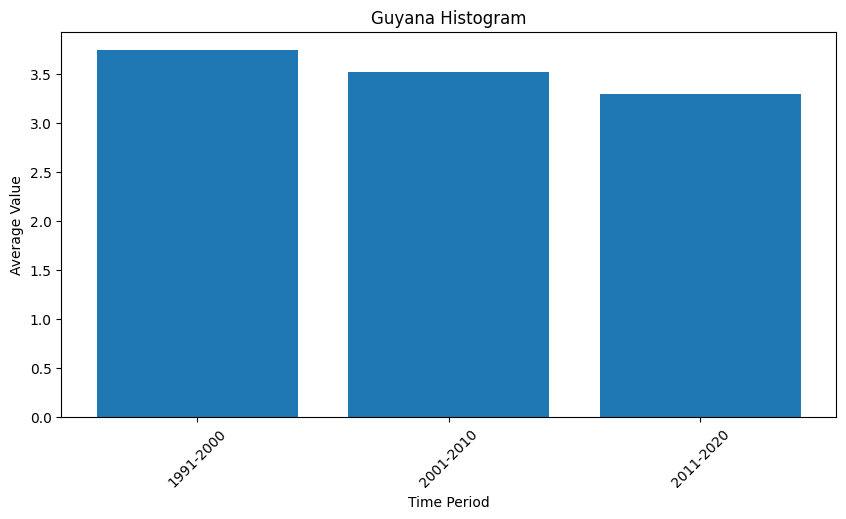

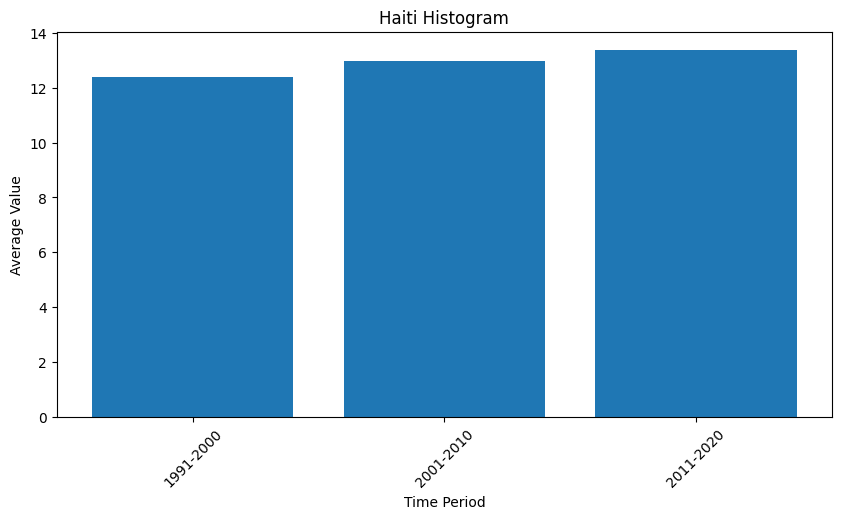

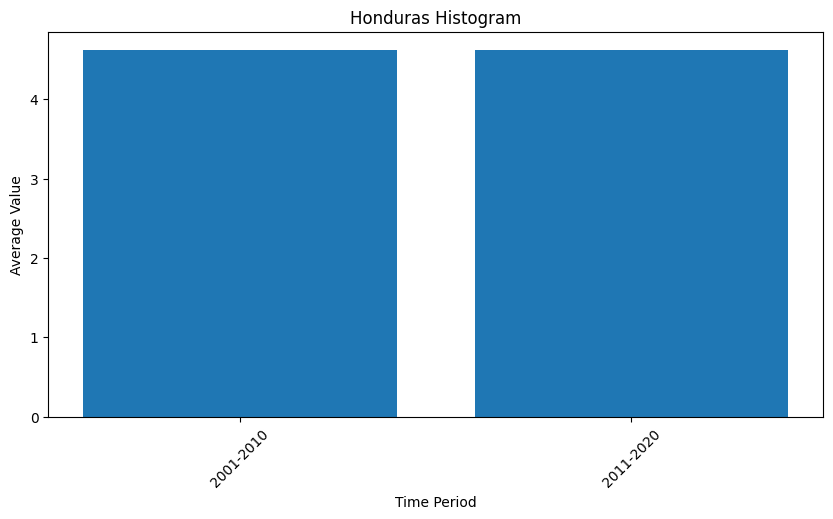

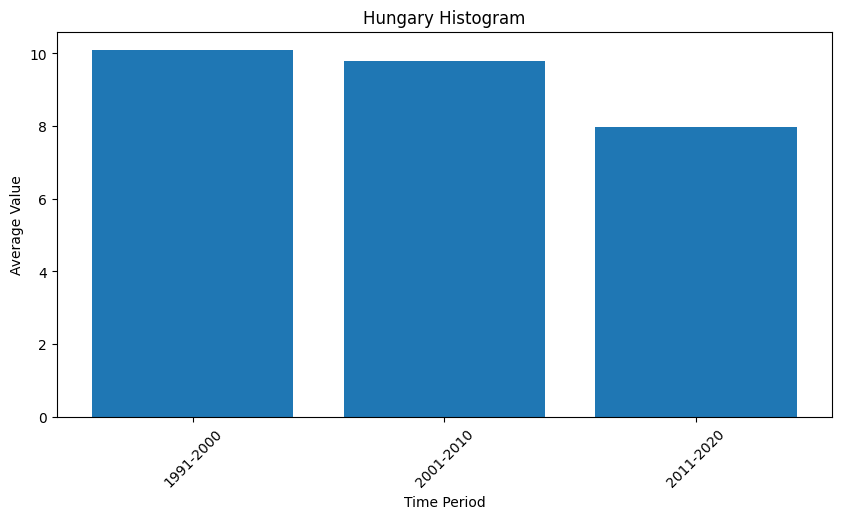

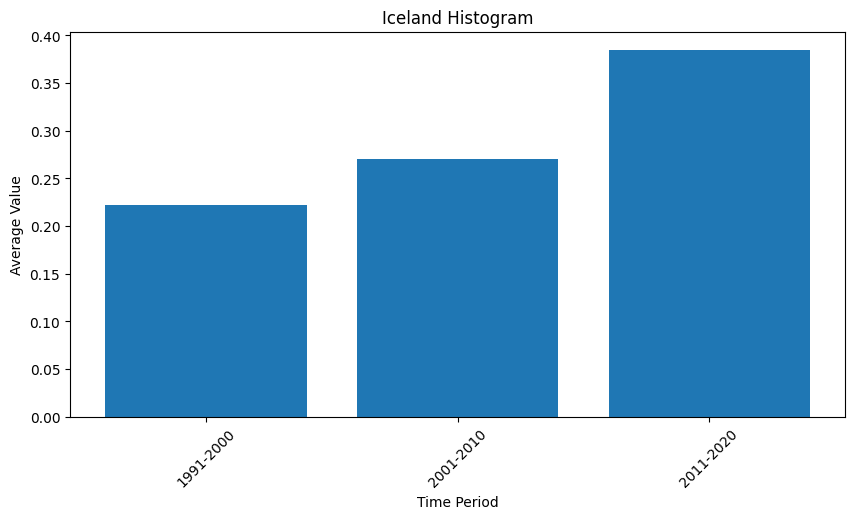

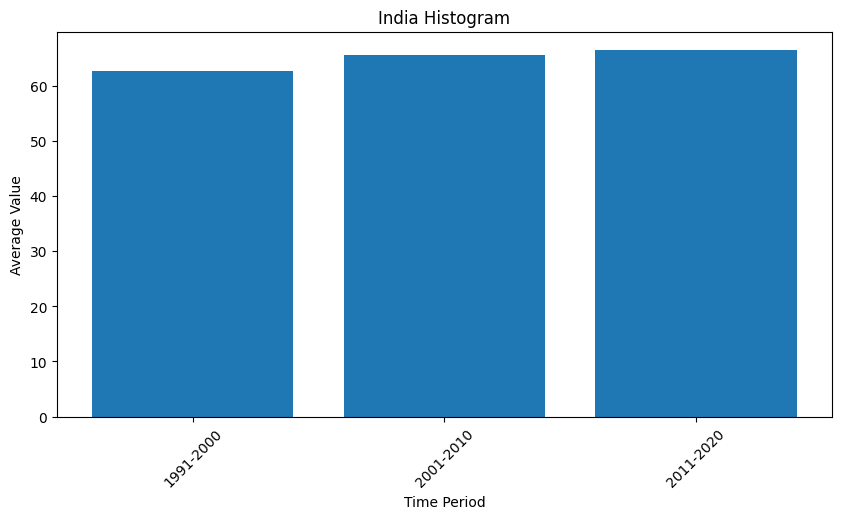

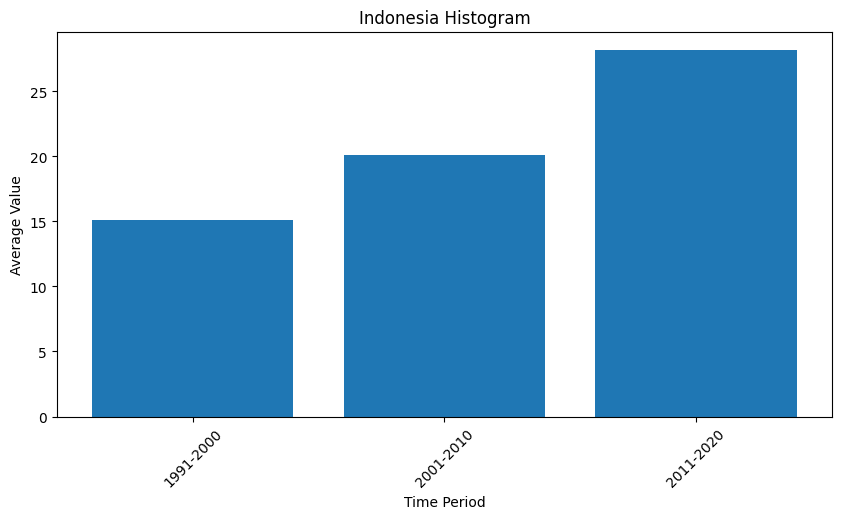

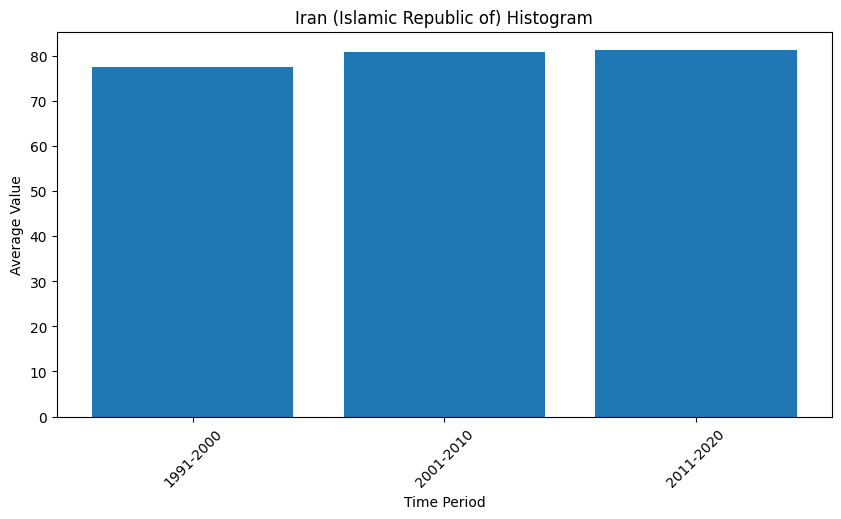

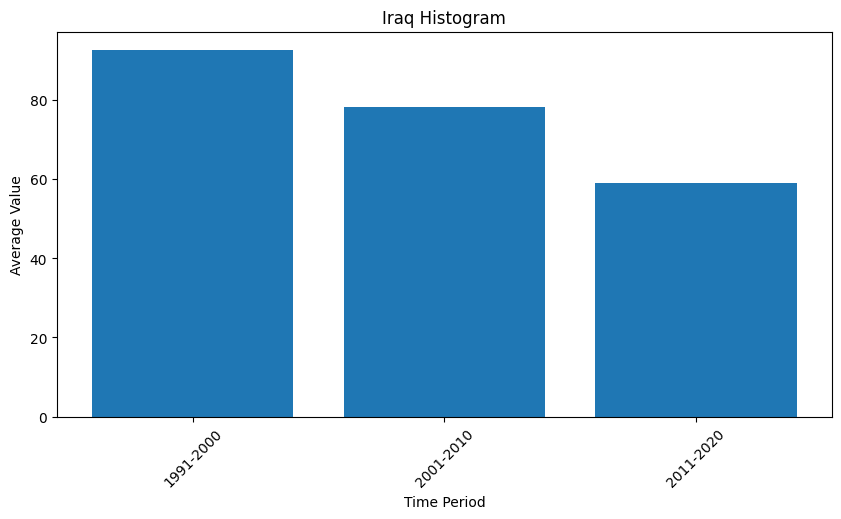

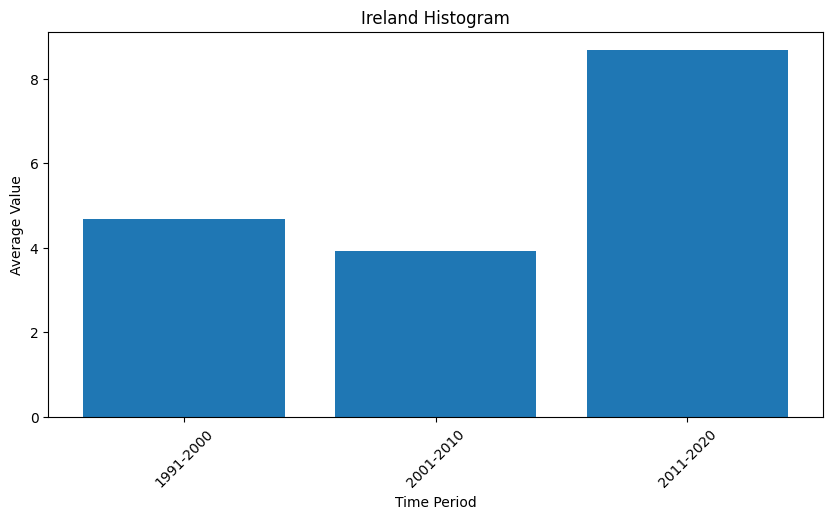

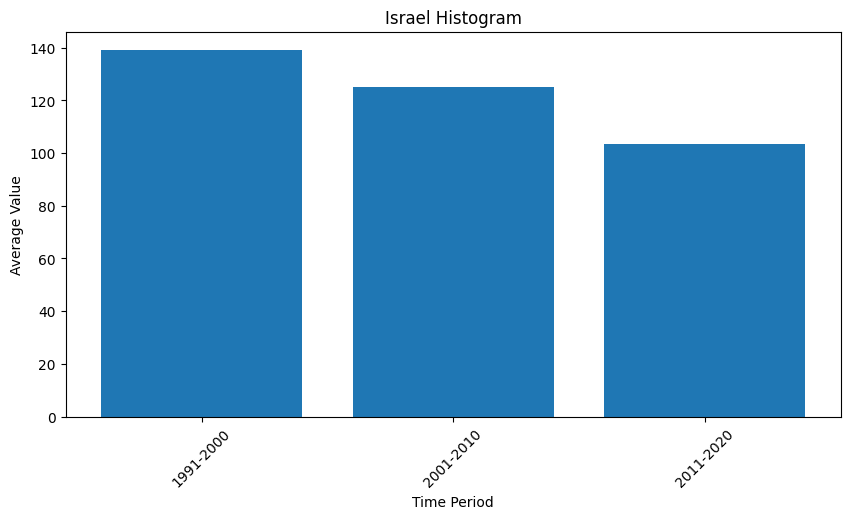

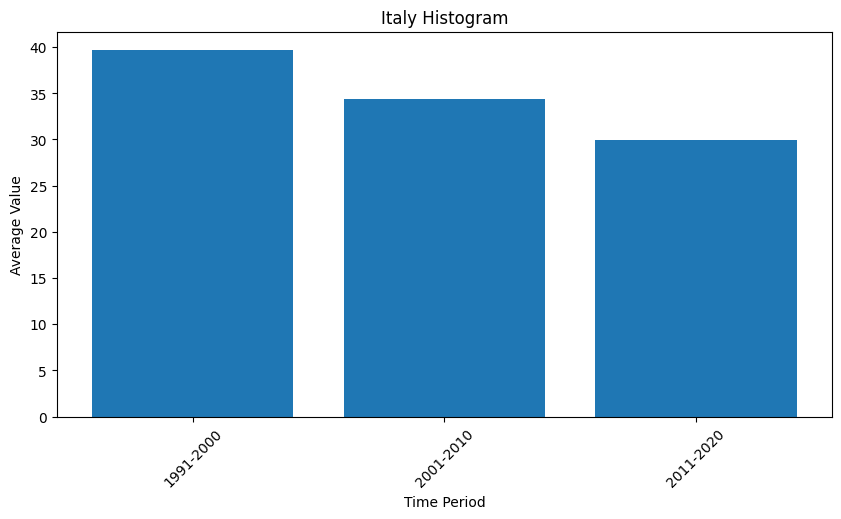

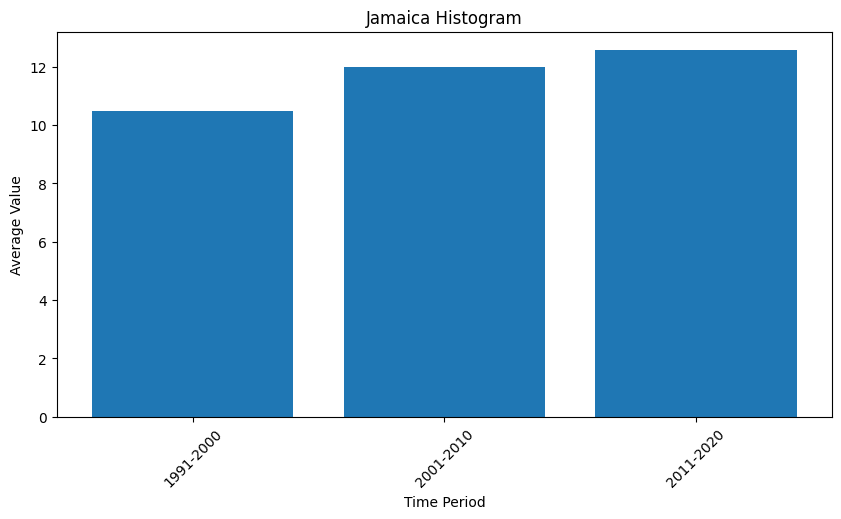

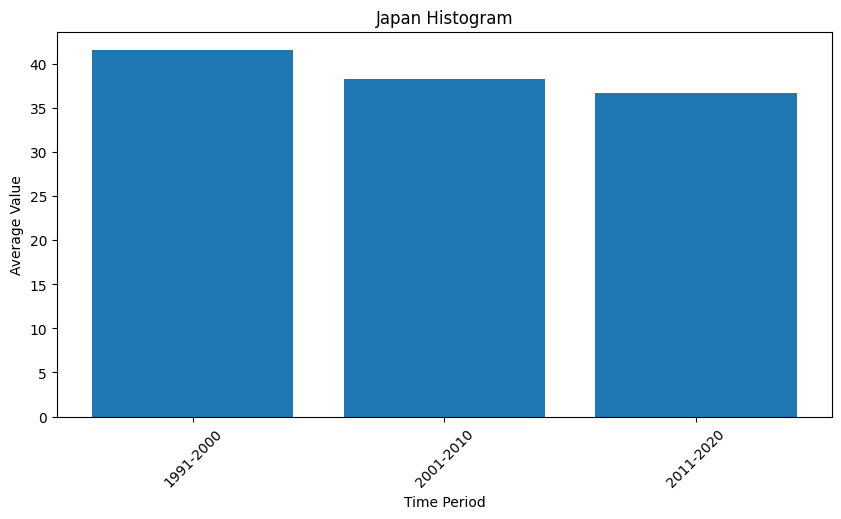

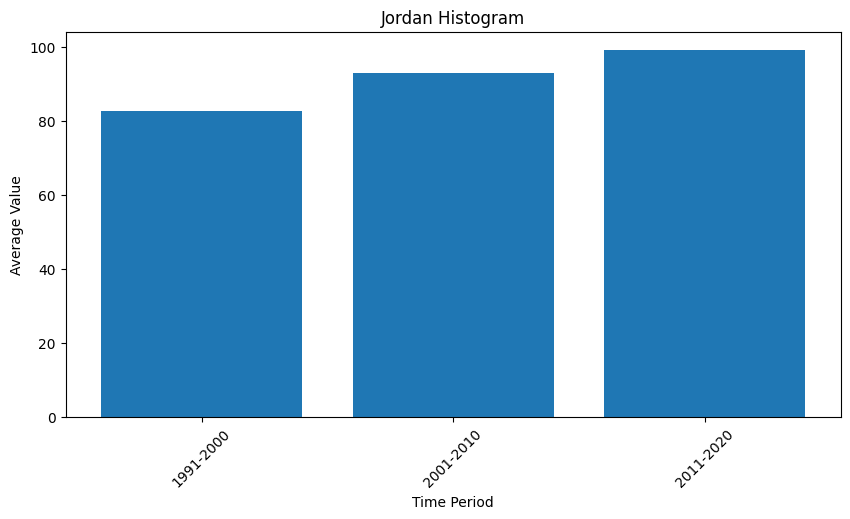

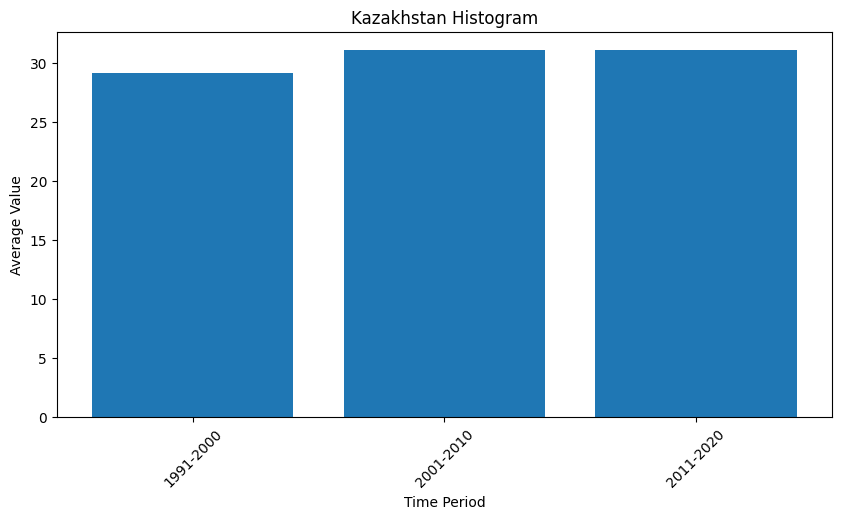

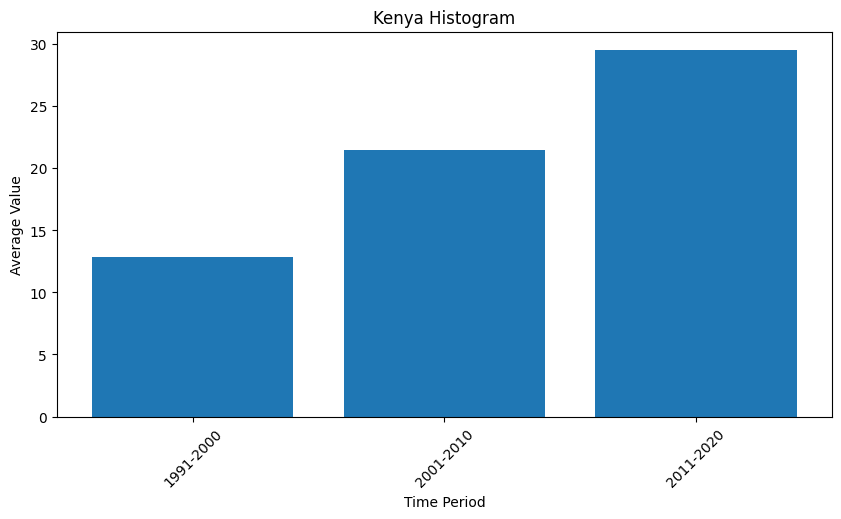

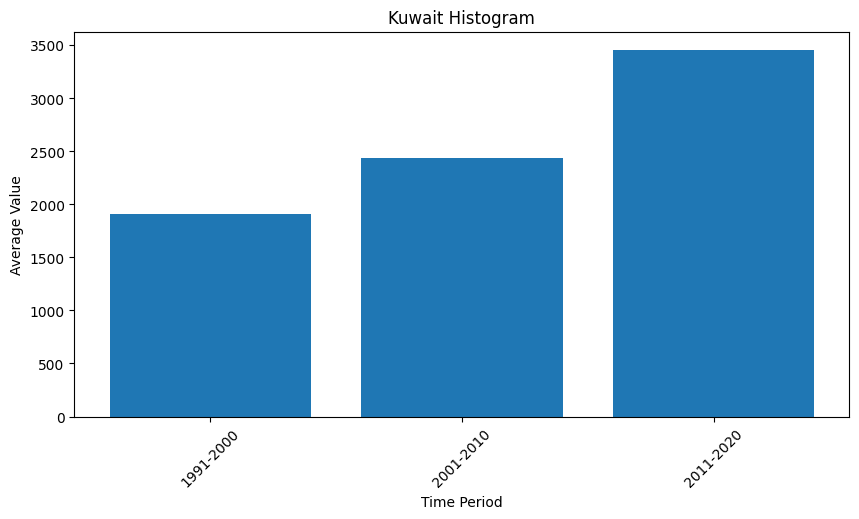

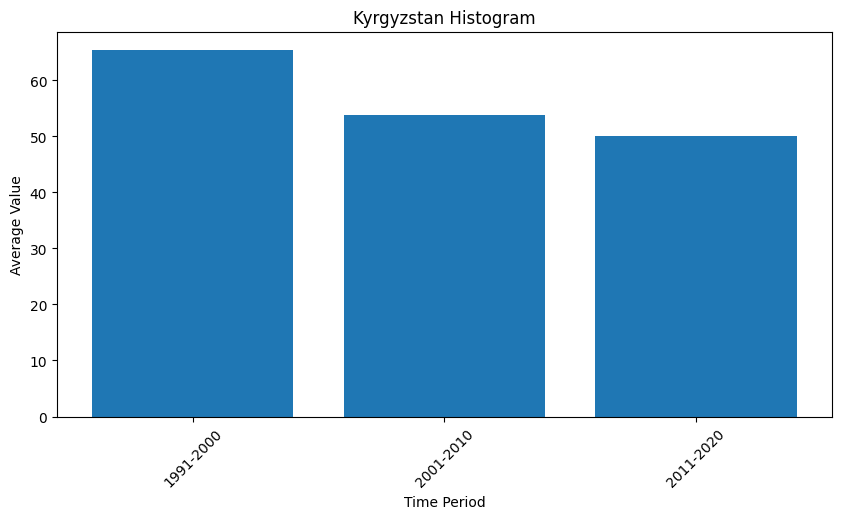

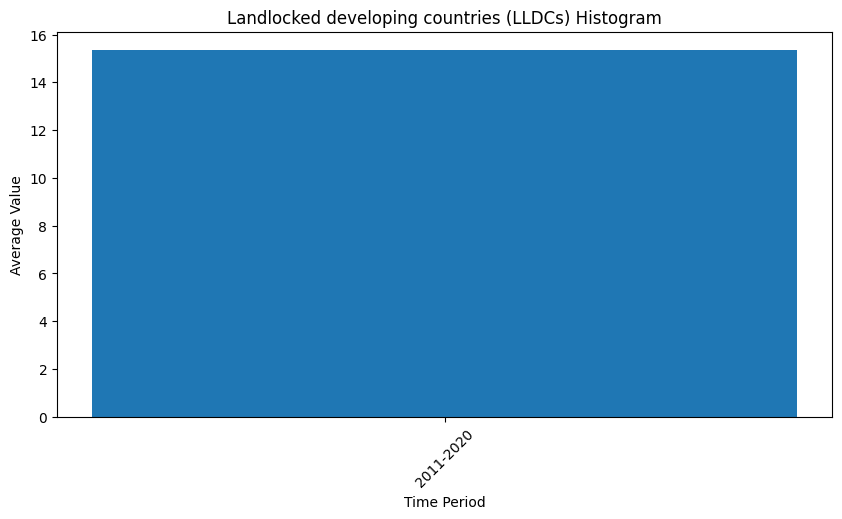

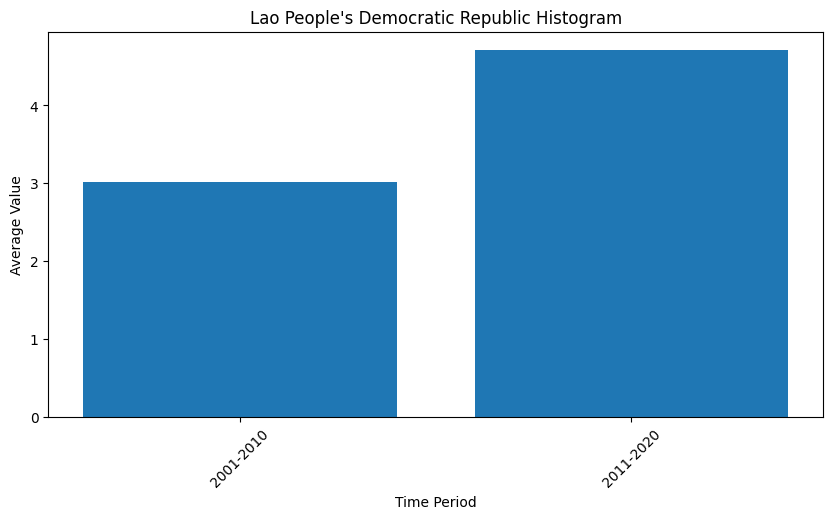

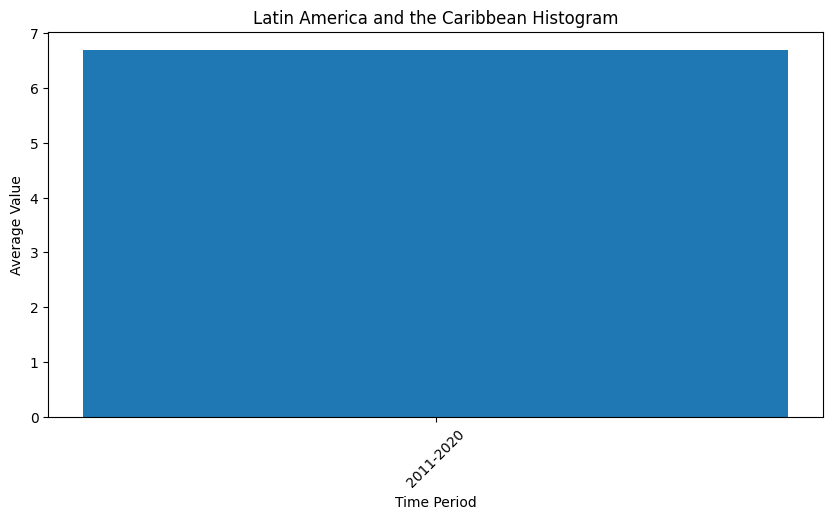

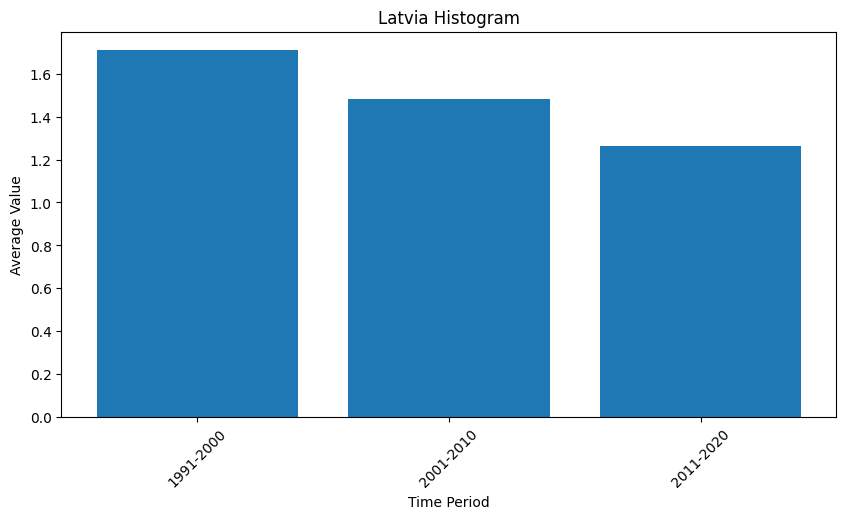

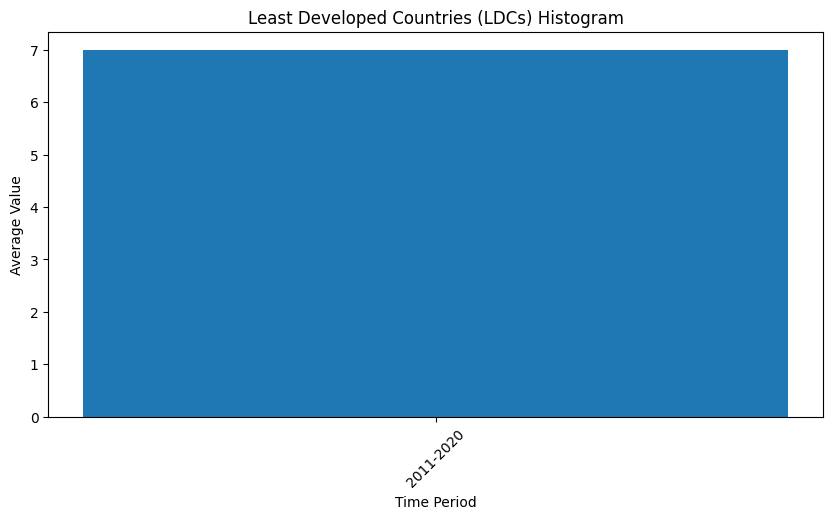

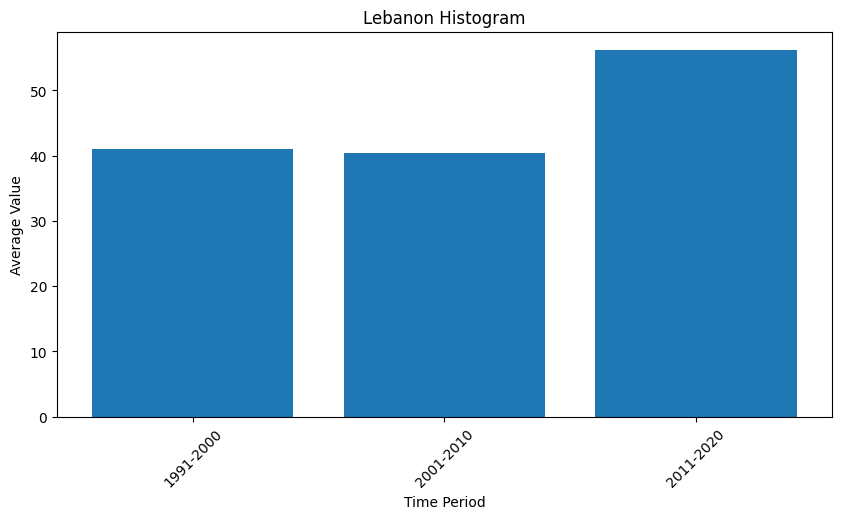

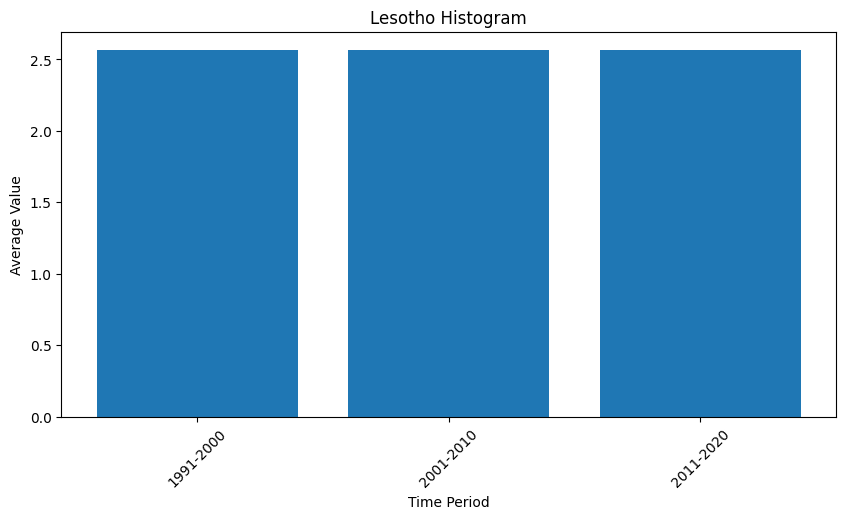

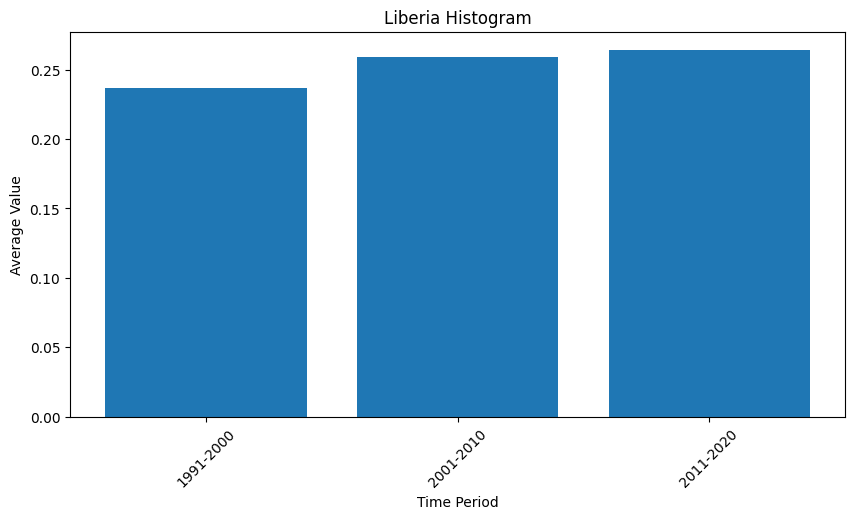

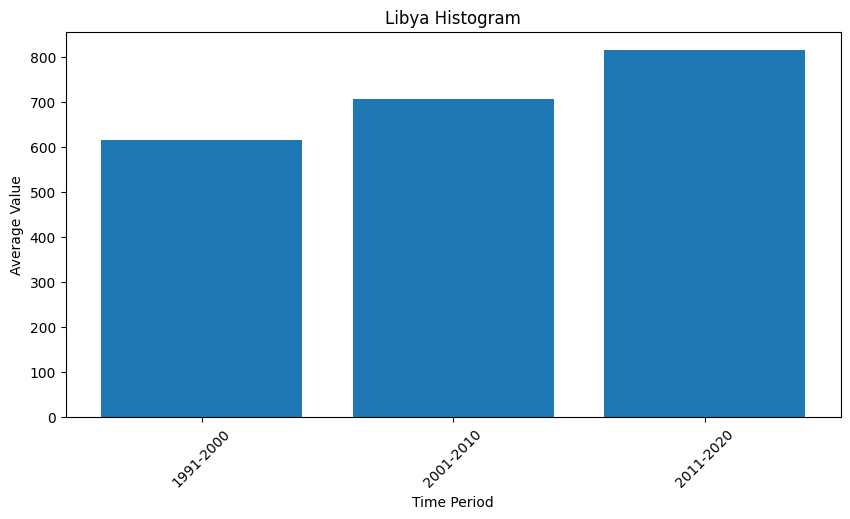

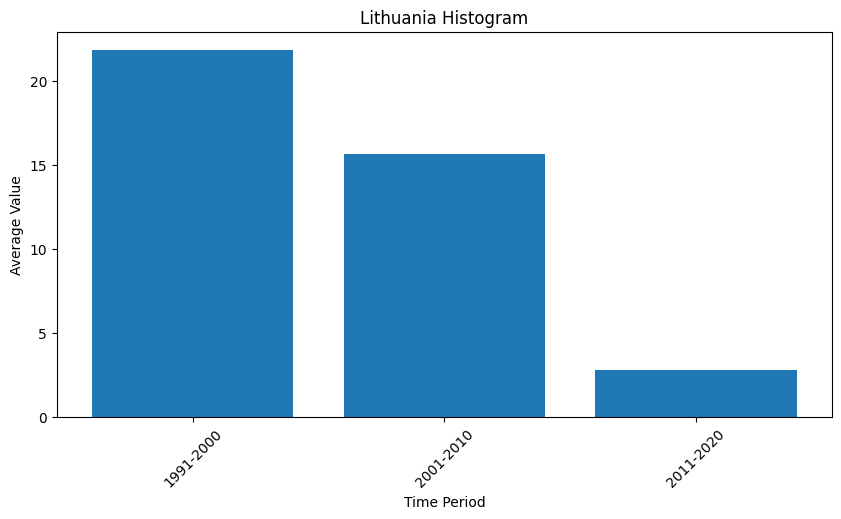

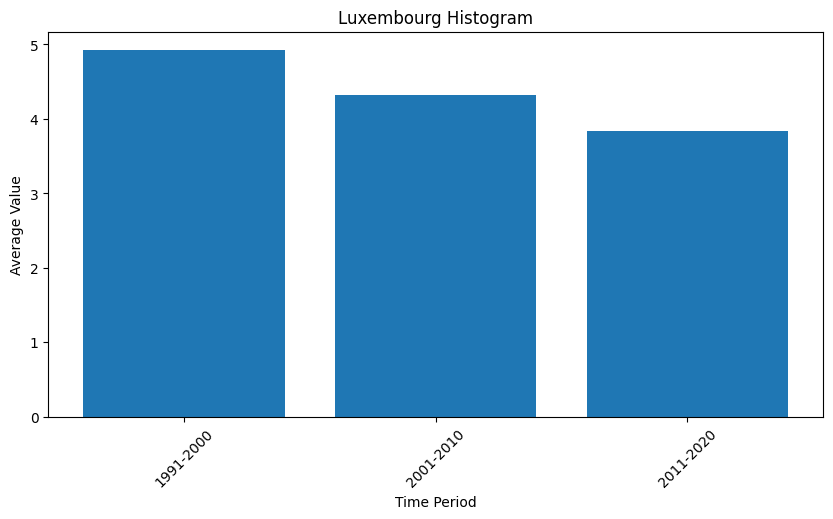

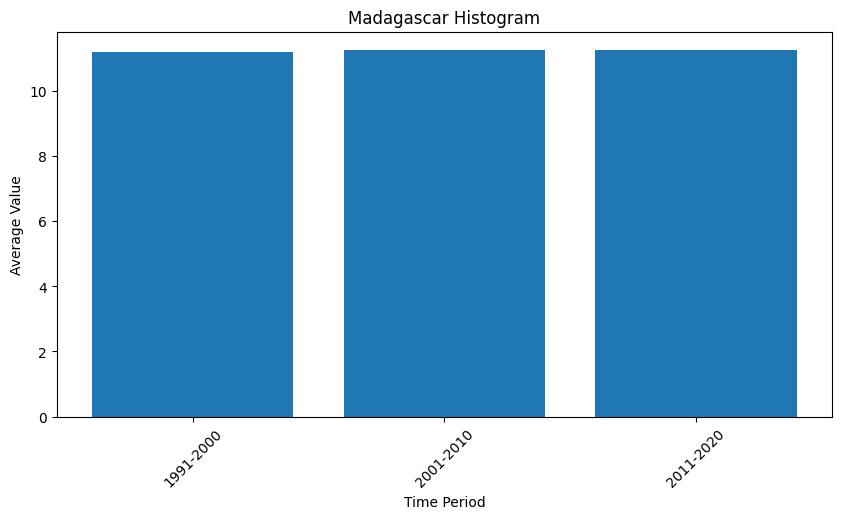

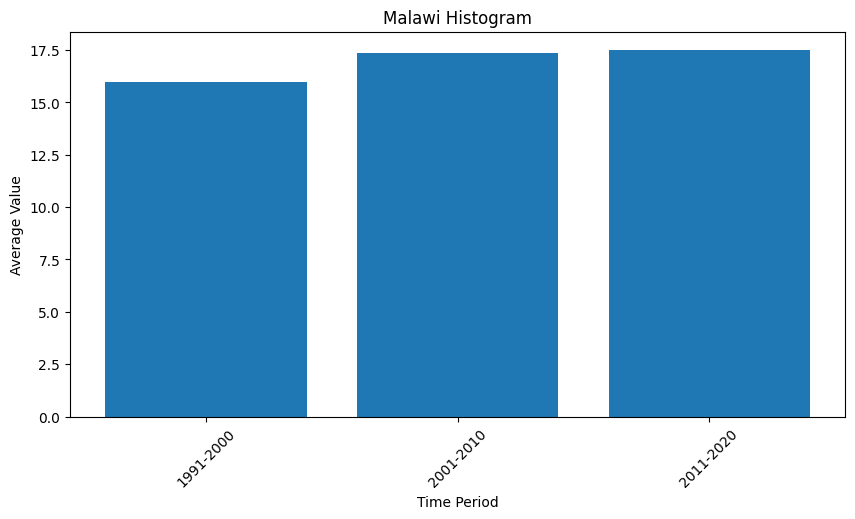

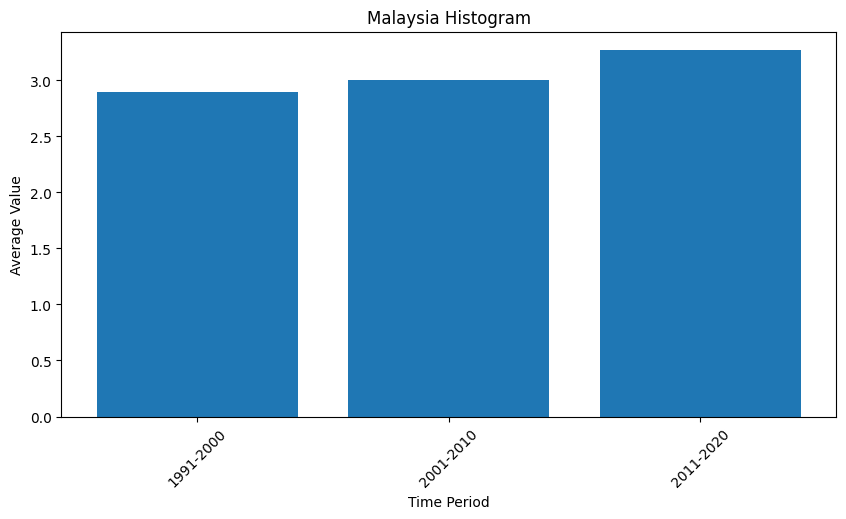

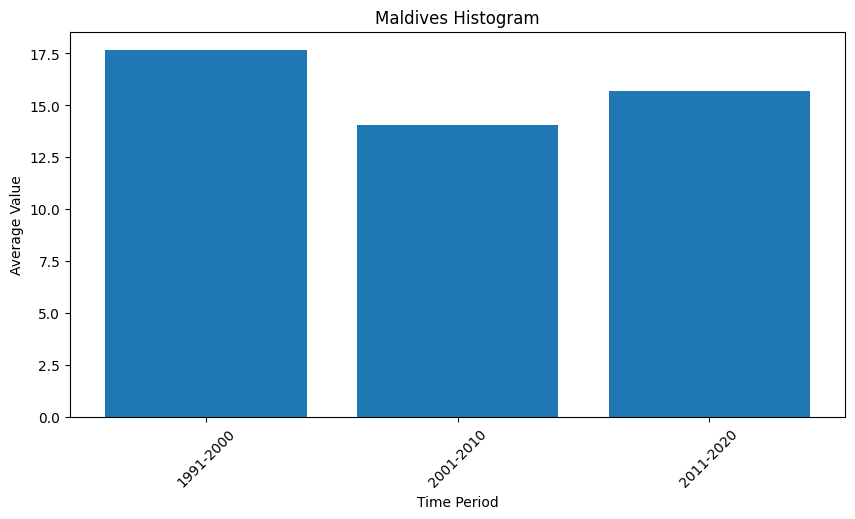

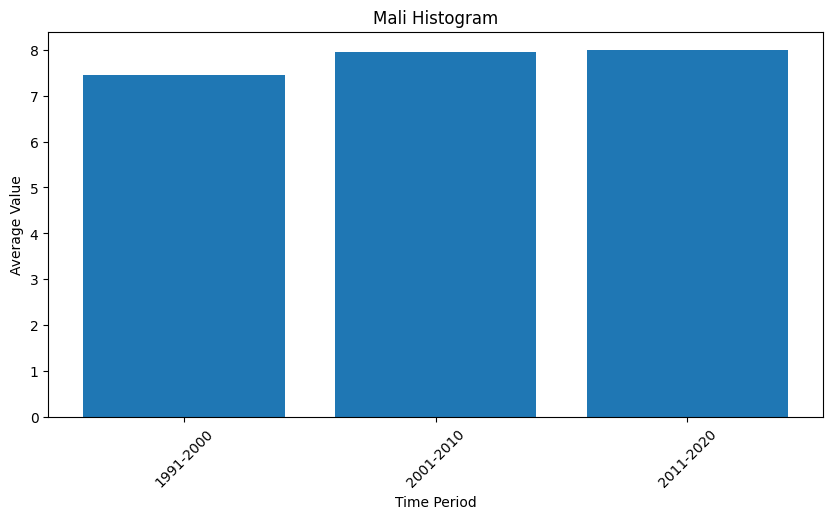

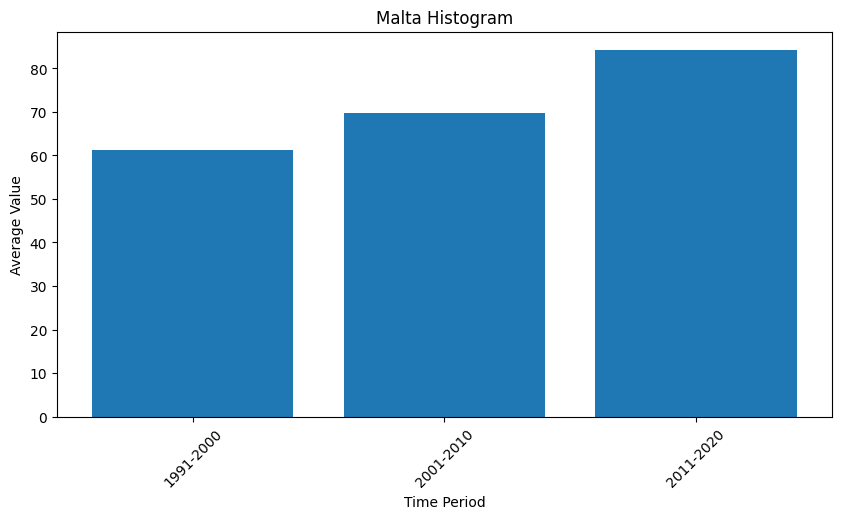

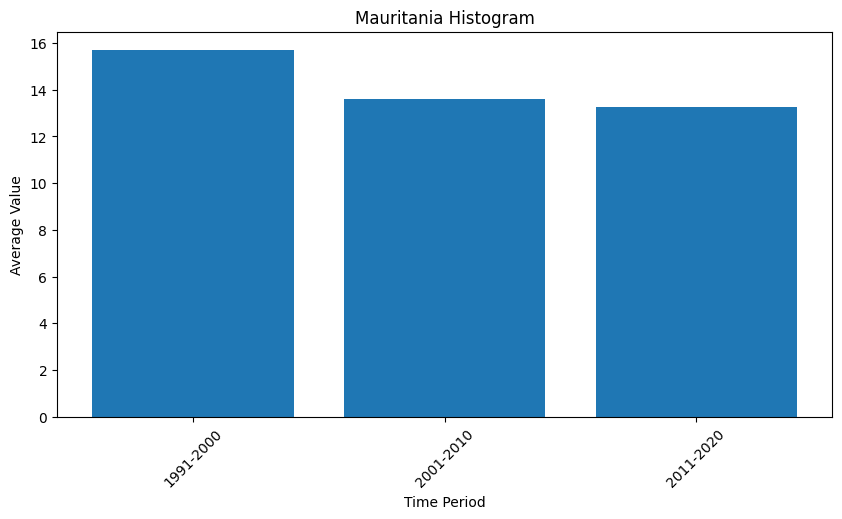

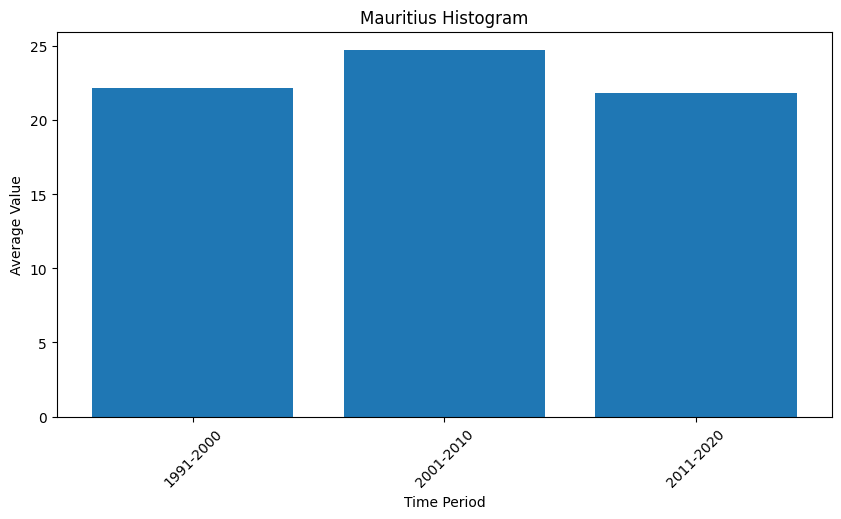

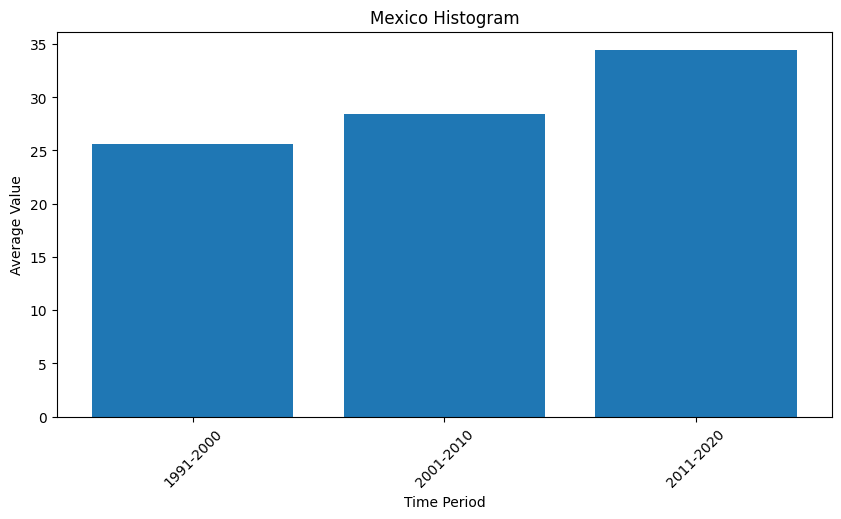

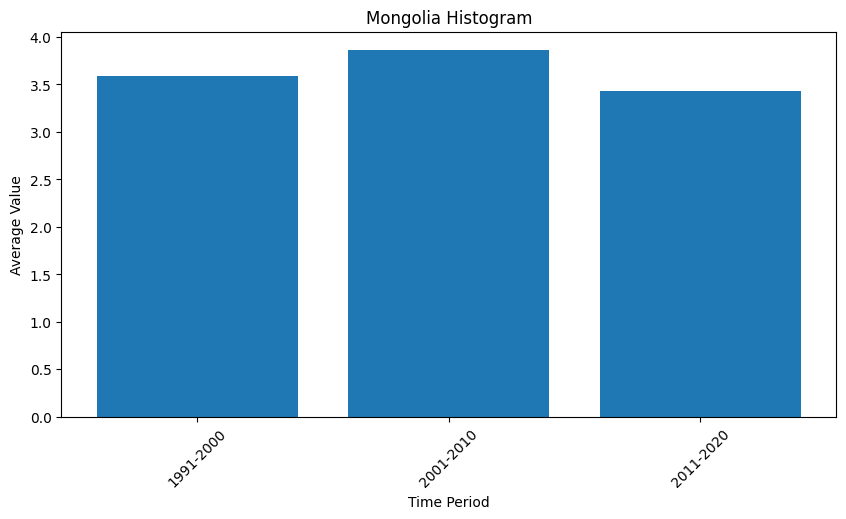

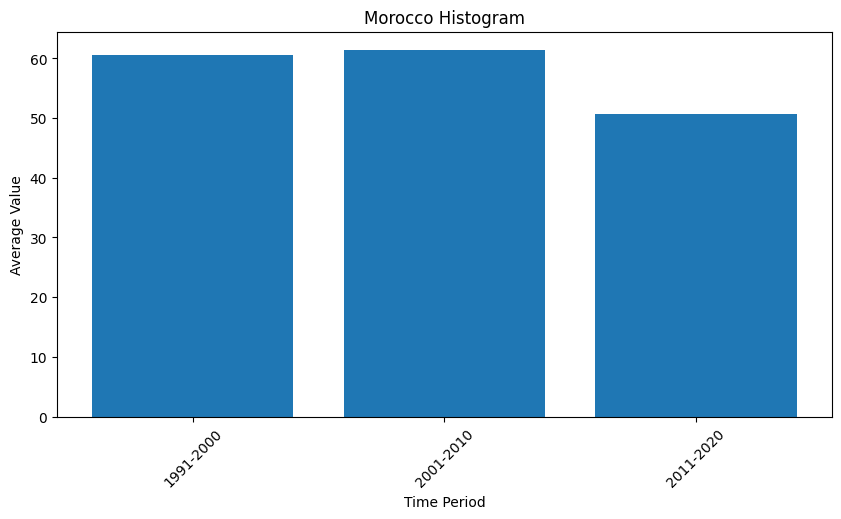

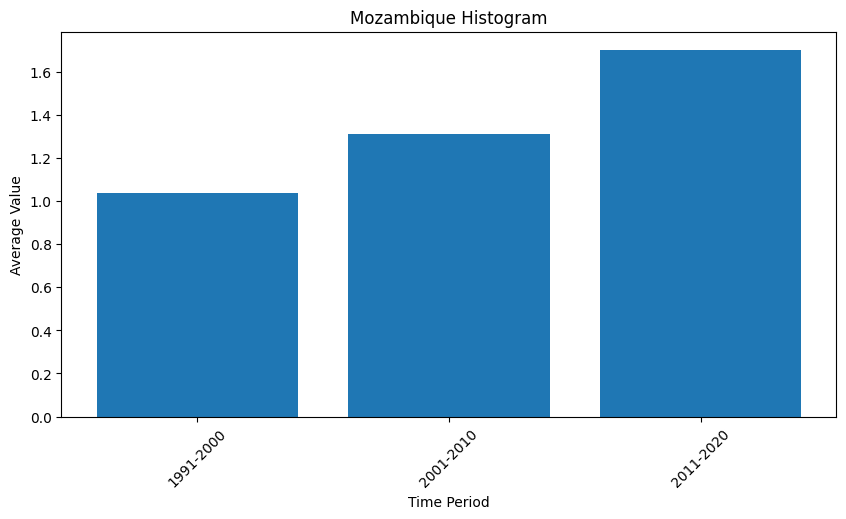

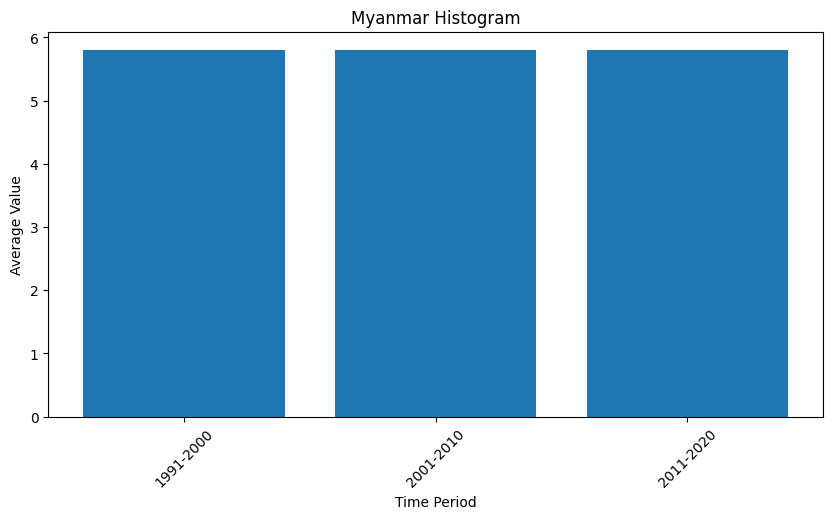

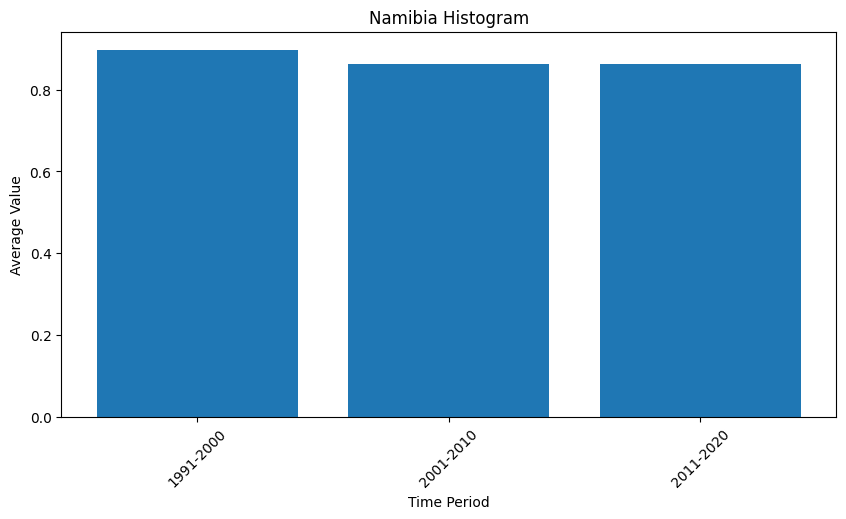

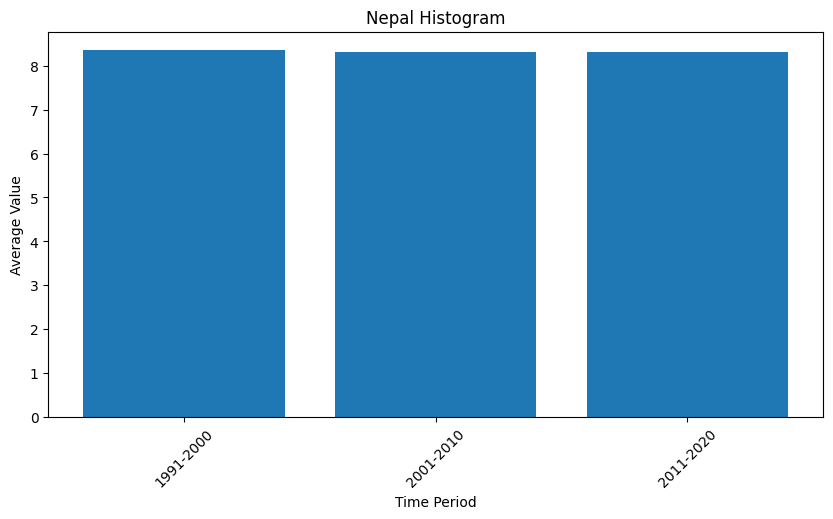

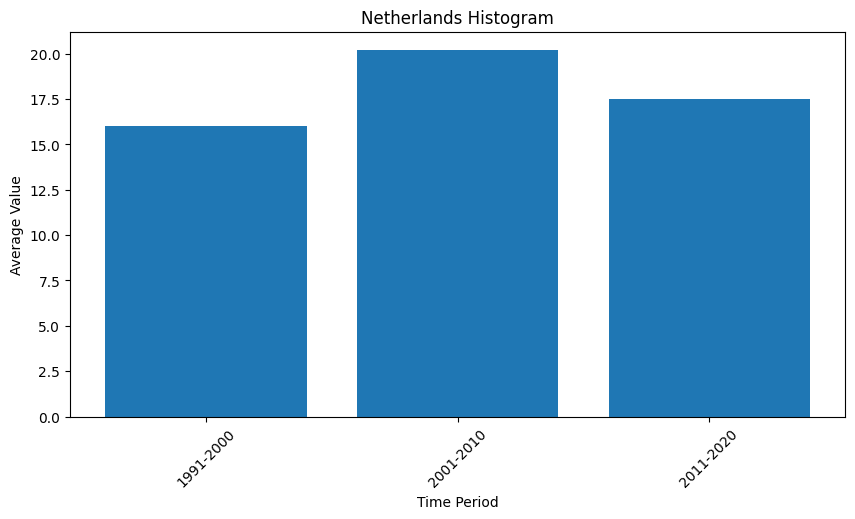

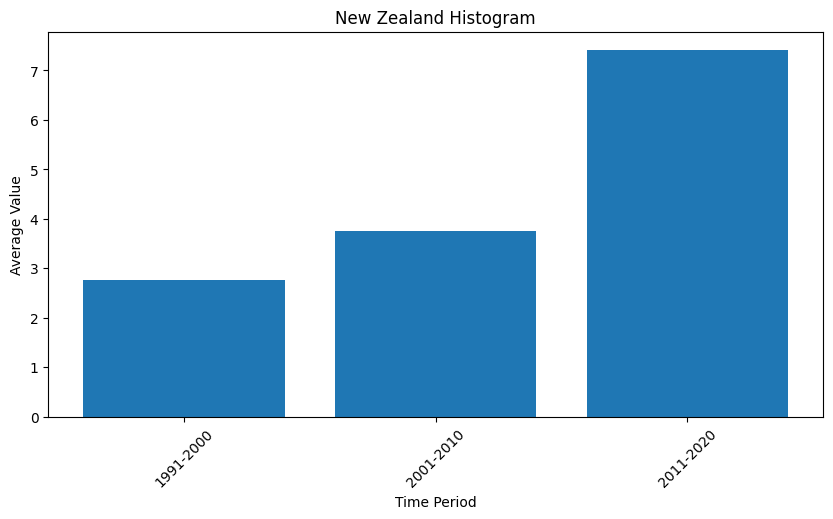

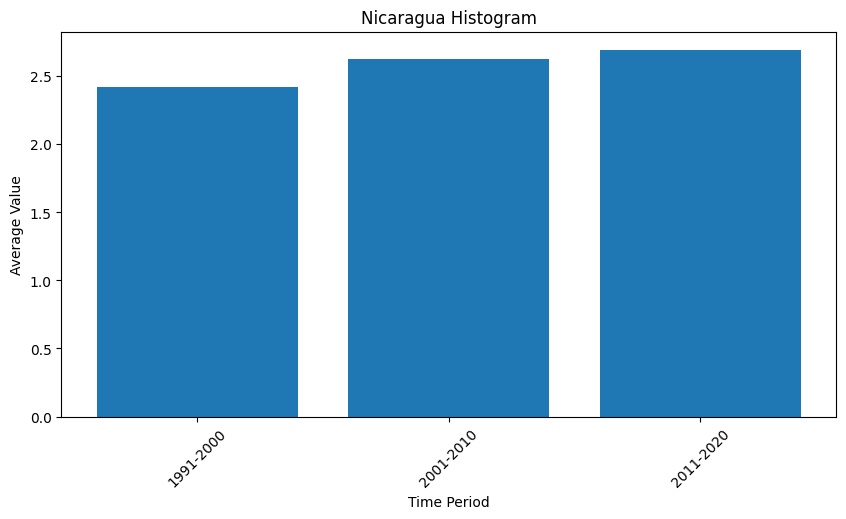

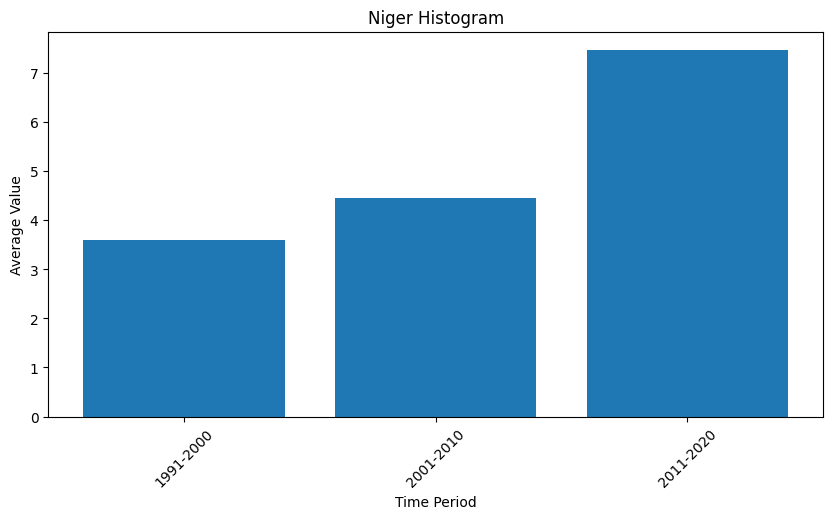

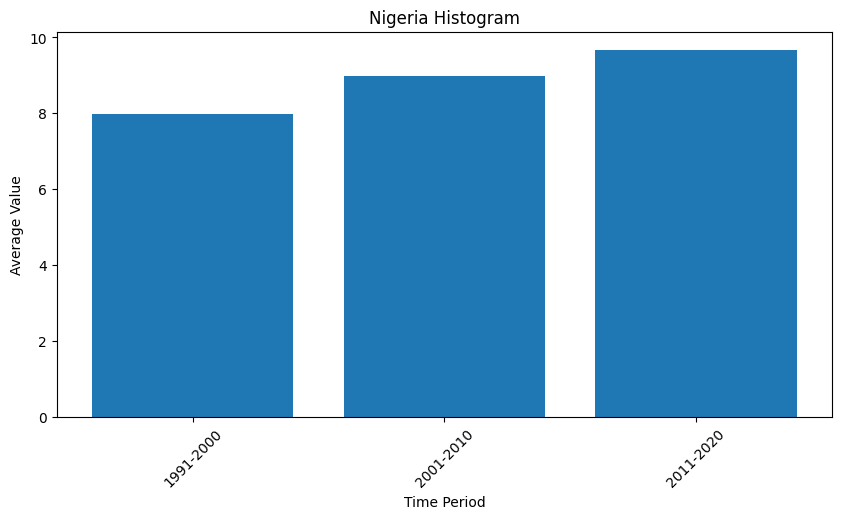

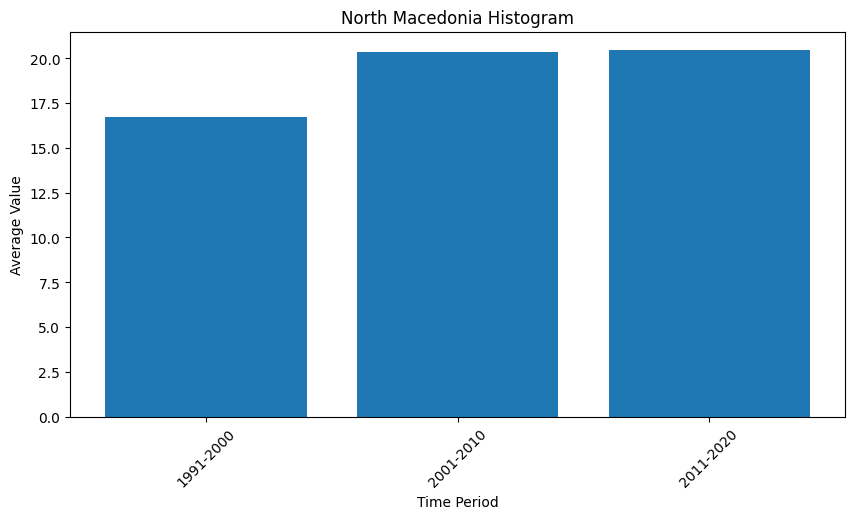

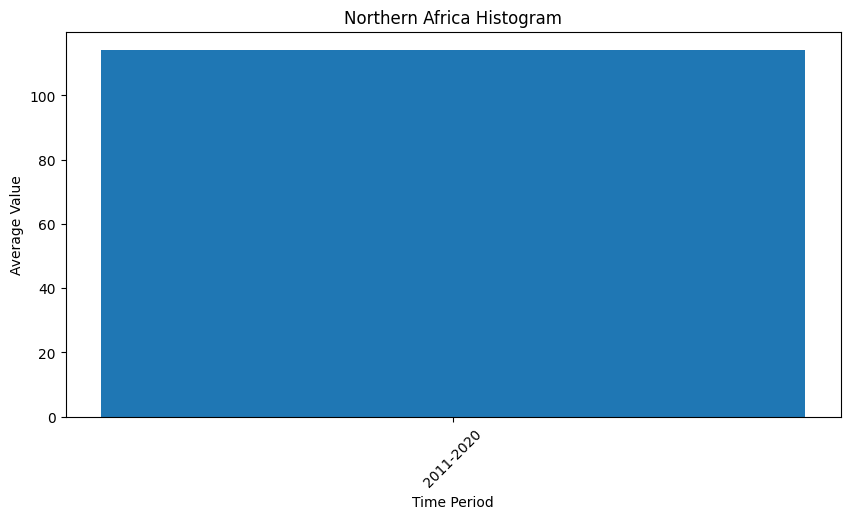

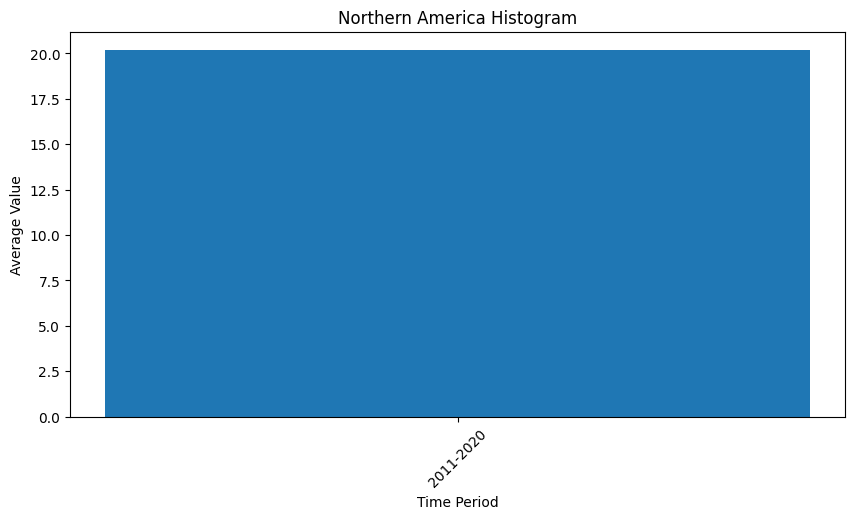

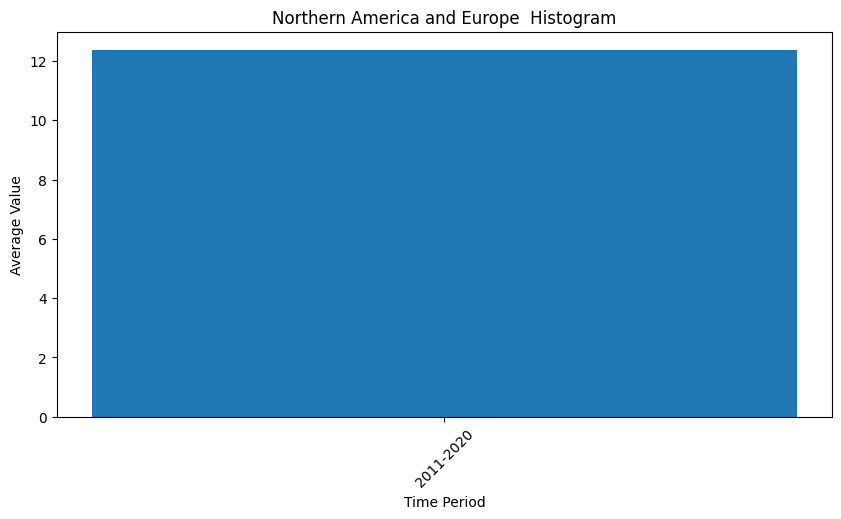

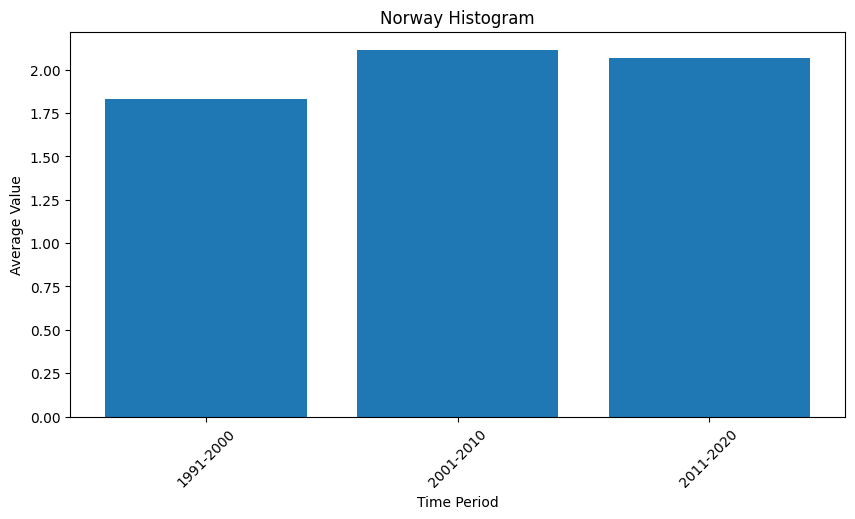

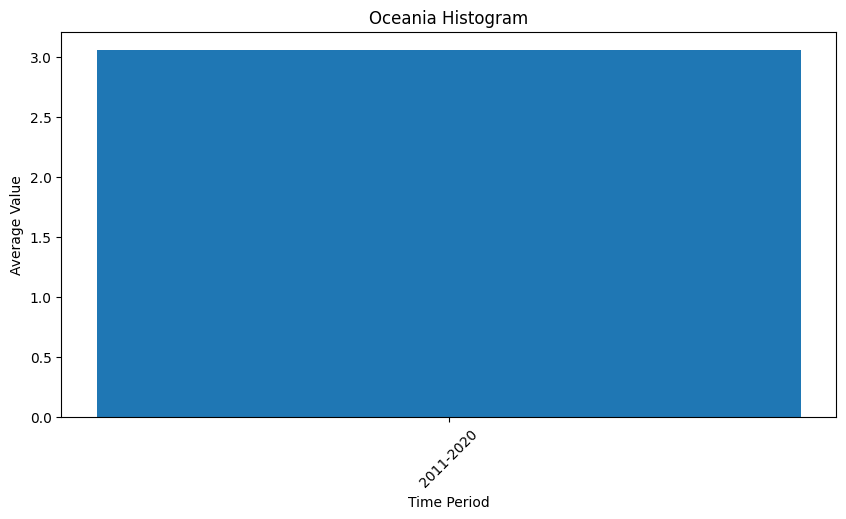

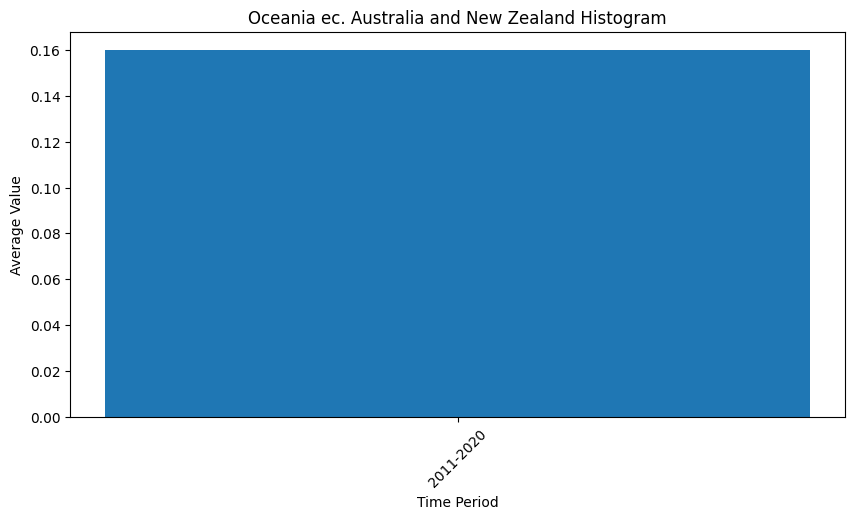

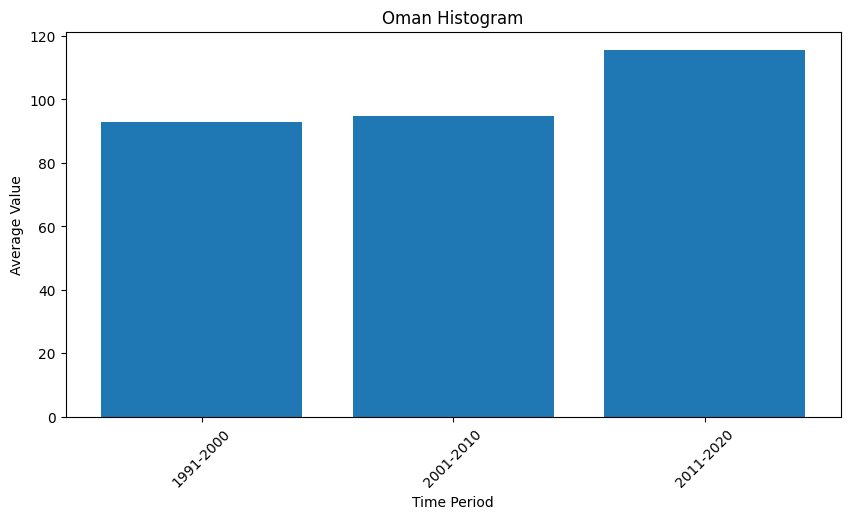

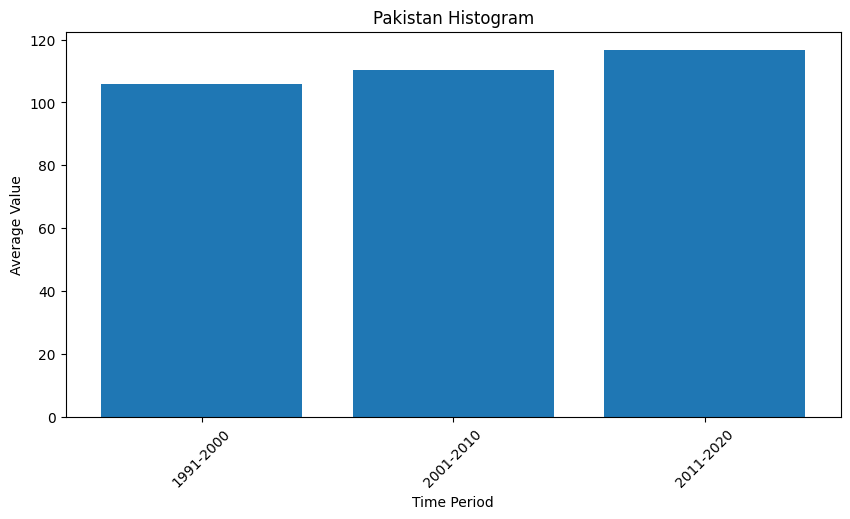

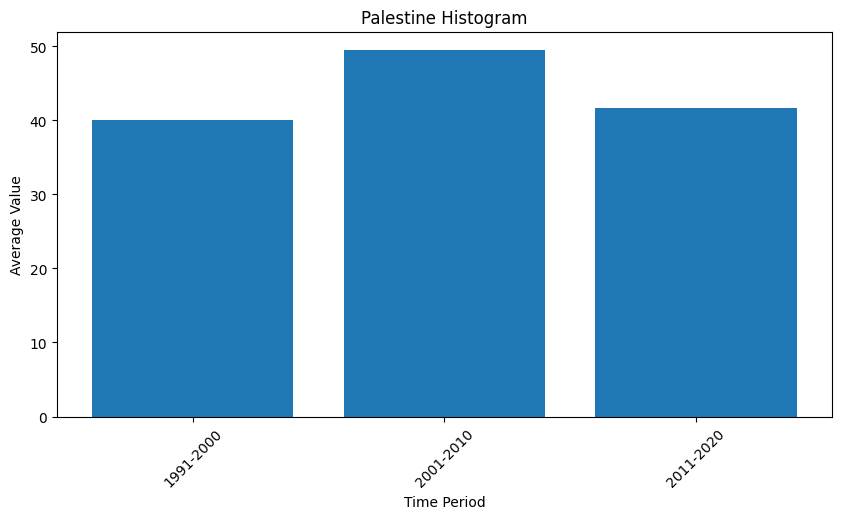

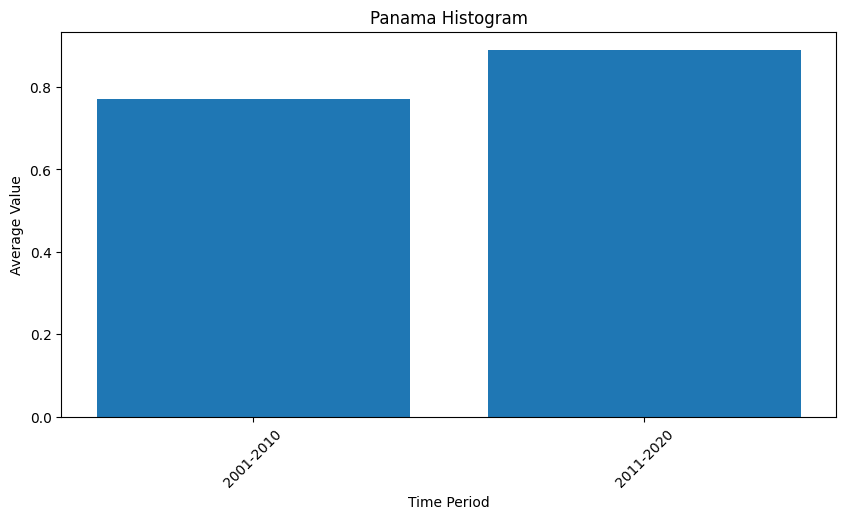

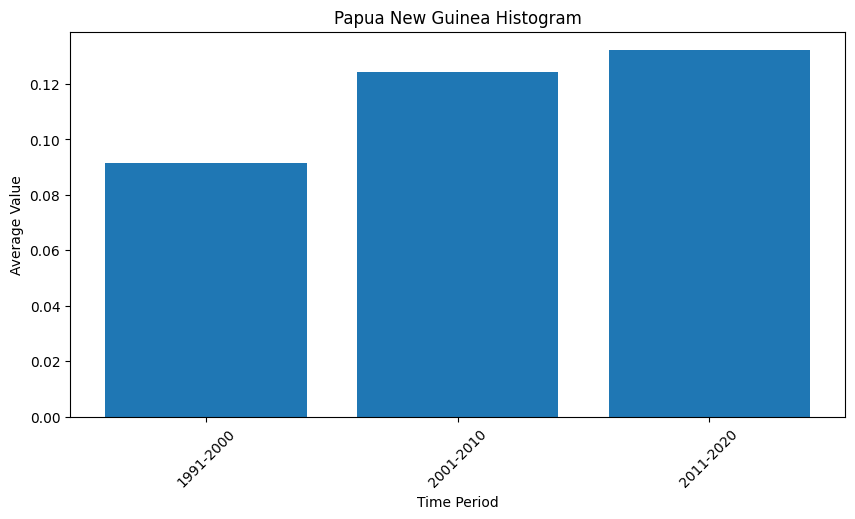

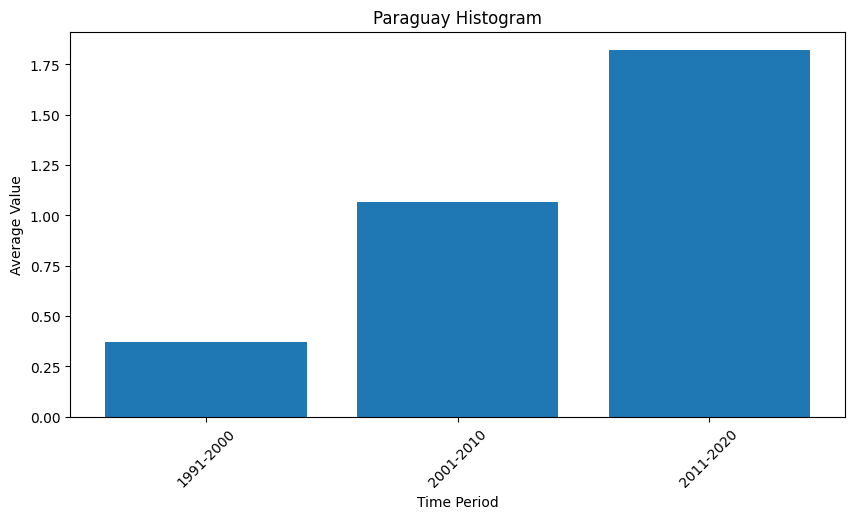

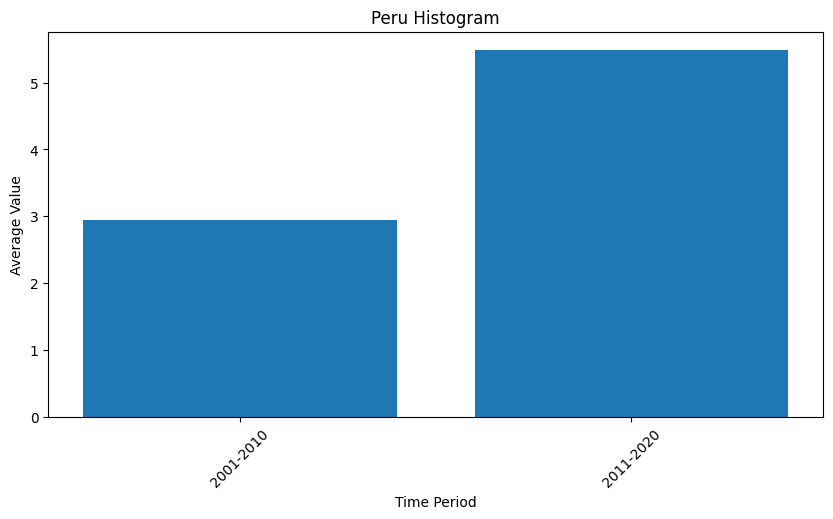

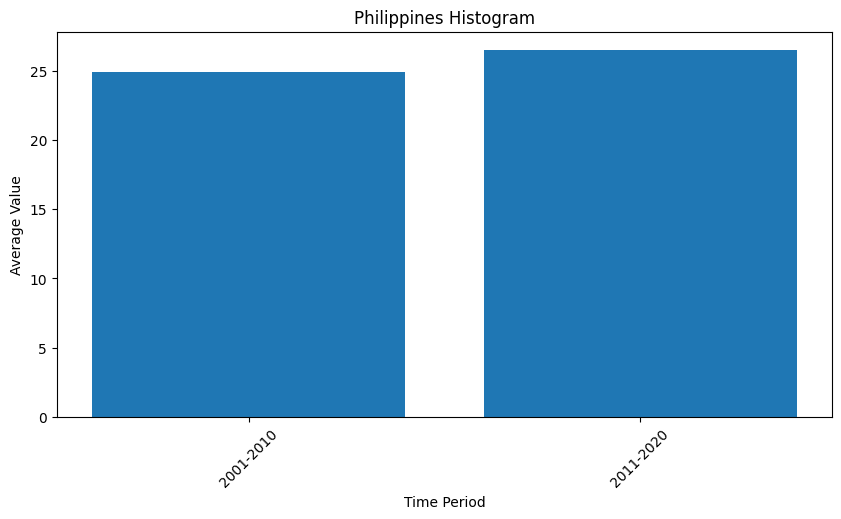

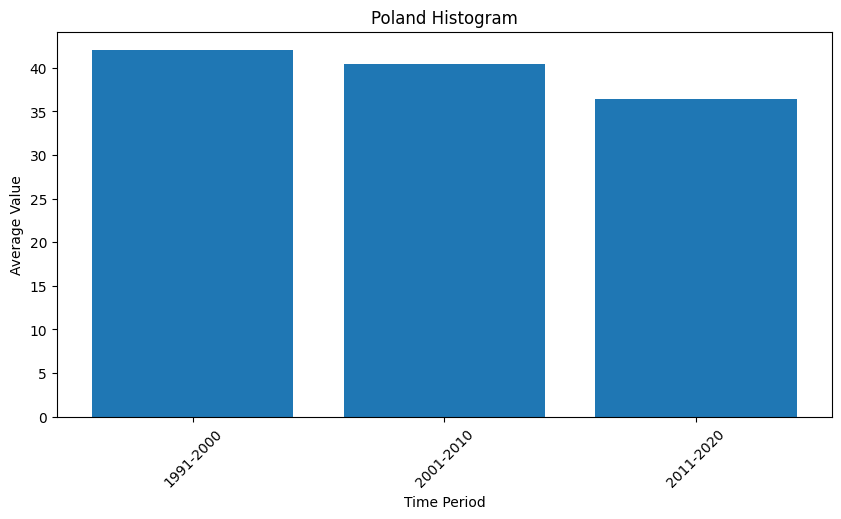

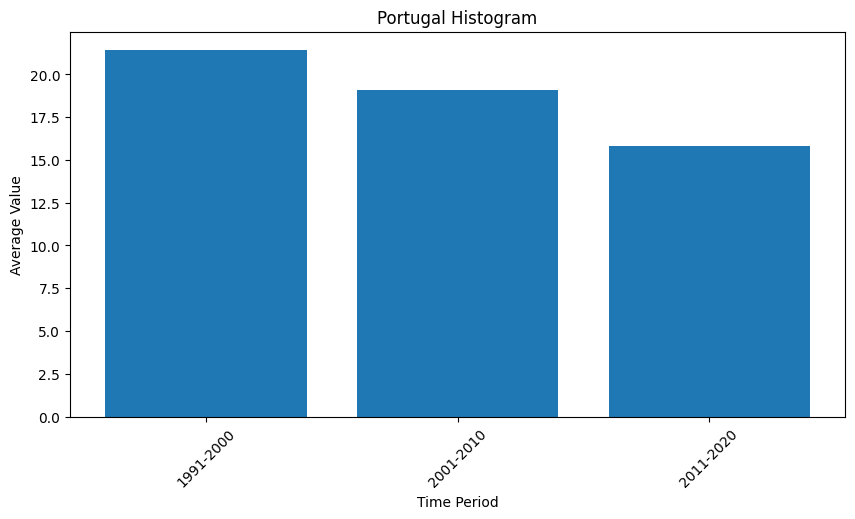

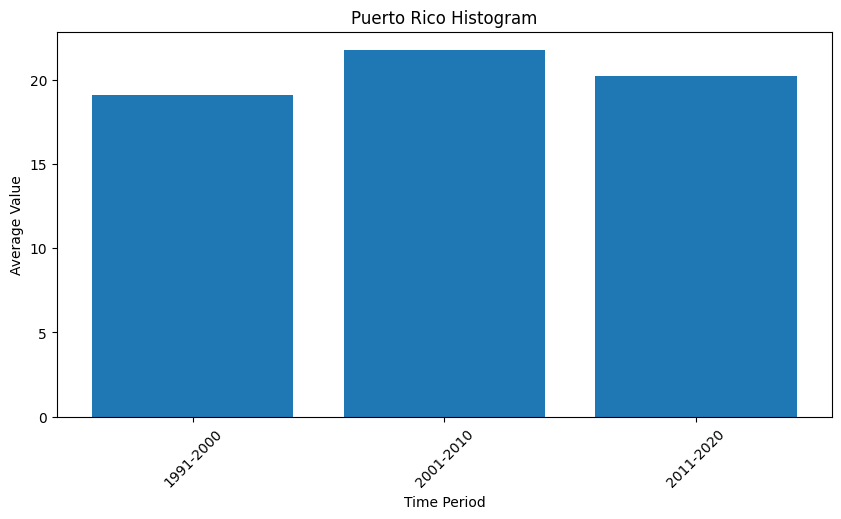

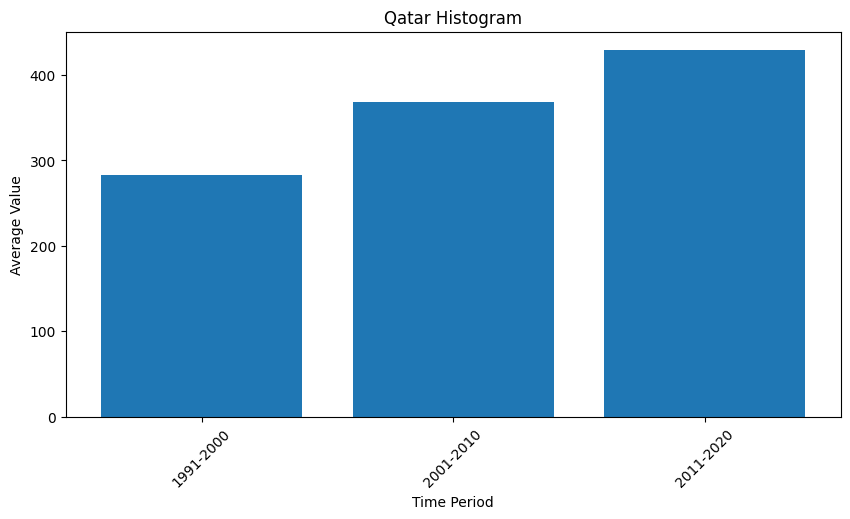

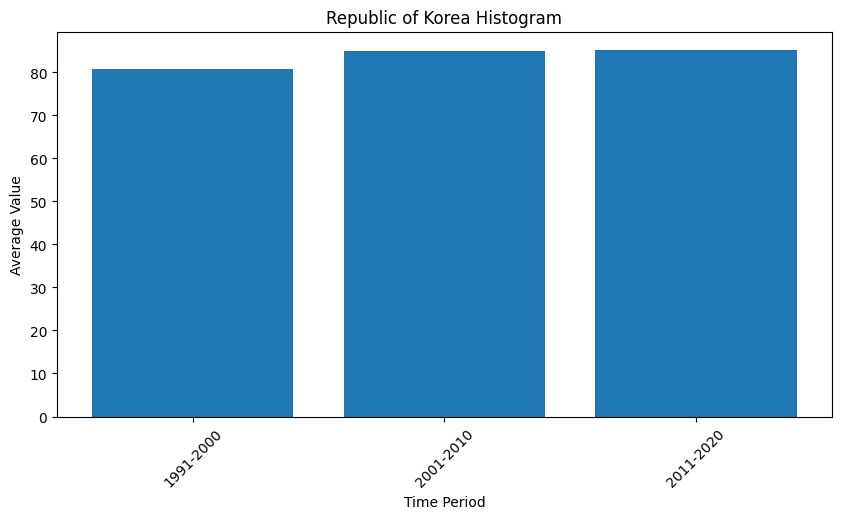

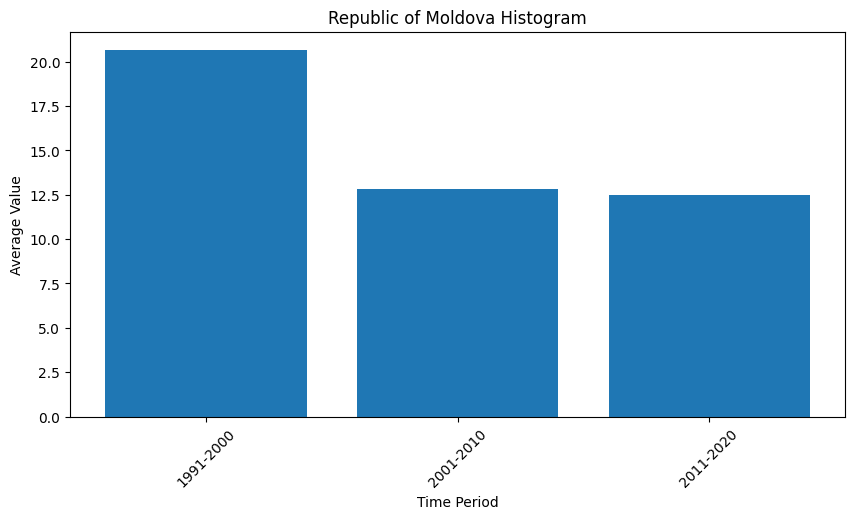

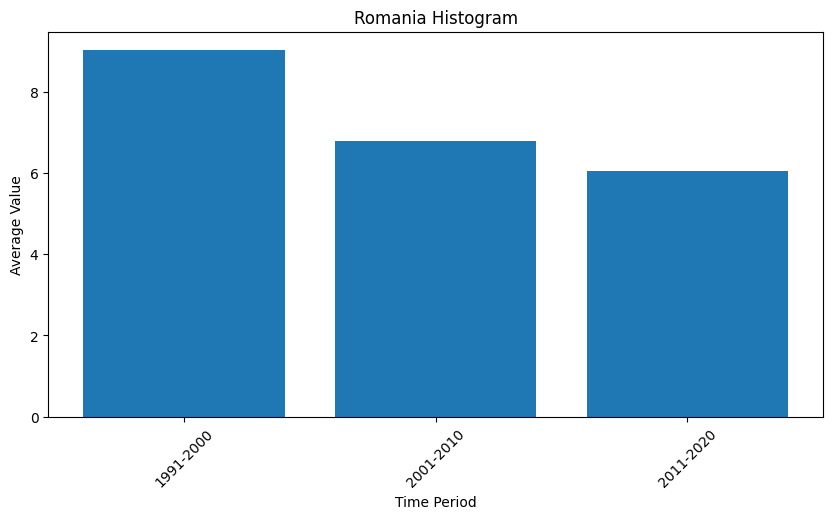

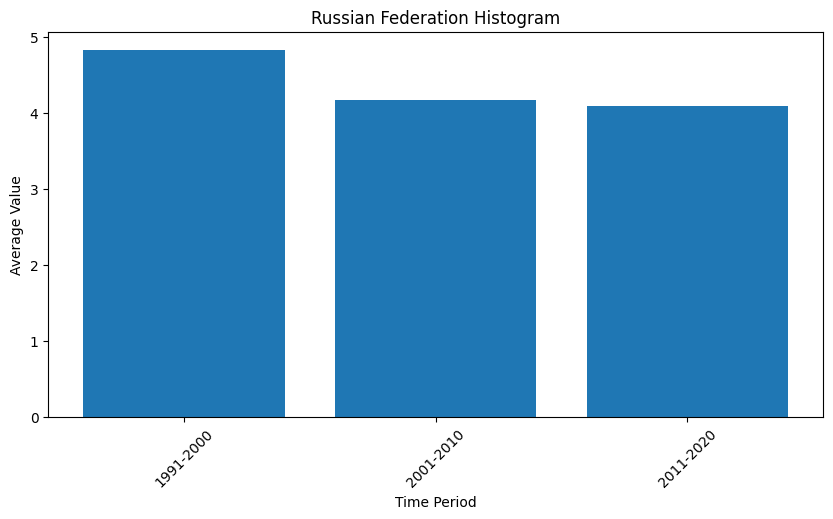

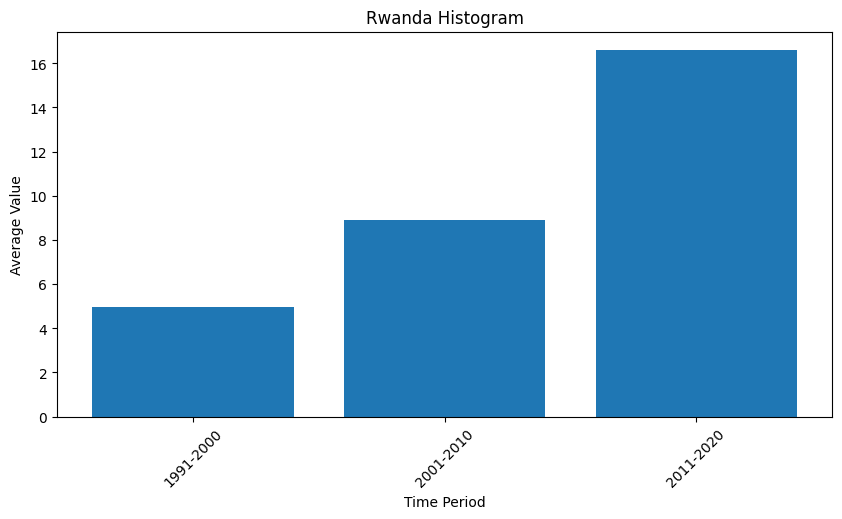

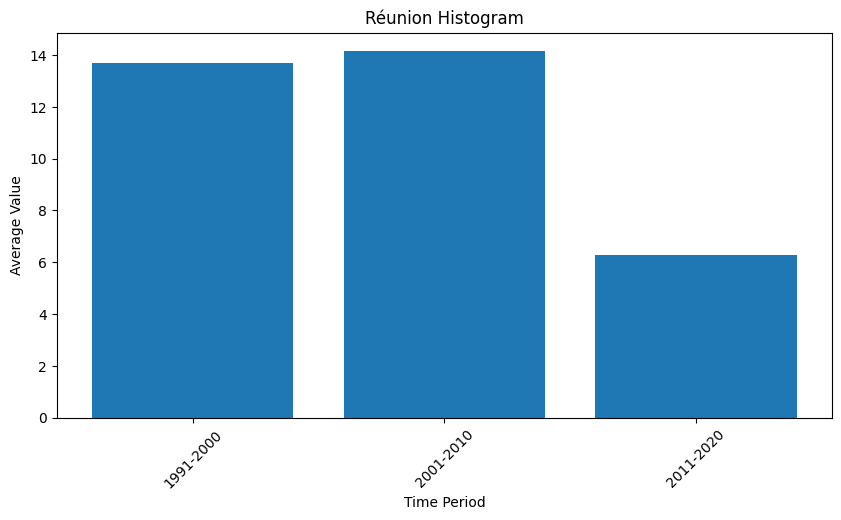

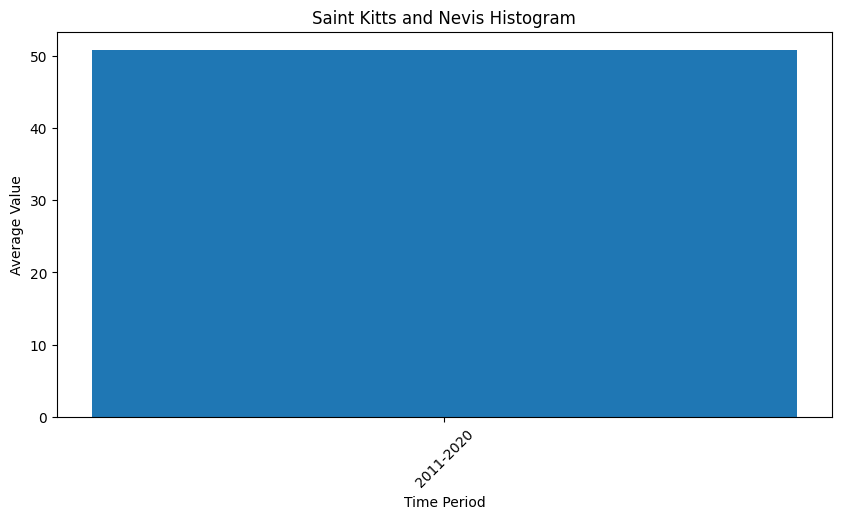

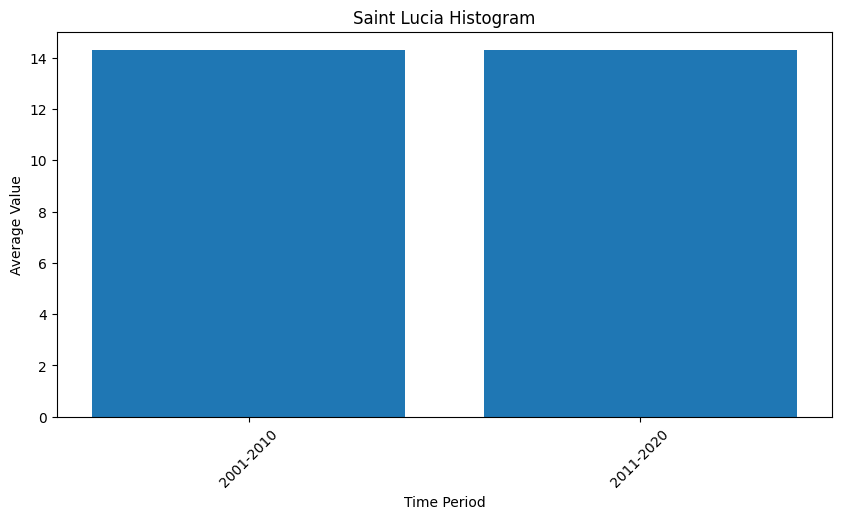

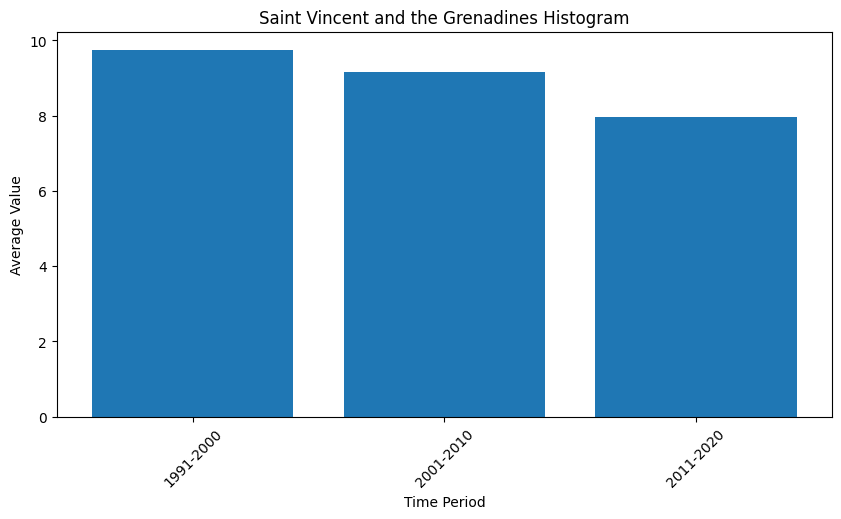

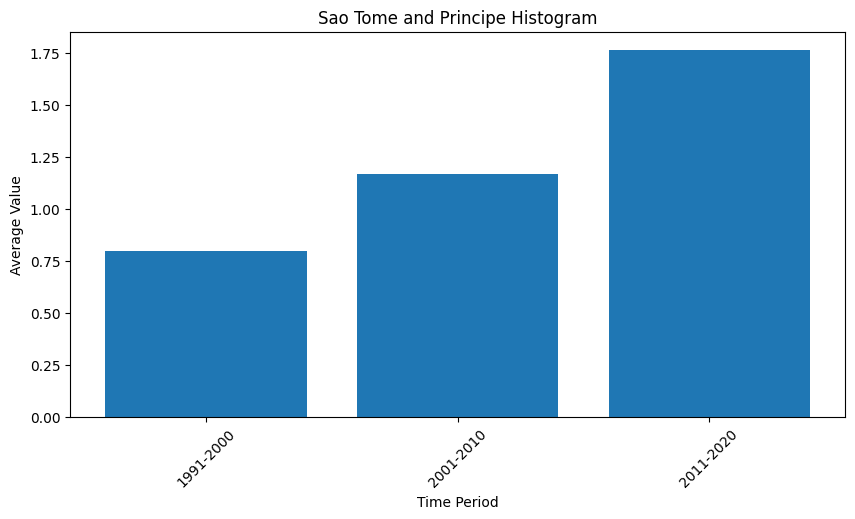

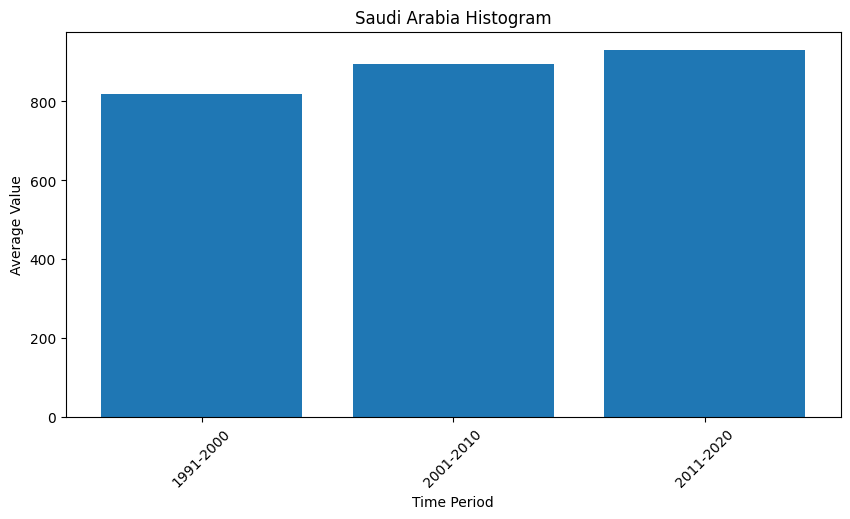

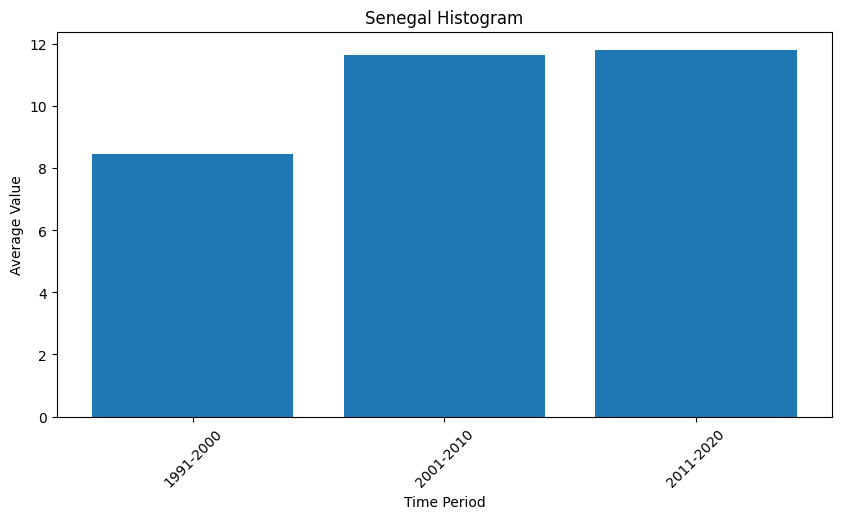

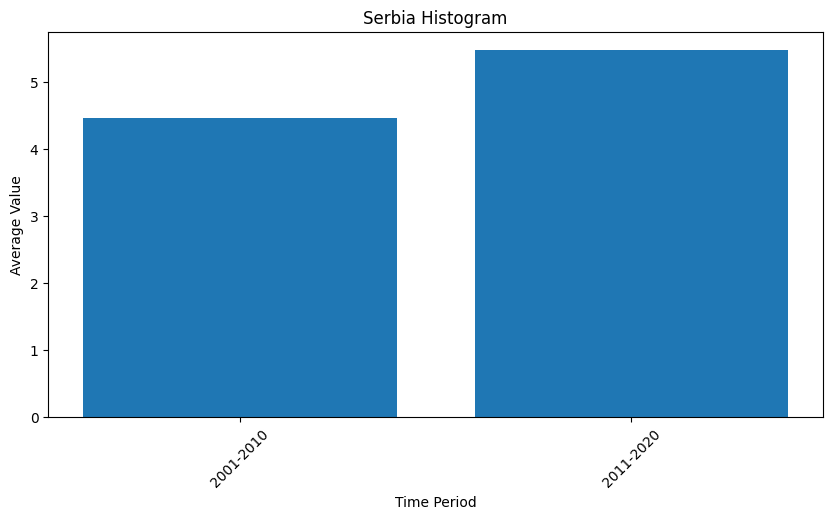

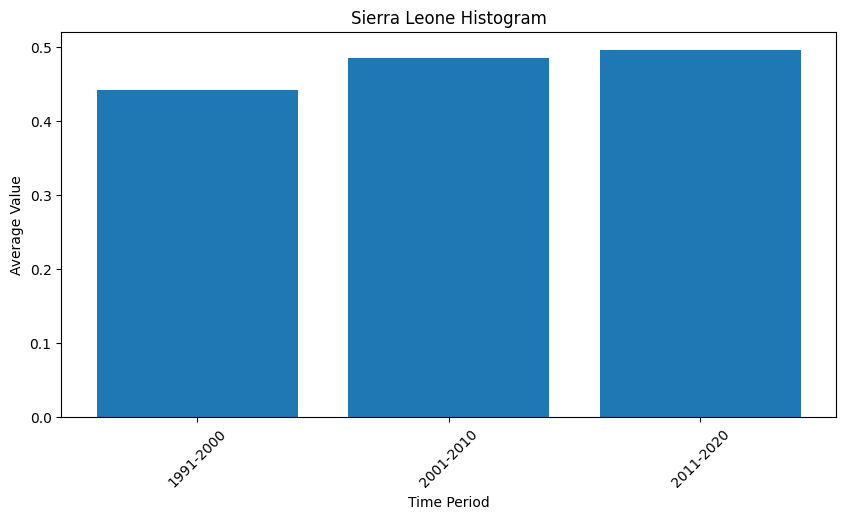

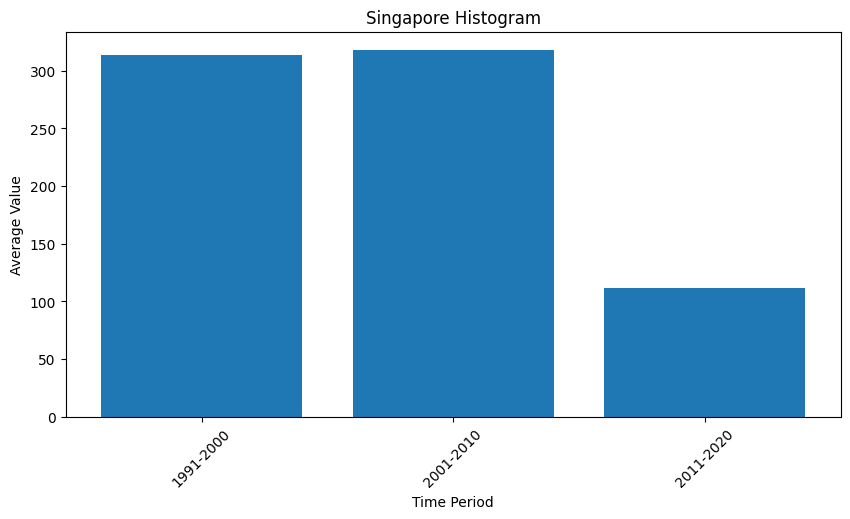

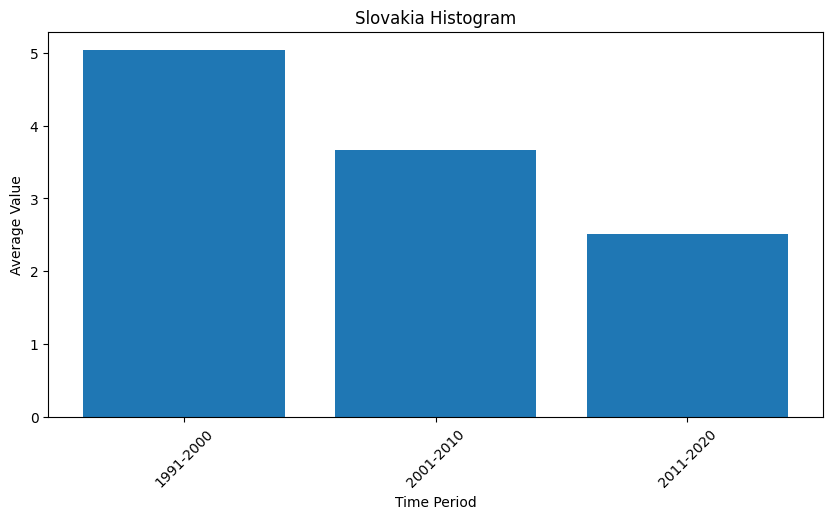

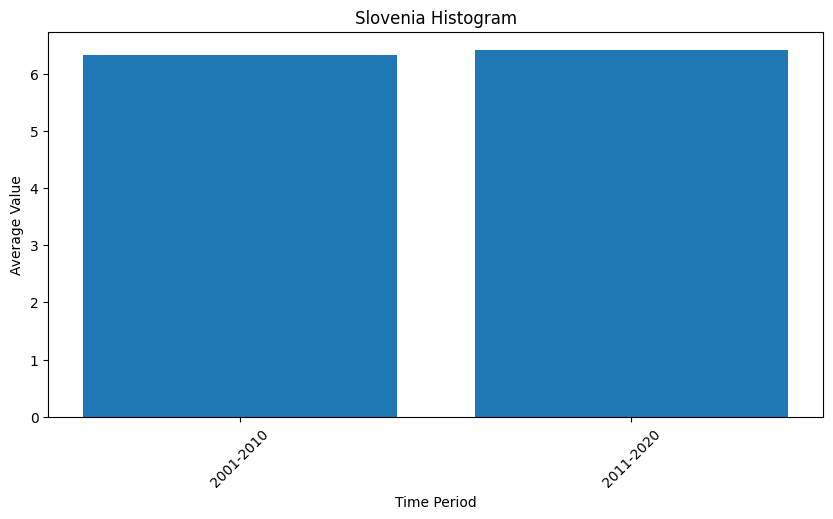

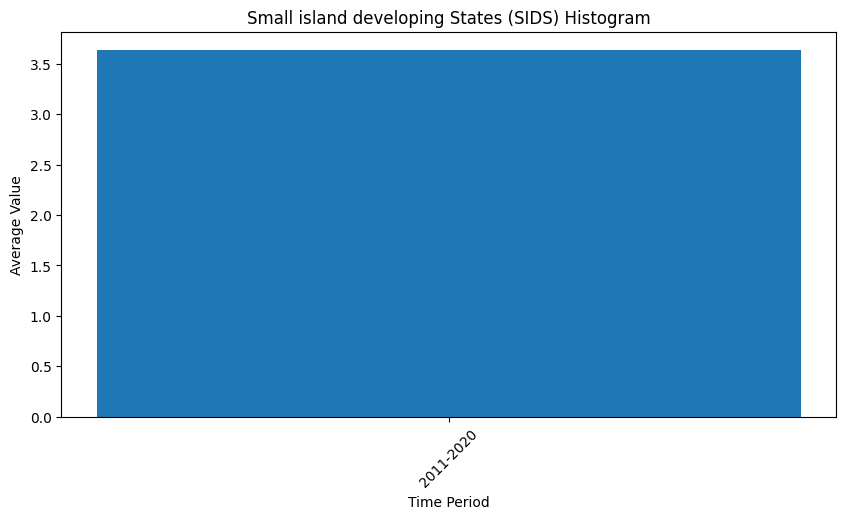

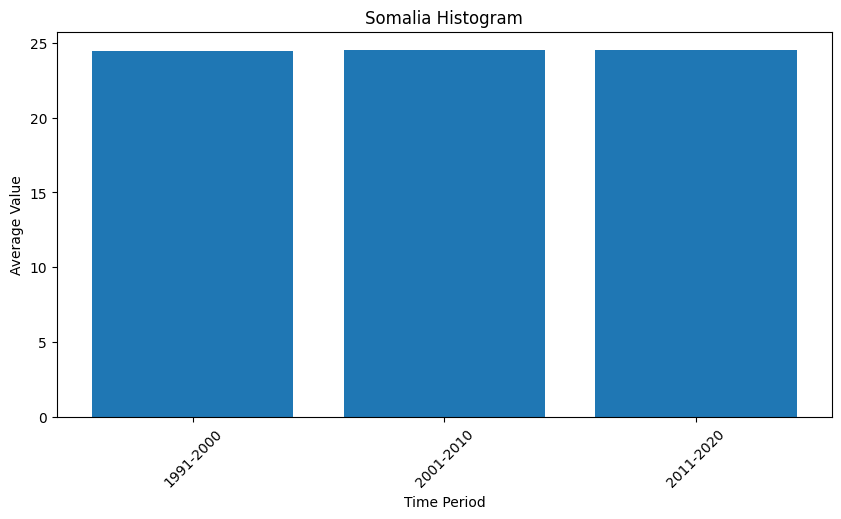

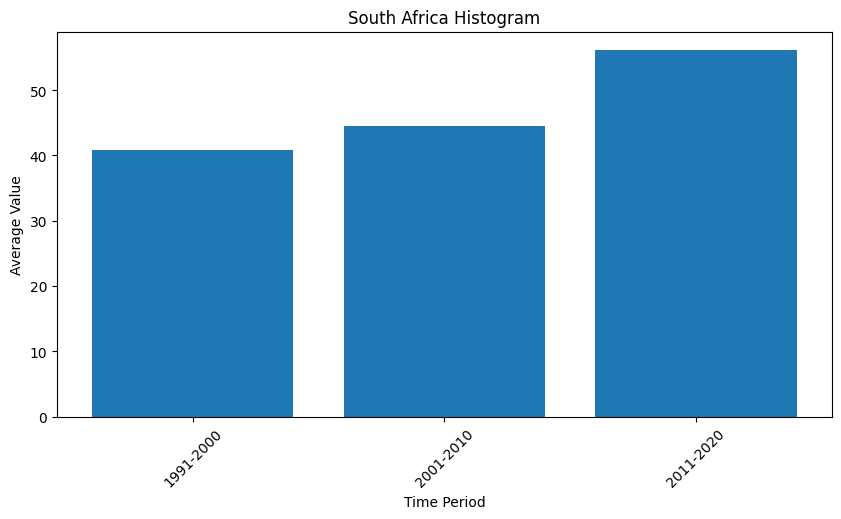

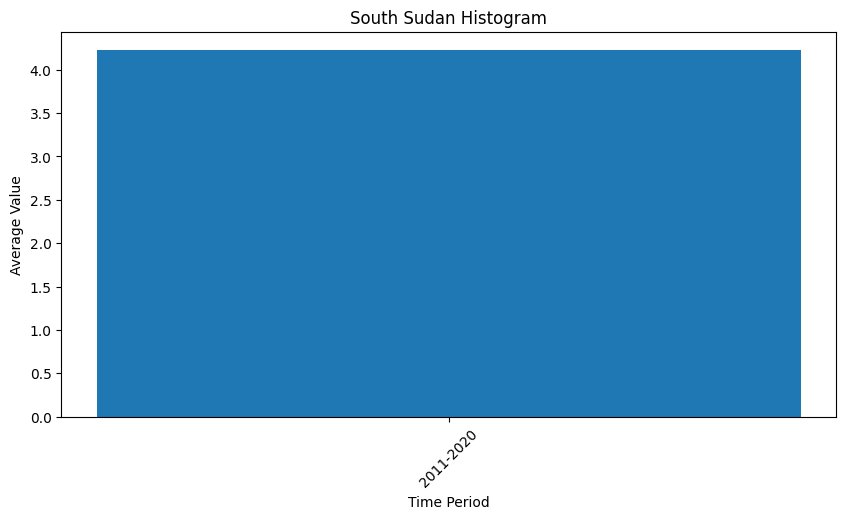

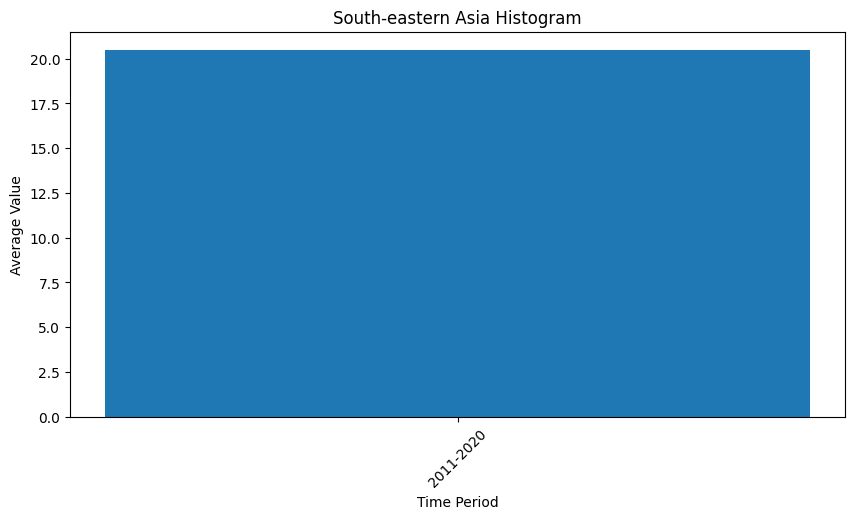

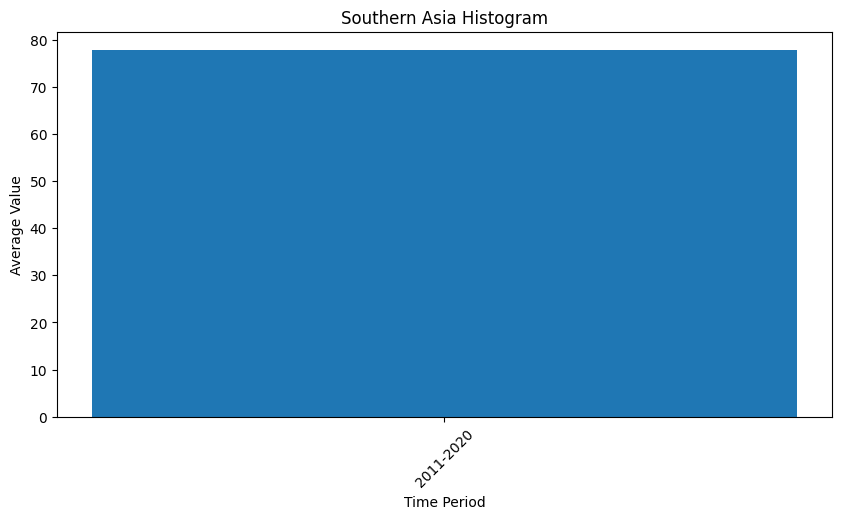

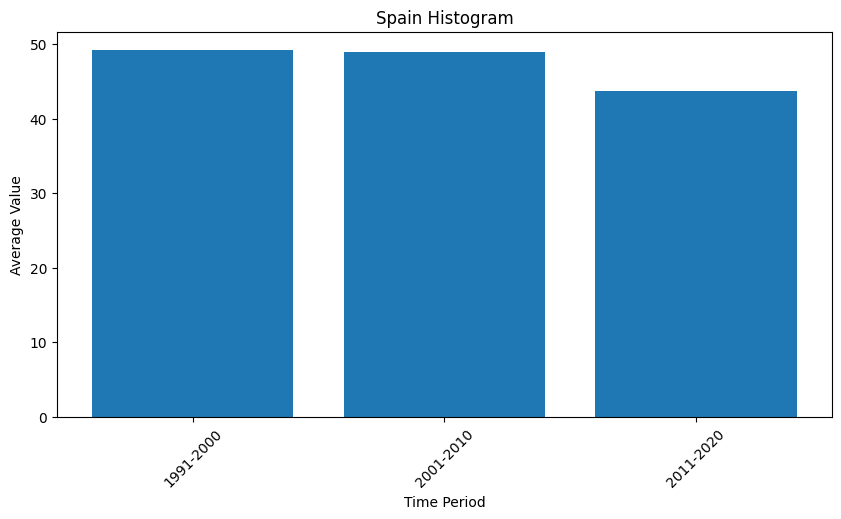

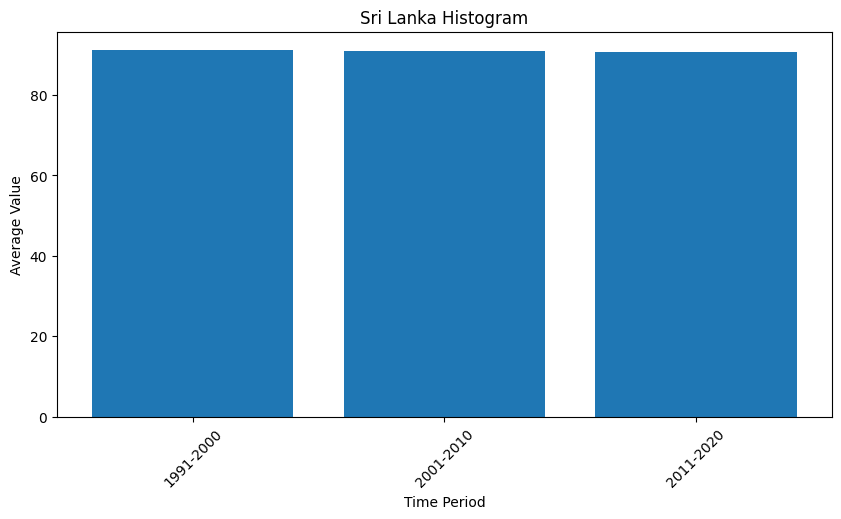

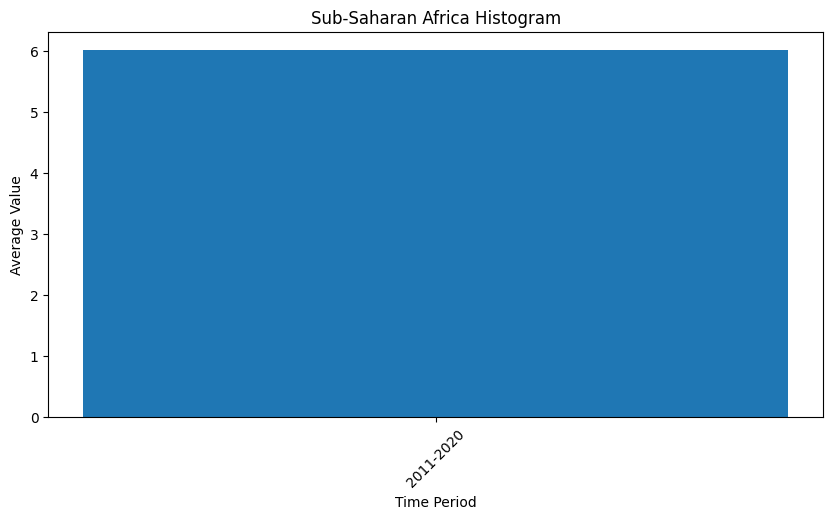

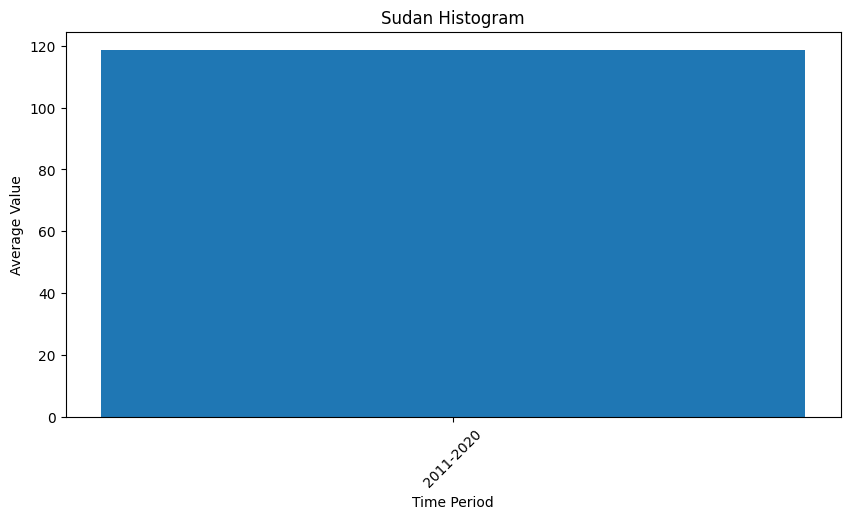

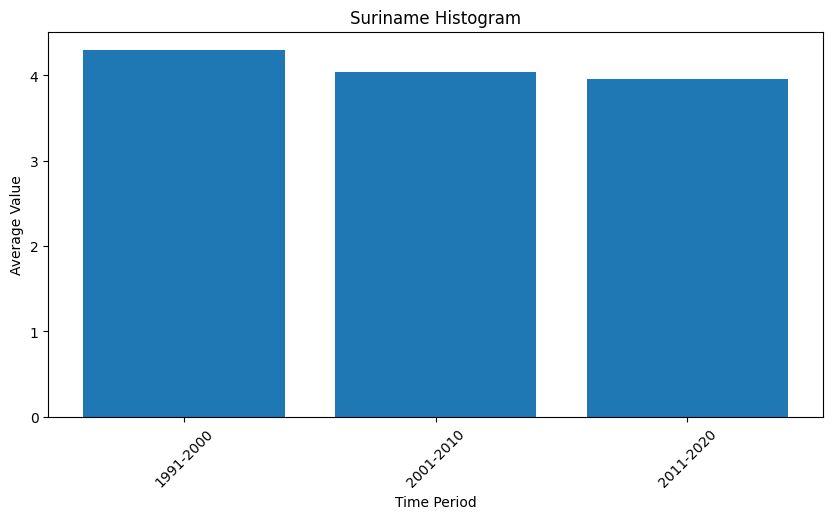

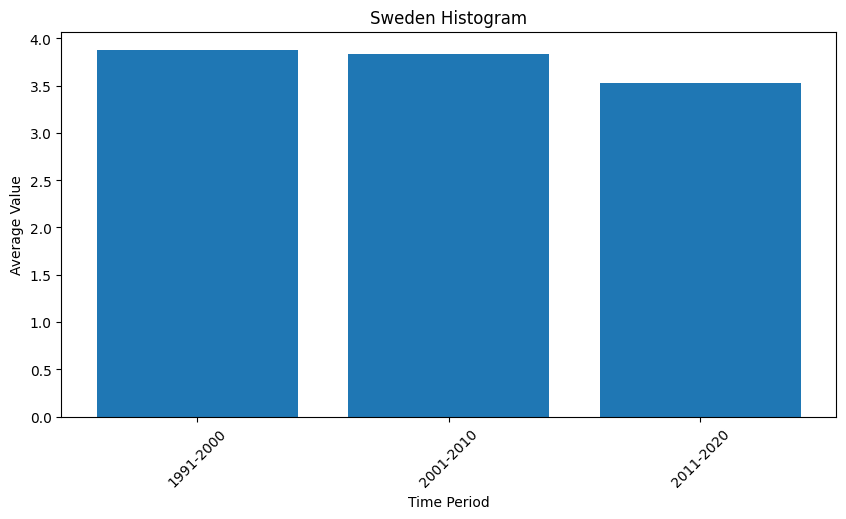

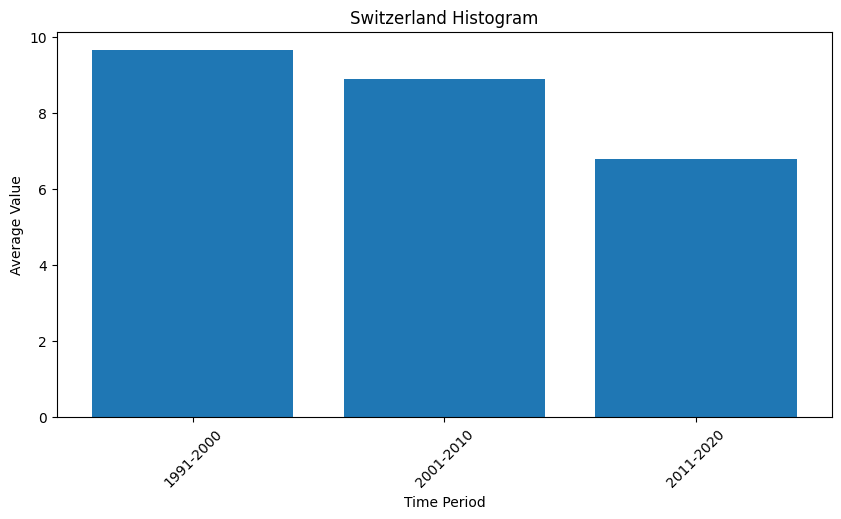

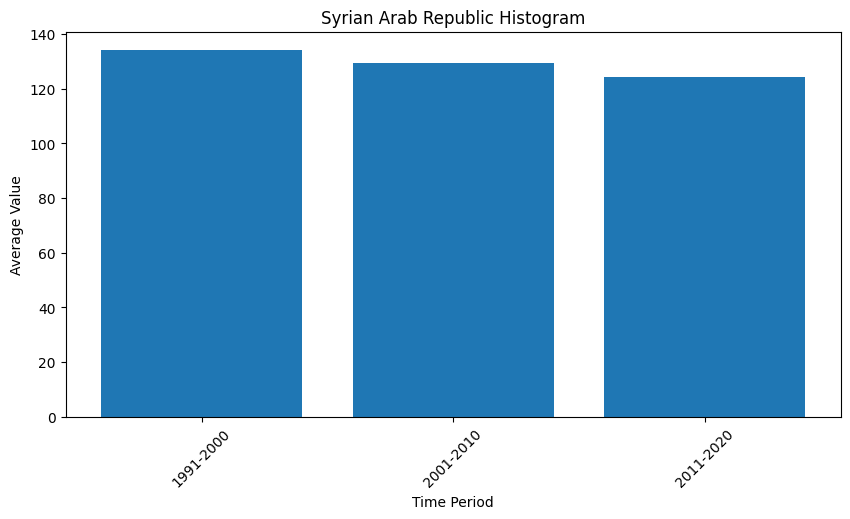

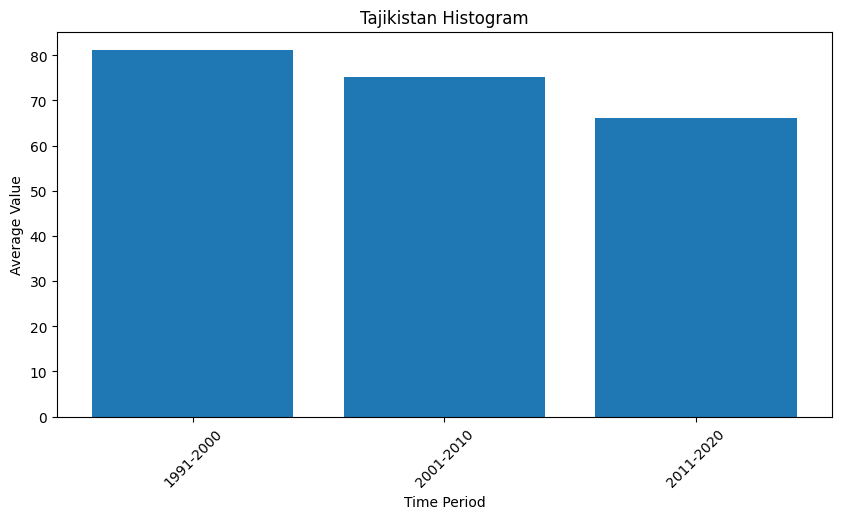

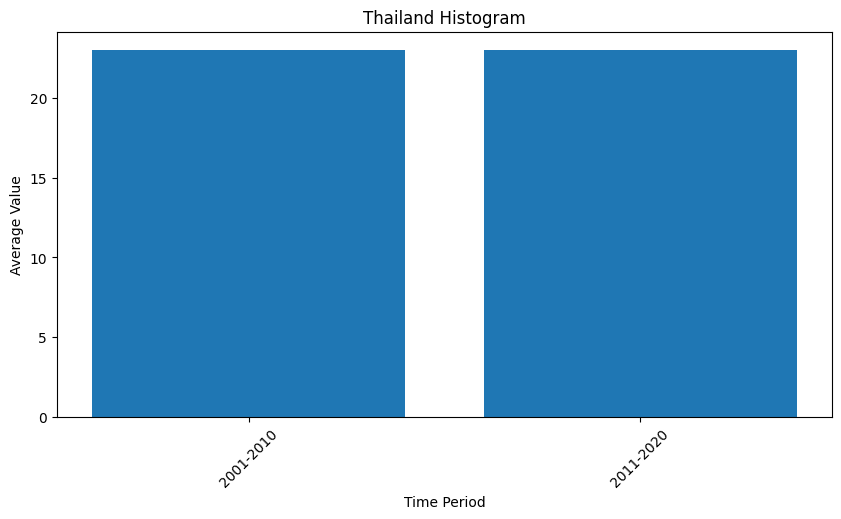

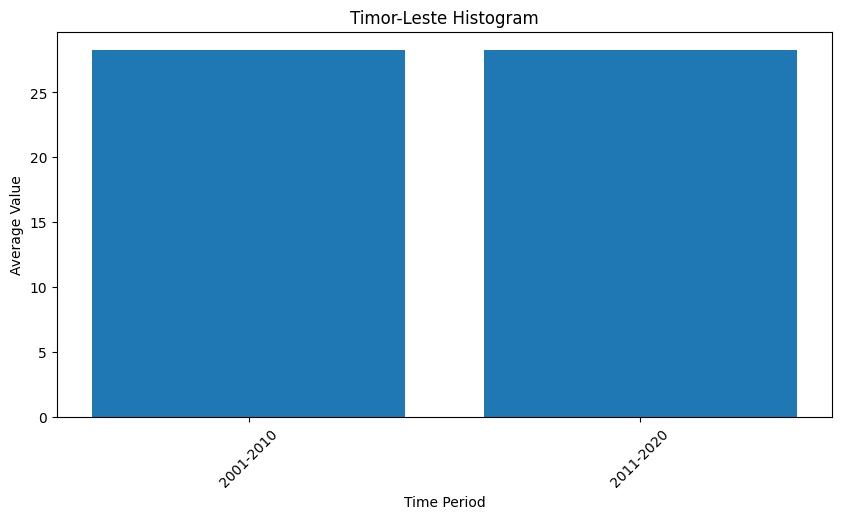

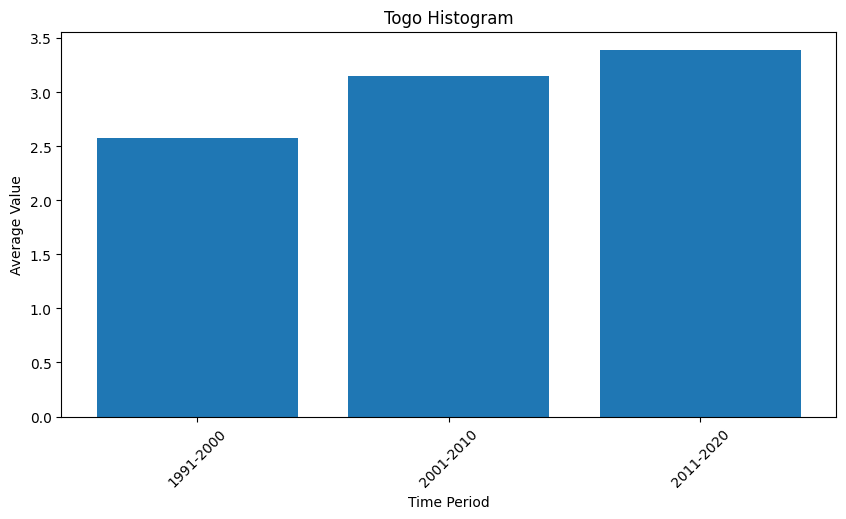

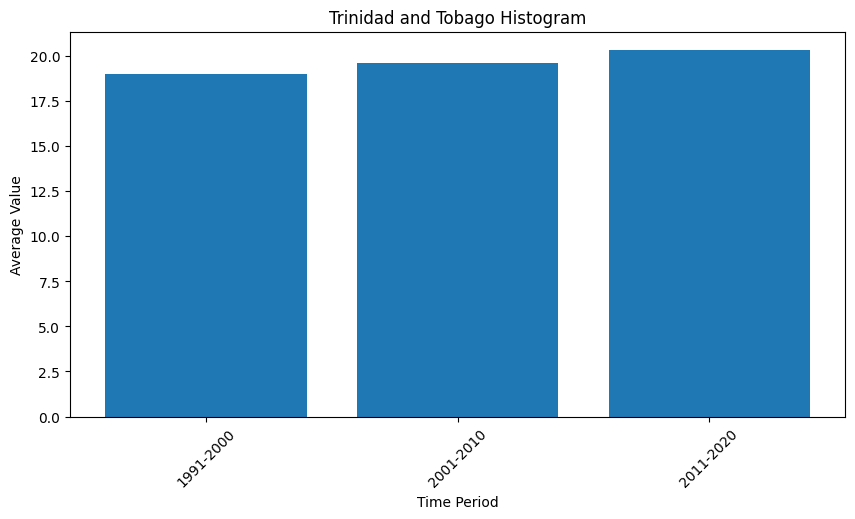

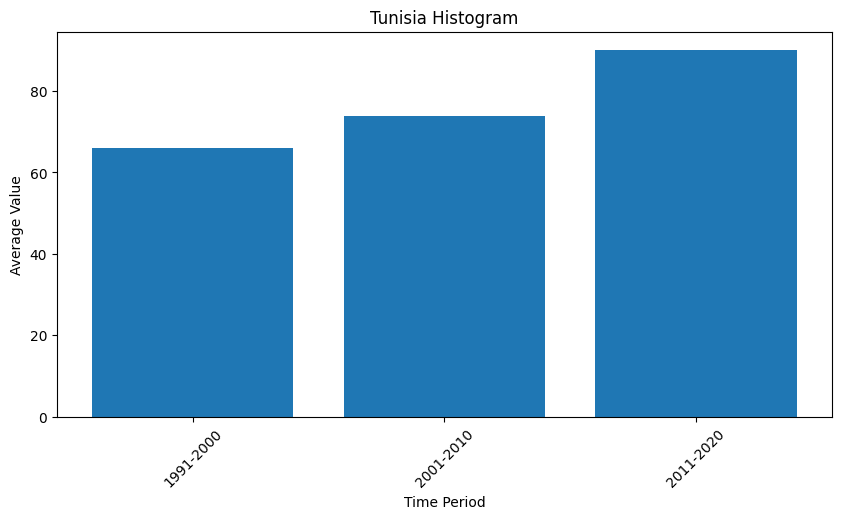

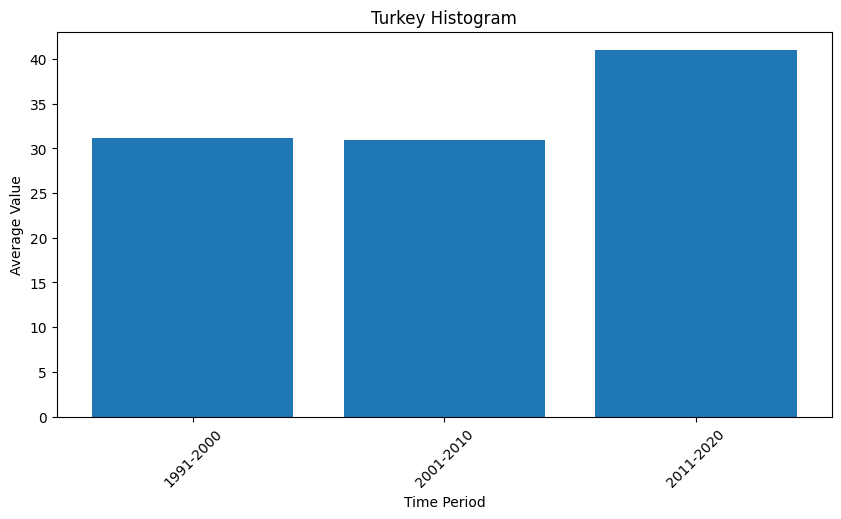

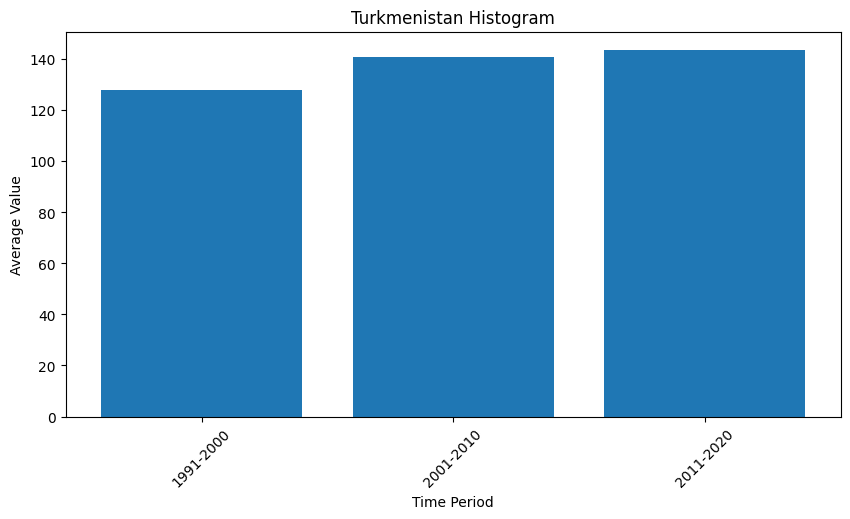

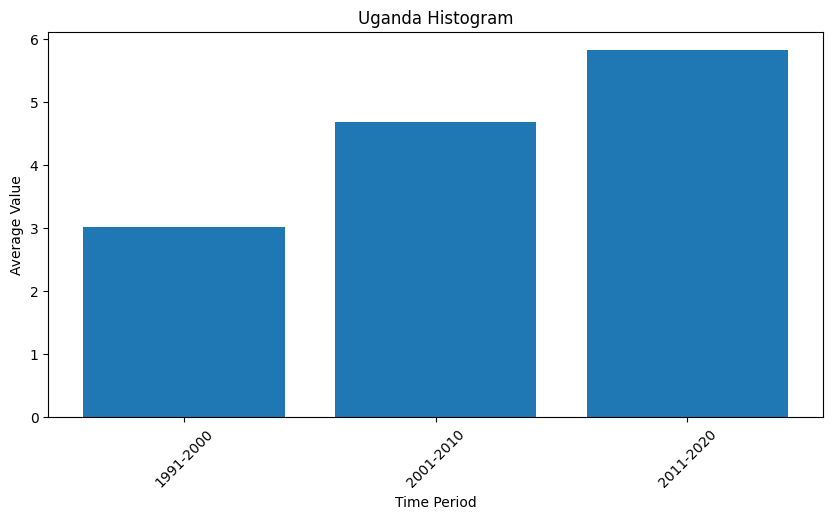

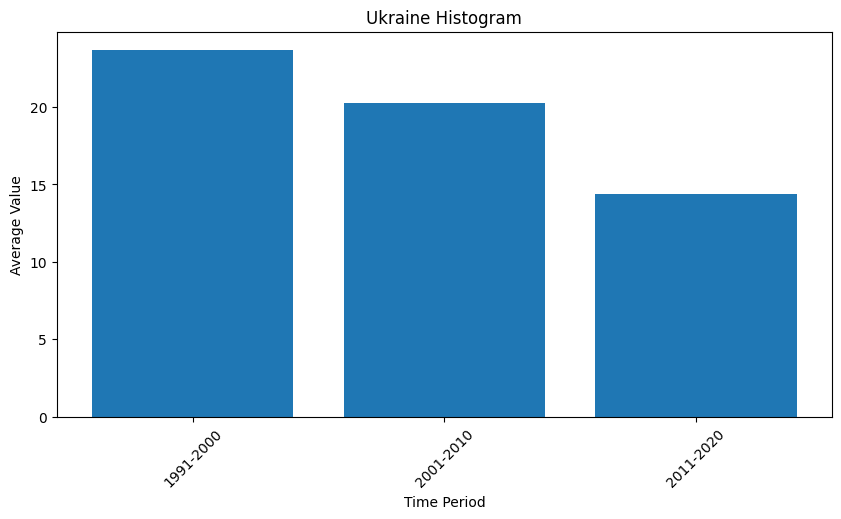

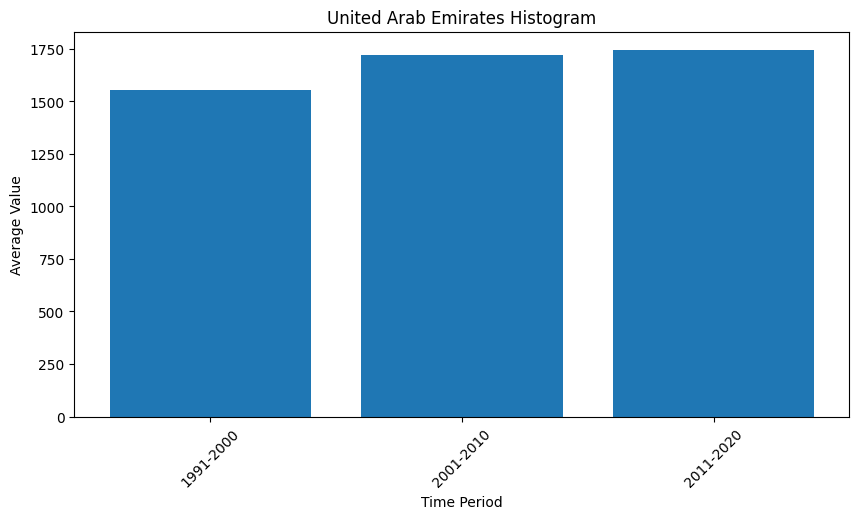

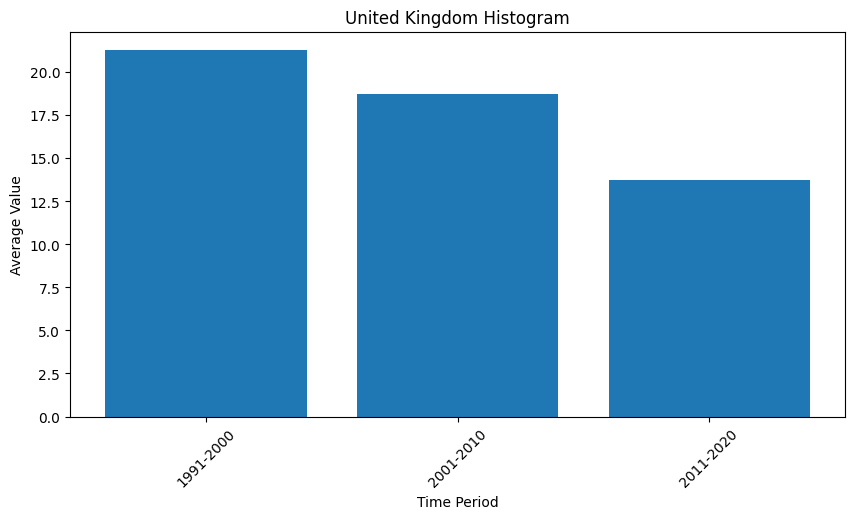

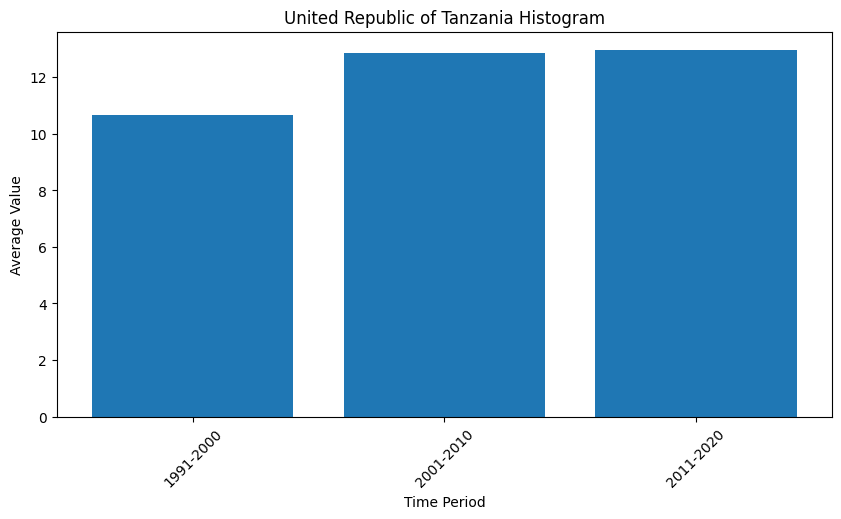

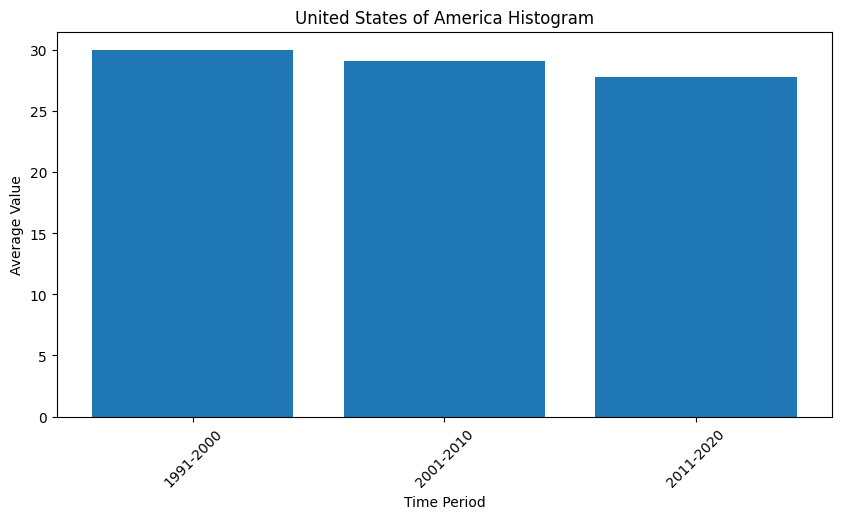

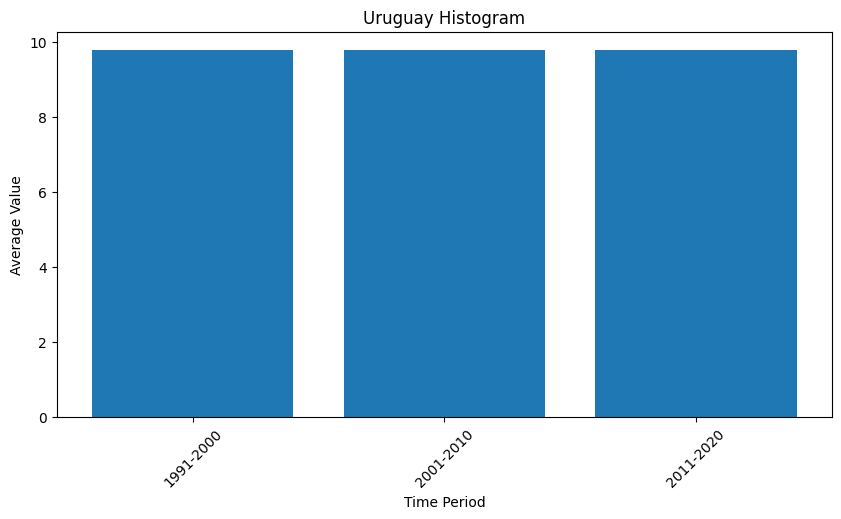

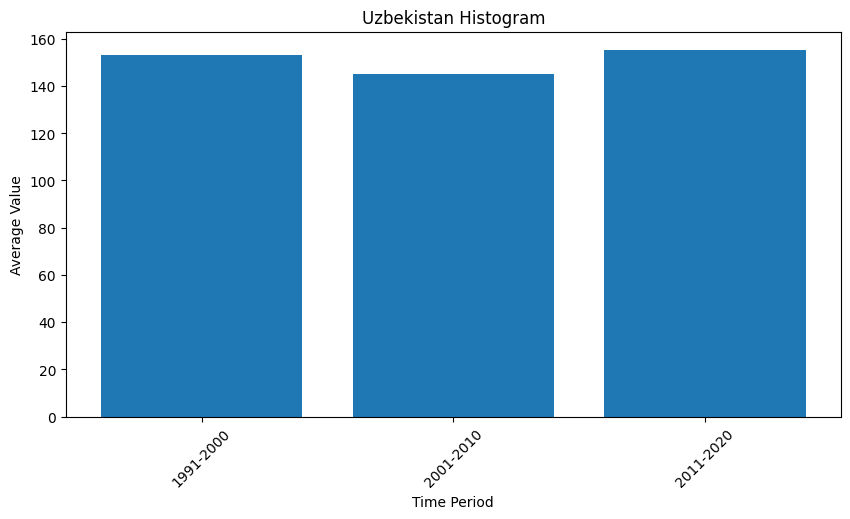

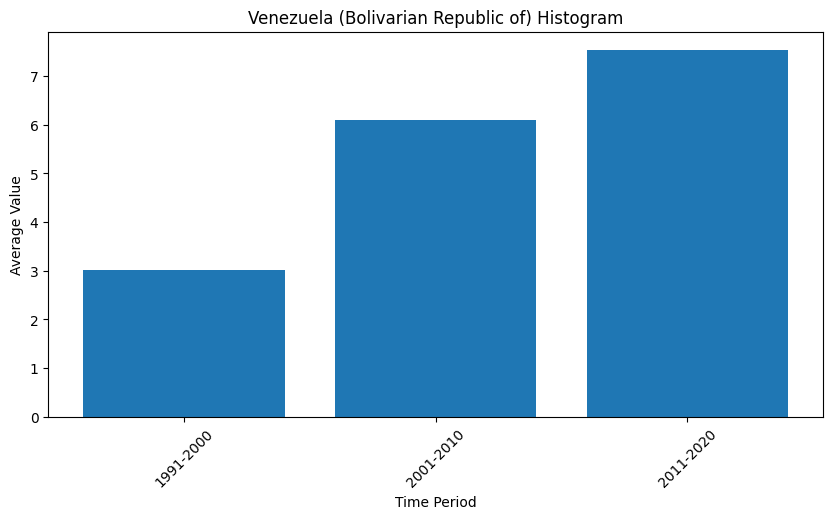

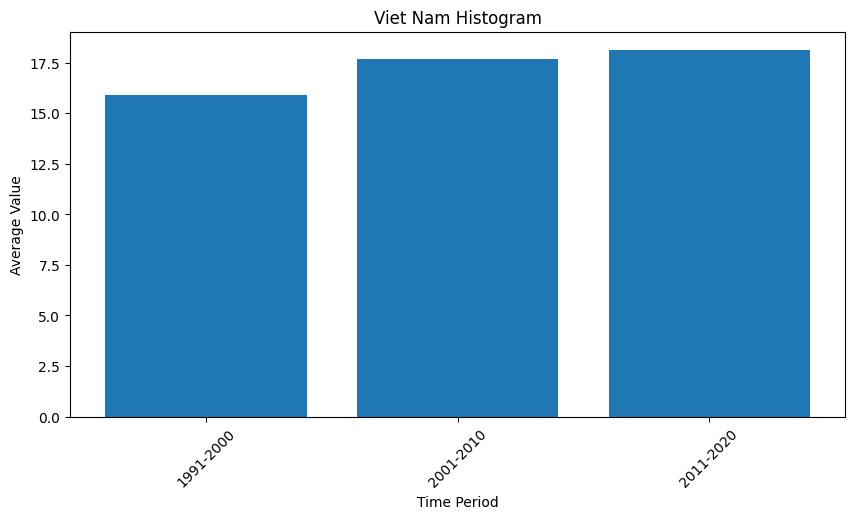

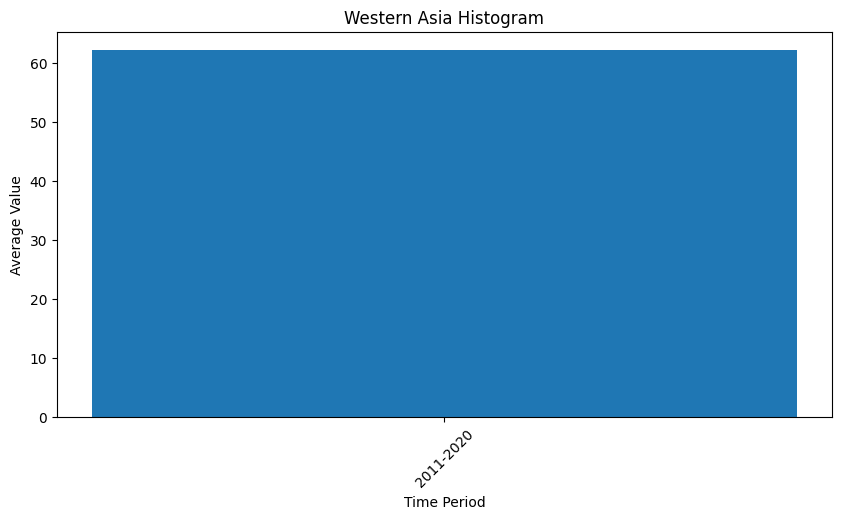

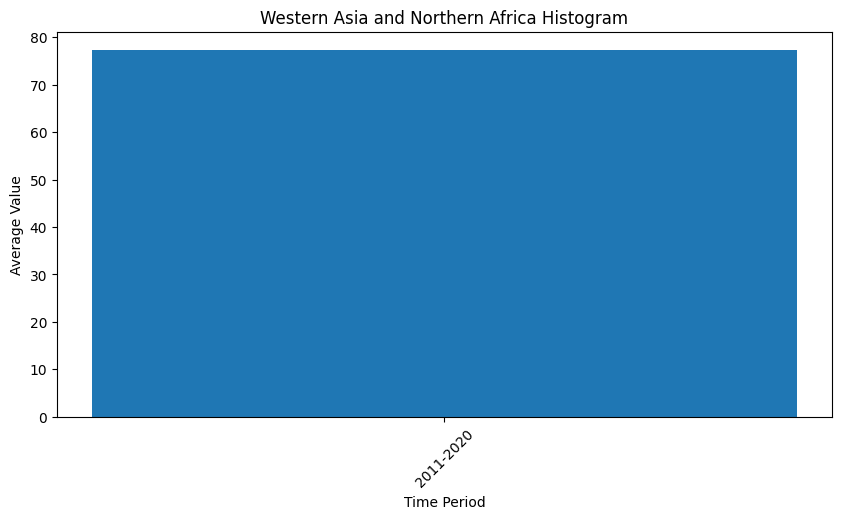

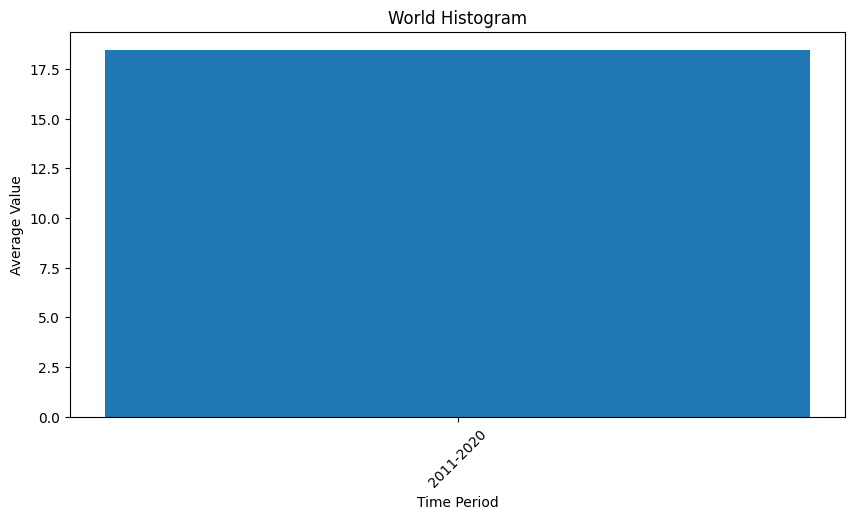

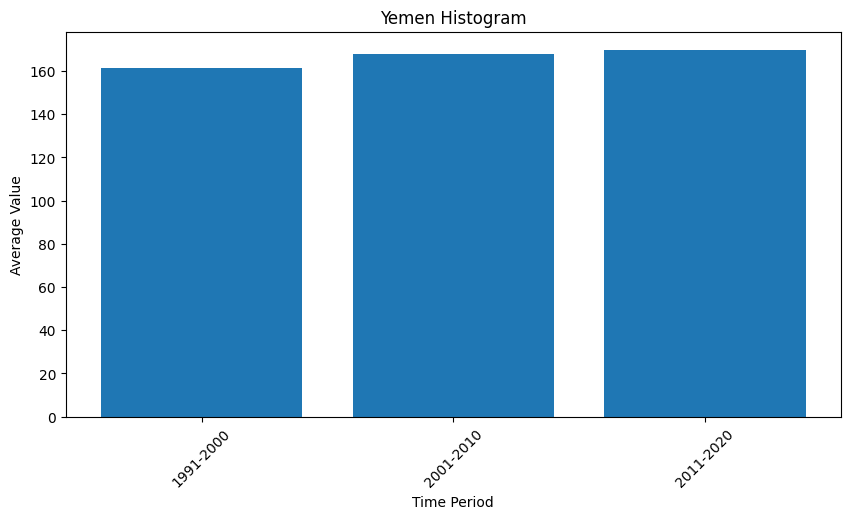

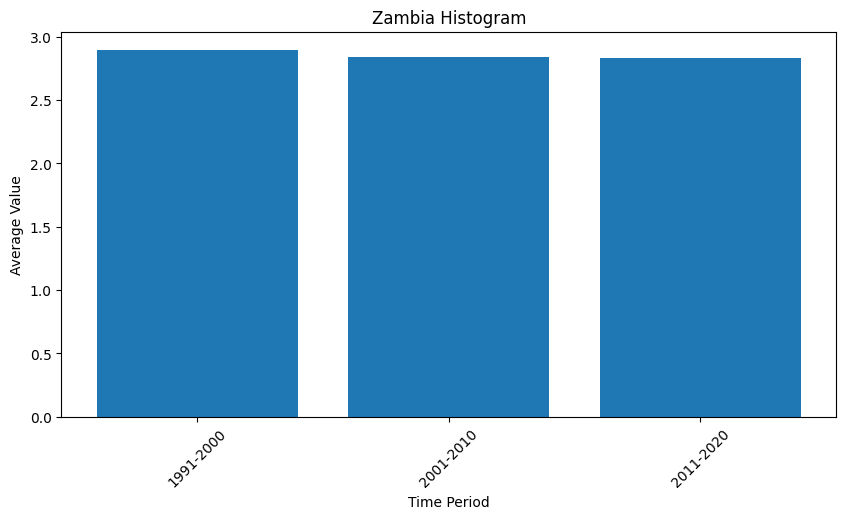

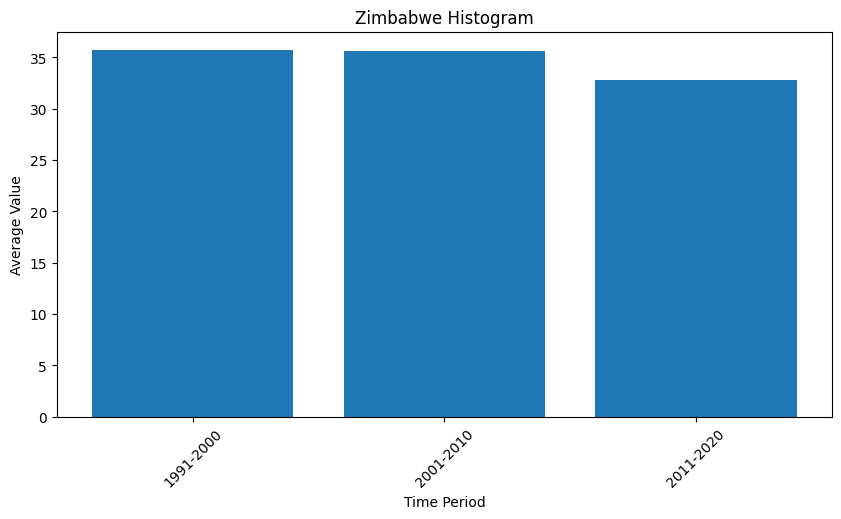

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')


df = df[['GeoAreaName', 'TimePeriod', 'Value']]


# a function to classify time periods into 10-year intervals
def classify_time_period(year):
    start_year = 1981  # Adjust the starting year 
    interval = 10
    year_diff = year - start_year
    interval_start = start_year + (year_diff // interval) * interval
    interval_end = interval_start + interval - 1
    return f"{interval_start}-{interval_end}"



# classification function to the 'TimePeriod'
df['TimePeriod'] = df['TimePeriod'].apply(classify_time_period)


result_df = df.groupby(['GeoAreaName', 'TimePeriod'])['Value'].mean().reset_index()



# Histograms
for geo_area in result_df['GeoAreaName'].unique():
    subset = result_df[result_df['GeoAreaName'] == geo_area]
    time_periods = subset['TimePeriod']
    values = subset['Value']

    plt.figure(figsize=(10, 5))
    plt.bar(time_periods, values)
    plt.title(f'{geo_area} Histogram')
    plt.xlabel('Time Period')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.show()